In [1]:
# pip install flake8 pycodestyle_magic

In [2]:
%load_ext pycodestyle_magic
%flake8_on

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import missingno as msno
import seaborn as sns

from sklearn import preprocessing

import warnings
plt.style.use('seaborn-whitegrid')
warnings.filterwarnings('ignore')

## Sommaire : Analyse exploratoire <a class="anchor" id="Sommaire"></a>

* [Chargement des données](#Partie1)
    * [Consommateurs](#Partie1_1)
    * [Localisation](#Partie1_2)
    * [Items](#Partie1_3)
    * [Paiements](#Partie1_4)
    * [Avis](#Partie1_5)
    * [Commandes](#Partie1_6)
    * [Produits](#Partie1_7)
    * [Vendeurs](#Partie1_8)
    * [Traduction](#Partie1_9)
* [Mise en forme des données](#Partie2)
    * [Produits](#Partie2_1)
    * [Commandes](#Partie2_2)
    * [Clients](#Partie2_3)
* [Analyse exploratoire](#Partie3)
    * [Jeu de données des produits](#Partie3_1)
    * [Jeu de données des commandes](#Partie3_2)
    * [Jeu de données des clients](#Partie3_3)
* [Standardisation des variables](#Partie4)
* [Enregistrement des fichiers de données](#Partie5)

## Chargement des données <a class="anchor" id="Partie1"></a>

In [4]:
df_customers = pd.read_csv('olist_customers_dataset.csv')
df_geolocation = pd.read_csv('olist_geolocation_dataset.csv')
df_items = pd.read_csv('olist_order_items_dataset.csv')
df_payments = pd.read_csv('olist_order_payments_dataset.csv')
df_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
df_orders = pd.read_csv('olist_orders_dataset.csv')
df_products = pd.read_csv('olist_products_dataset.csv')
df_sellers = pd.read_csv('olist_sellers_dataset.csv')
df_translation = pd.read_csv('product_category_name_translation.csv')

### Consommateurs <a class="anchor" id="Partie1_1"></a>
Ce jeu de données présente les informations principales concernant les clients de l'entreprise.

In [5]:
print(df_customers.shape)
df_customers.head()

(99441, 5)


customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [6]:
len(df_customers['customer_unique_id'].unique())

96096

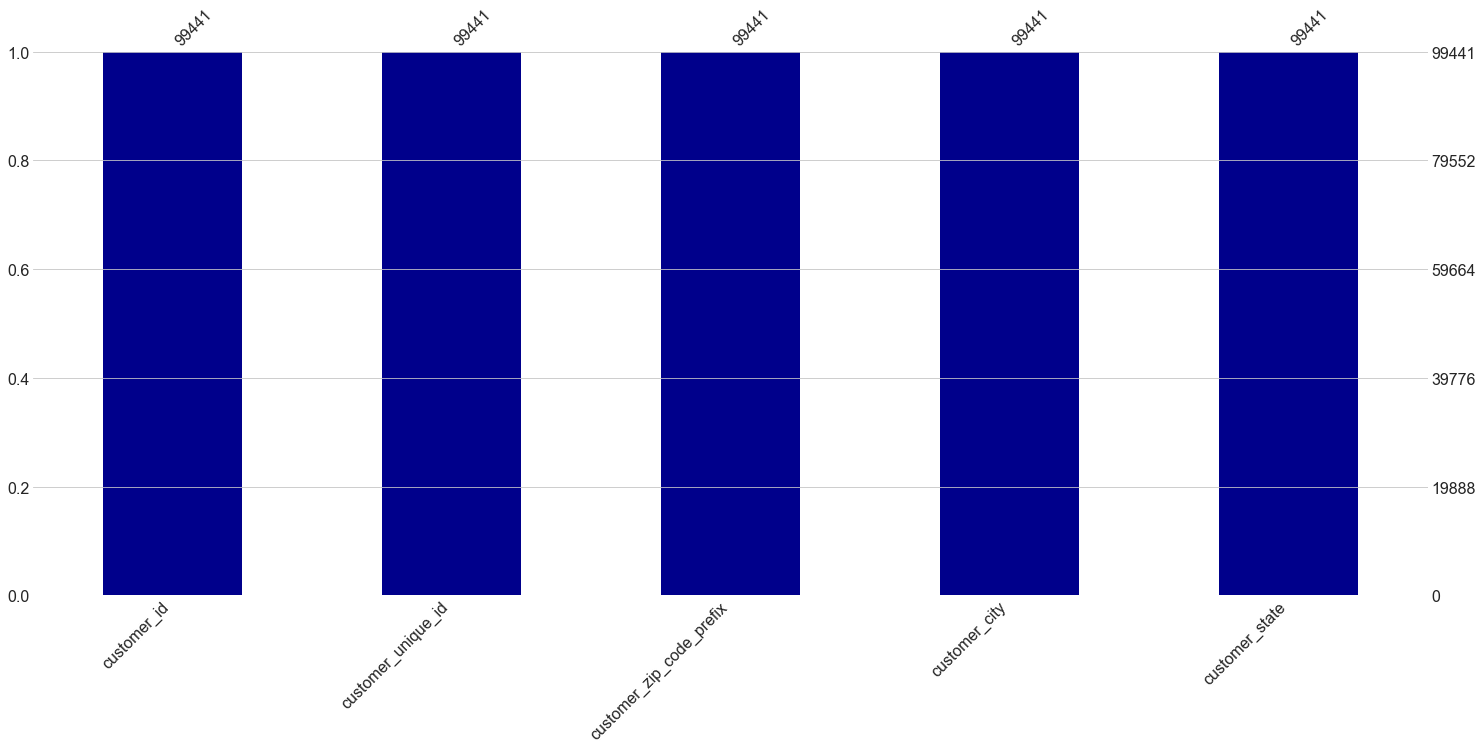

In [7]:
msno.bar(df_customers, color="darkblue")
plt.show()

In [8]:
taux_remp = 100*(1-df_customers.isnull().sum().sum()
                 / (df_customers.shape[0]*df_customers.shape[1]))
print('Le dataset présente un taux de remplissage de '
      + str(round(taux_remp)) + '%.')

Le dataset présente un taux de remplissage de 100%.


[Retour au sommaire](#Sommaire)

### Localisation <a class="anchor" id="Partie1_2"></a>
Le jeu de données contient des informations de localisation pour les différents *Zip Code* du Brésil : la longitude, la latitude et la ville (et son code).

In [9]:
print(df_geolocation.shape)
df_geolocation.head()

(1000163, 5)


geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

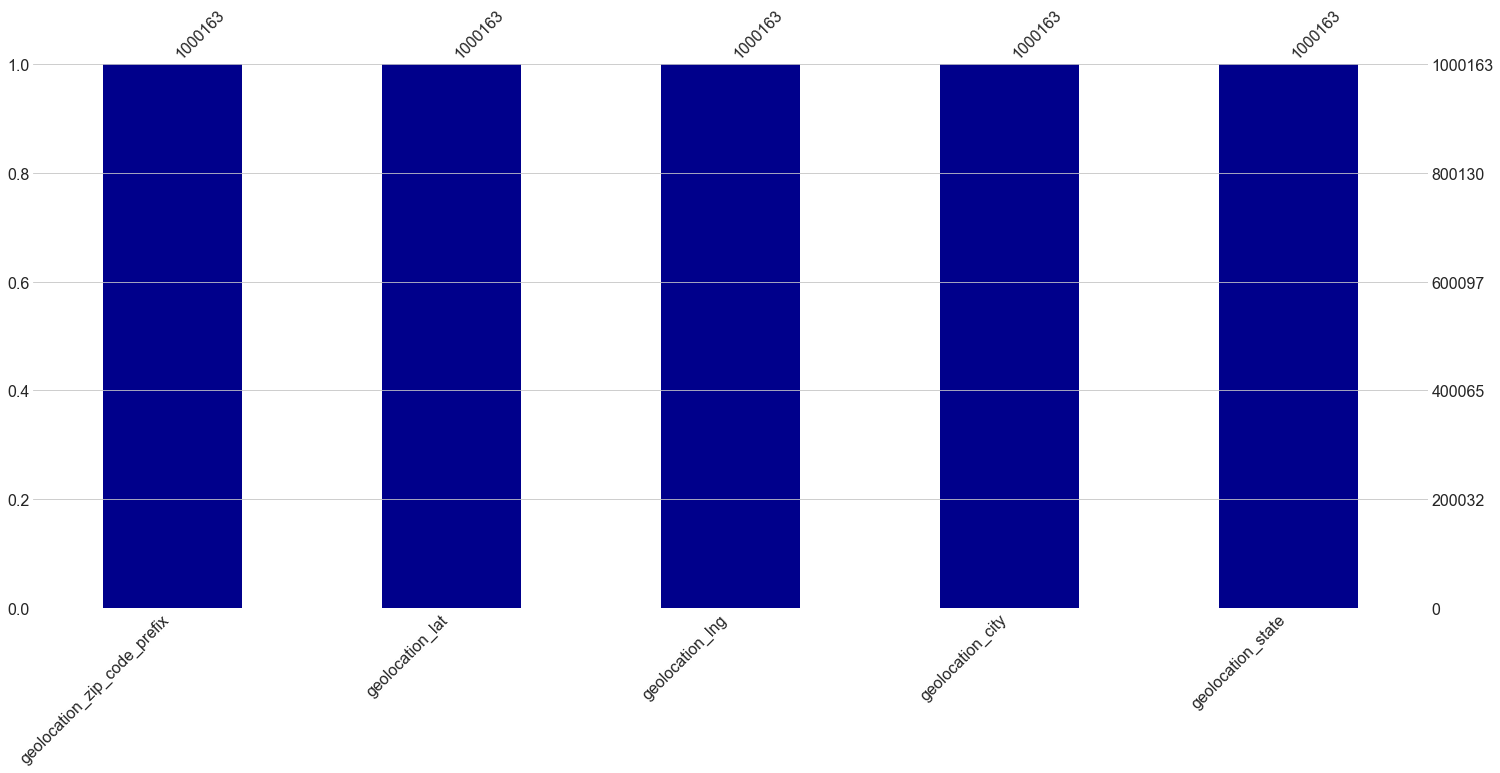

In [10]:
msno.bar(df_geolocation, color="darkblue")
plt.show()

In [11]:
taux_remp = 100*(1-df_geolocation.isnull().sum().sum()
                 / (df_geolocation.shape[0]*df_geolocation.shape[1]))
print('Le dataset présente un taux de remplissage de '
      + str(round(taux_remp)) + '%.')

Le dataset présente un taux de remplissage de 100%.


[Retour au sommaire](#Sommaire)

### Items <a class="anchor" id="Partie1_3"></a>
Ce jeu de données présente des informations concernant les produits commandés : numéro de la commande, du produit, du vendeur le prix et les frais de port par exemple.

In [12]:
print(df_items.shape)
df_items.head()

(112650, 7)


order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

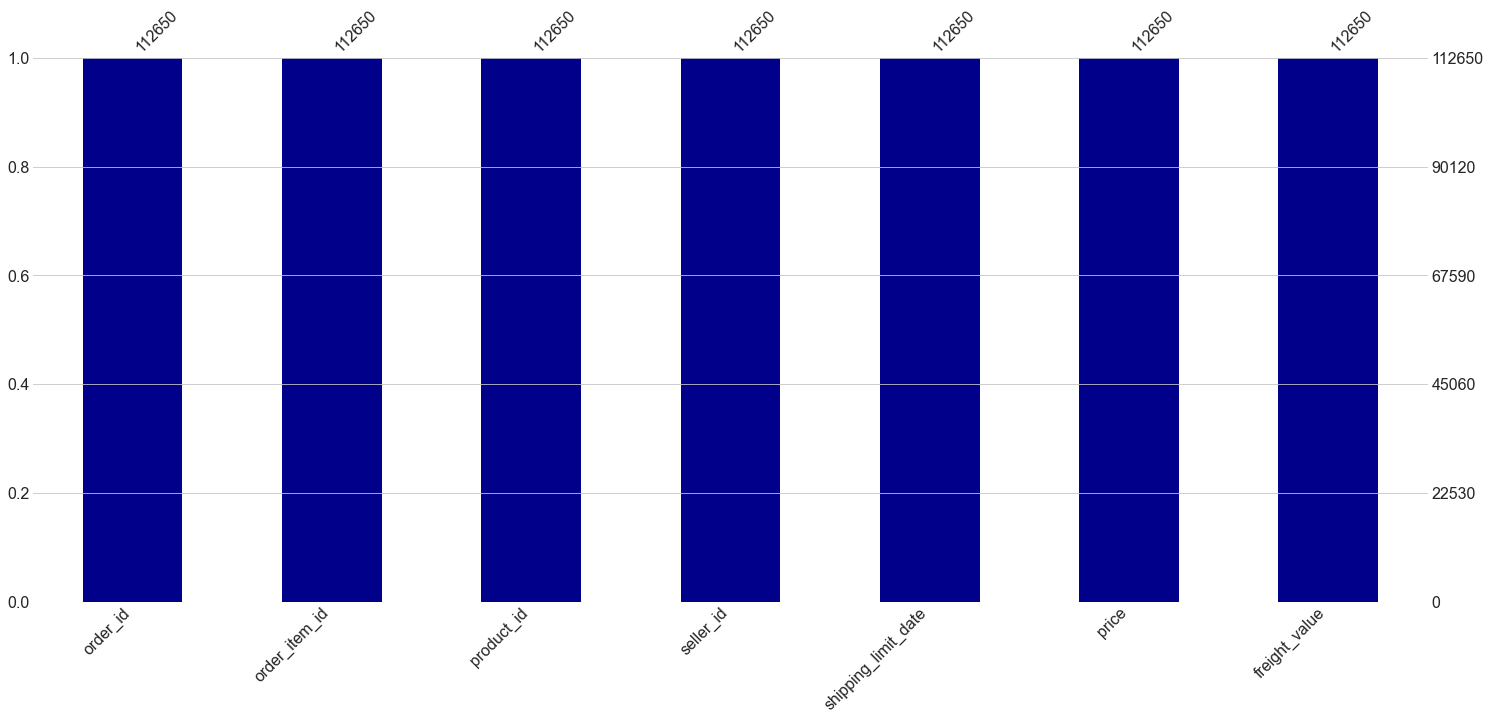

In [13]:
msno.bar(df_items, color="darkblue")
plt.show()

In [14]:
taux_remp = 100*(1-df_items.isnull().sum().sum()
                 / (df_items.shape[0]*df_items.shape[1]))
print('Le dataset présente un taux de remplissage de '
      + str(round(taux_remp)) + '%.')

Le dataset présente un taux de remplissage de 100%.


[Retour au sommaire](#Sommaire)

### Paiements <a class="anchor" id="Partie1_4"></a>
Il nous est ici présenté les informations relatives aux paiements des commandes.

In [15]:
print(df_payments.shape)
df_payments.head()

(103886, 5)


order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

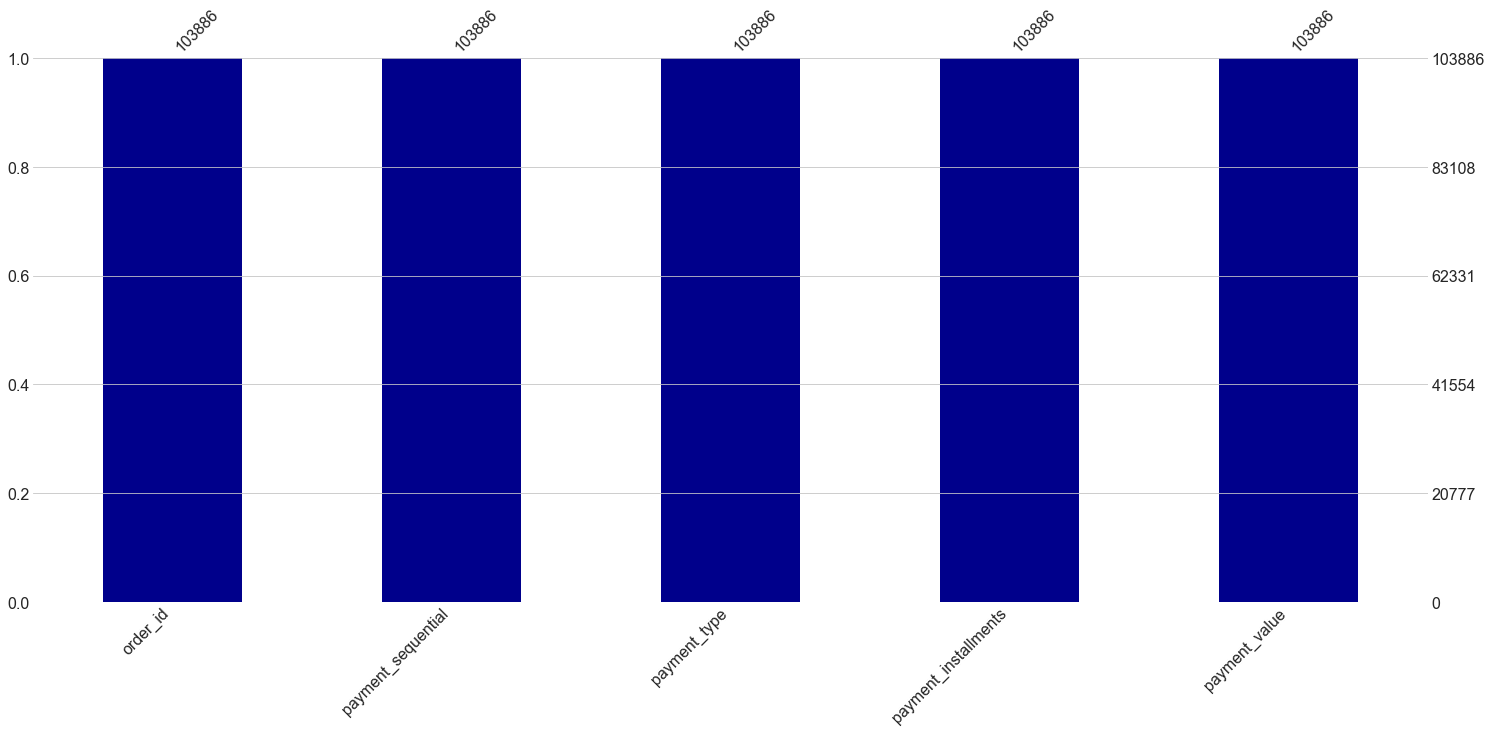

In [16]:
msno.bar(df_payments, color="darkblue")
plt.show()

In [17]:
taux_remp = 100*(1-df_payments.isnull().sum().sum()
                 / (df_payments.shape[0]*df_payments.shape[1]))
print('Le dataset présente un taux de remplissage de '
      + str(round(taux_remp)) + '%.')

Le dataset présente un taux de remplissage de 100%.


[Retour au sommaire](#Sommaire)

### Avis <a class="anchor" id="Partie1_5"></a>
Ce jeu de données regroupe les avis des consommateurs.

In [18]:
print(df_reviews.shape)
df_reviews.head()

(99224, 7)


review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

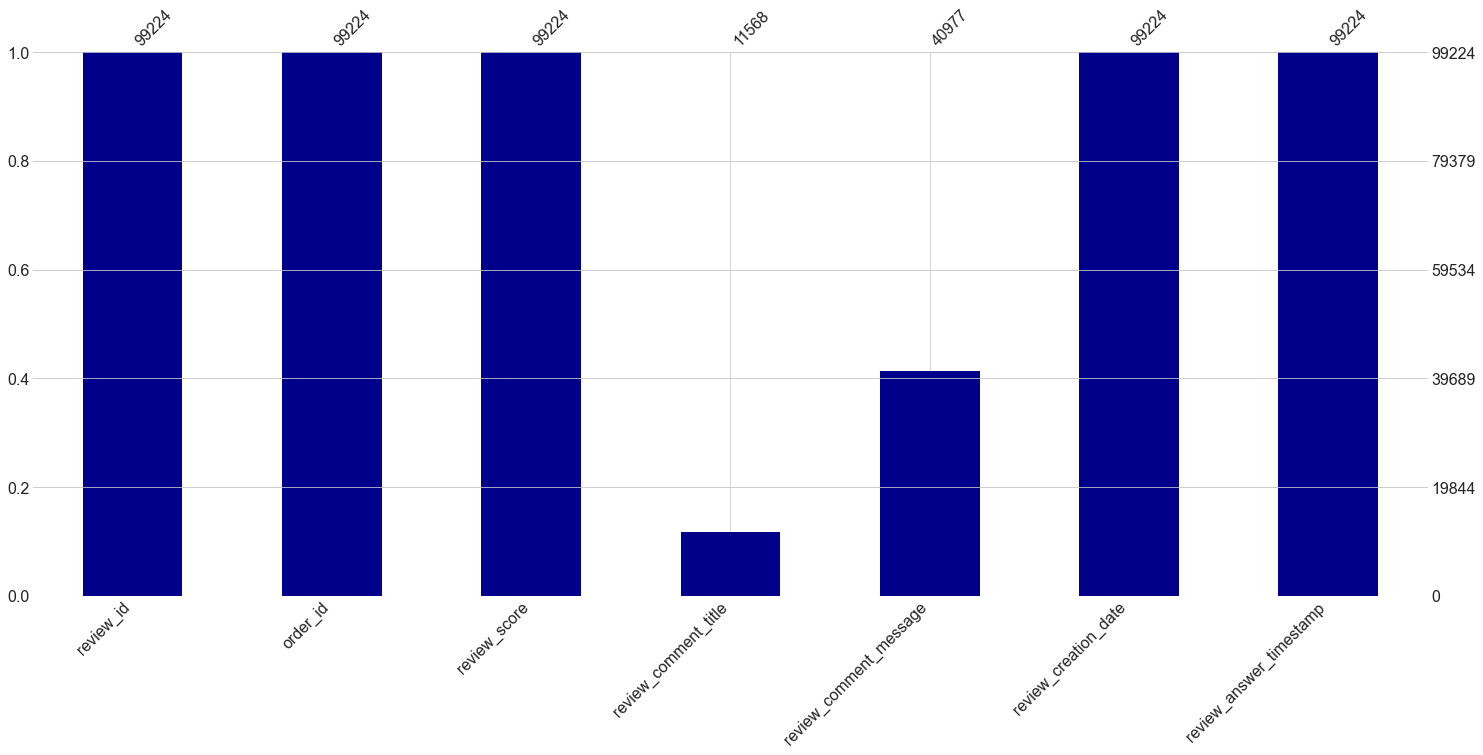

In [19]:
msno.bar(df_reviews, color="darkblue")
plt.show()

In [20]:
taux_remp = 100*(1-df_reviews.isnull().sum().sum()
                 / (df_reviews.shape[0]*df_reviews.shape[1]))
print('Le dataset présente un taux de remplissage de '
      + str(round(taux_remp)) + '%.')

Le dataset présente un taux de remplissage de 79%.


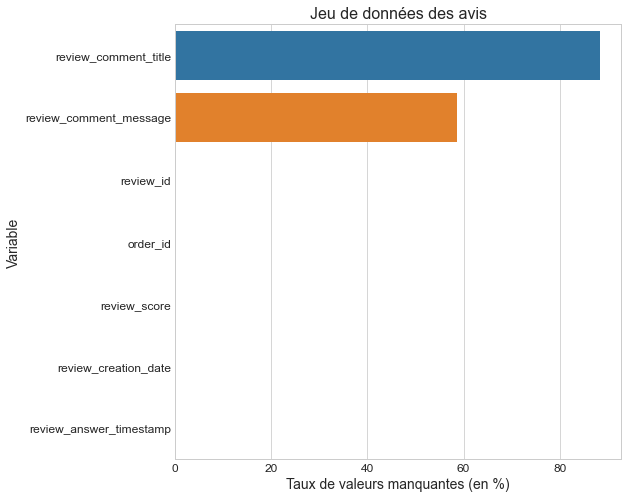

In [21]:
ValeursManquantes = df_reviews.isnull().sum() * 100 / df_reviews.shape[0]
ValeursManquantes.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(8, 8))
sns.barplot(x=ValeursManquantes.values, y=ValeursManquantes.index)
plt.xlabel('Taux de valeurs manquantes (en %)', fontsize=14)
plt.ylabel('Variable', fontsize=14)
plt.title('Jeu de données des avis',
          fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

[Retour au sommaire](#Sommaire)

### Commandes <a class="anchor" id="Partie1_6"></a>
Ce jeu de données contient les informations principales concernant les commandes, notamment les informations temporelles (date et heure de commande, d'approbation, d'expédition ...)

In [22]:
print(df_orders.shape)
df_orders.head()

(99441, 8)


order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

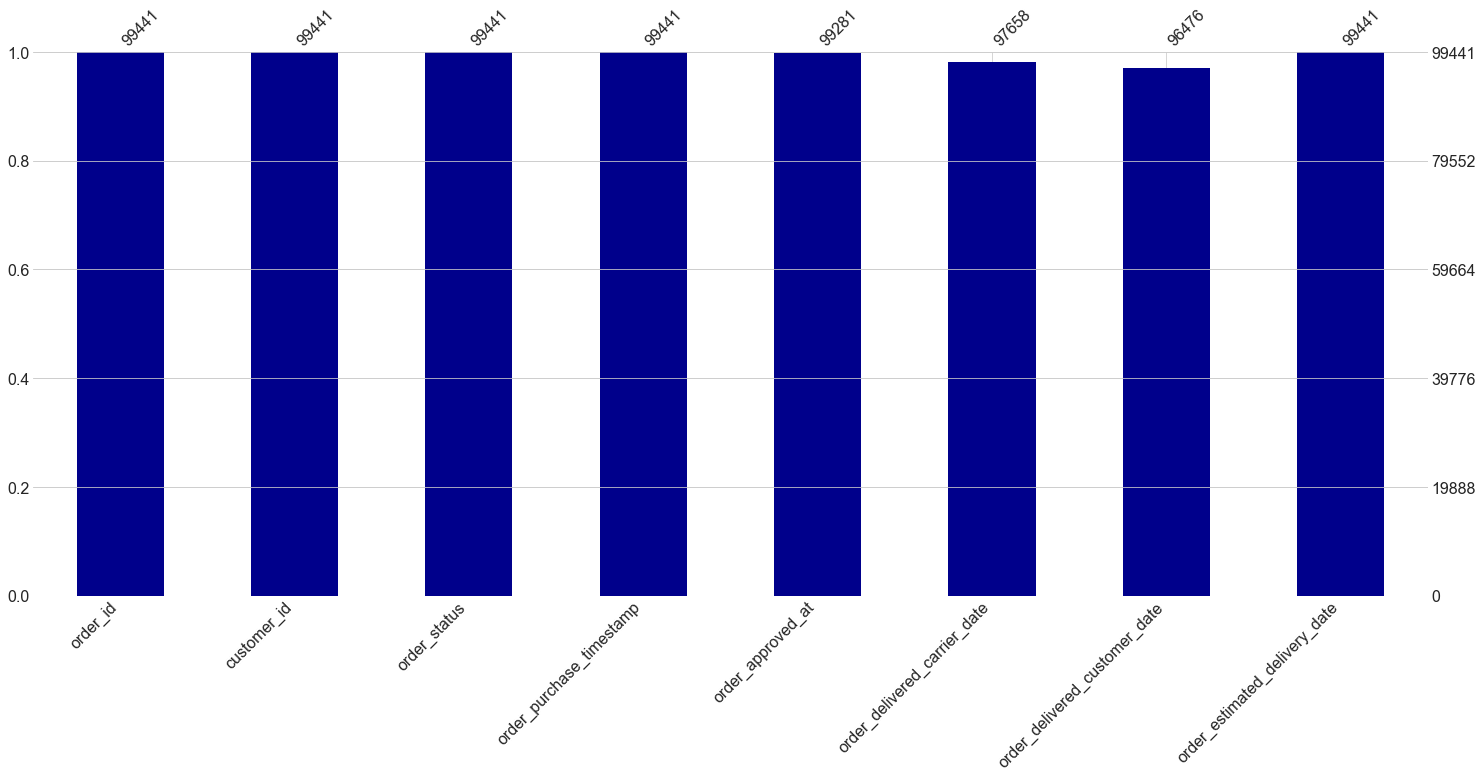

In [23]:
msno.bar(df_orders, color="darkblue")
plt.show()

In [24]:
taux_remp = 100*(1-df_orders.isnull().sum().sum()
                 / (df_orders.shape[0]*df_orders.shape[1]))
print('Le dataset présente un taux de remplissage de '
      + str(round(taux_remp)) + '%.')

Le dataset présente un taux de remplissage de 99%.


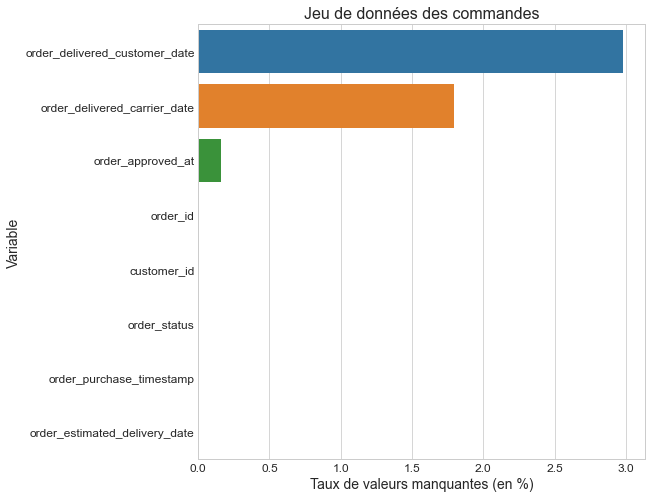

In [25]:
ValeursManquantes = df_orders.isnull().sum() * 100 / df_orders.shape[0]
ValeursManquantes.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(8, 8))
sns.barplot(x=ValeursManquantes.values, y=ValeursManquantes.index)
plt.xlabel('Taux de valeurs manquantes (en %)', fontsize=14)
plt.ylabel('Variable', fontsize=14)
plt.title('Jeu de données des commandes',
          fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

[Retour au sommaire](#Sommaire)

### Produits <a class="anchor" id="Partie1_7"></a>
Les produits vendus par Olist sont répertoriés dans ce jeu de données.

In [26]:
print(df_products.shape)
df_products.head()

(32951, 9)


product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

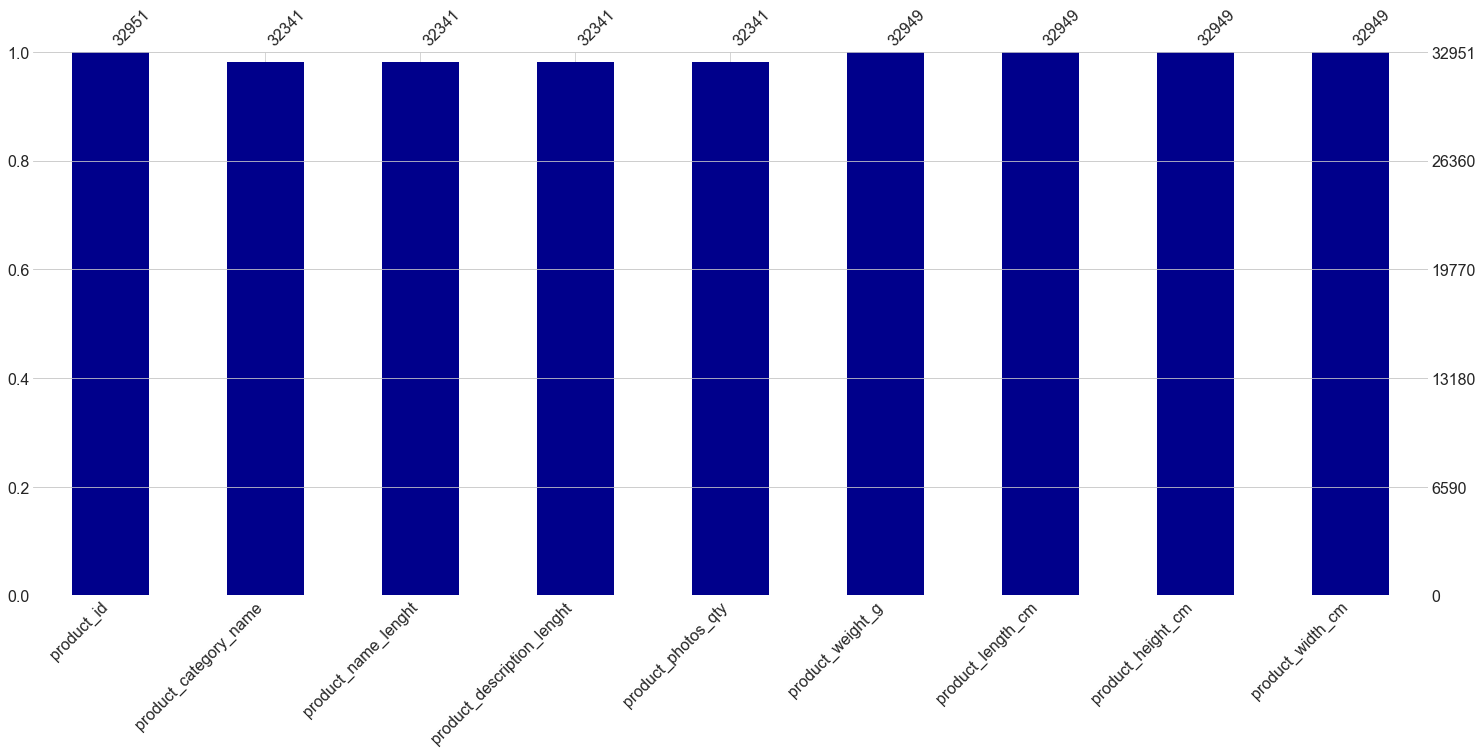

In [27]:
msno.bar(df_products, color="darkblue")
plt.show()

In [28]:
taux_remp = 100*(1-df_products.isnull().sum().sum()
                 / (df_products.shape[0]*df_products.shape[1]))
print('Le dataset présente un taux de remplissage de '
      + str(round(taux_remp)) + '%.')

Le dataset présente un taux de remplissage de 99%.


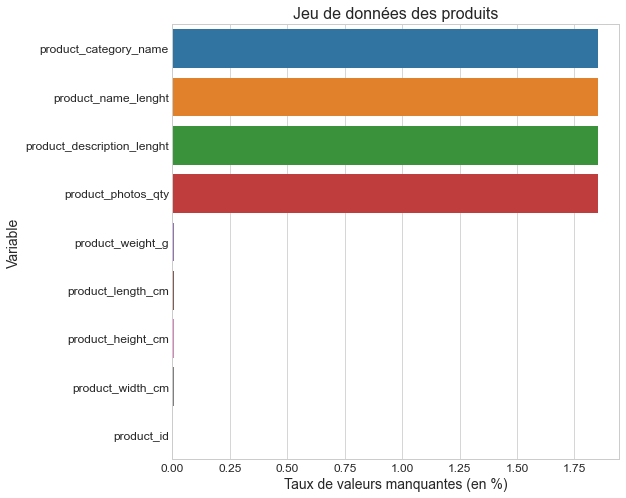

In [29]:
ValeursManquantes = df_products.isnull().sum() * 100 / df_products.shape[0]
ValeursManquantes.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(8, 8))
sns.barplot(x=ValeursManquantes.values, y=ValeursManquantes.index)
plt.xlabel('Taux de valeurs manquantes (en %)', fontsize=14)
plt.ylabel('Variable', fontsize=14)
plt.title('Jeu de données des produits',
          fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

[Retour au sommaire](#Sommaire)

### Vendeurs <a class="anchor" id="Partie1_8"></a>
Ce jeu de données contient les informations de localisation des vendeurs.

In [30]:
print(df_sellers.shape)
df_sellers.head()

(3095, 4)


seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

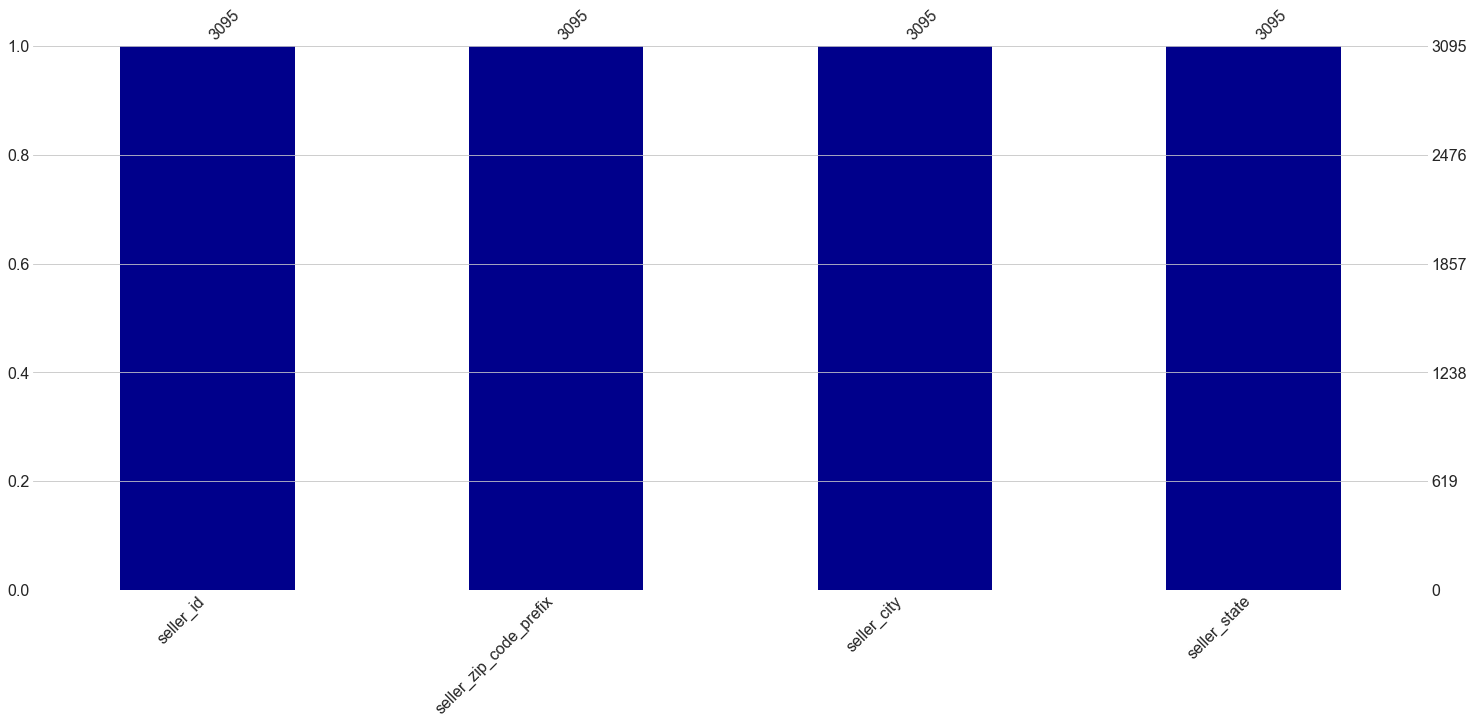

In [31]:
msno.bar(df_sellers, color="darkblue")
plt.show()

In [32]:
taux_remp = 100*(1-df_sellers.isnull().sum().sum()
                 / (df_sellers.shape[0]*df_sellers.shape[1]))
print('Le dataset présente un taux de remplissage de '
      + str(round(taux_remp)) + '%.')

Le dataset présente un taux de remplissage de 100%.


[Retour au sommaire](#Sommaire)

### Traduction <a class="anchor" id="Partie1_9"></a>
Ce jeu de données donne la traduction des catégories de produits du portugais en anglais.

In [33]:
print(df_translation.shape)
df_translation.head()

(71, 2)


product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

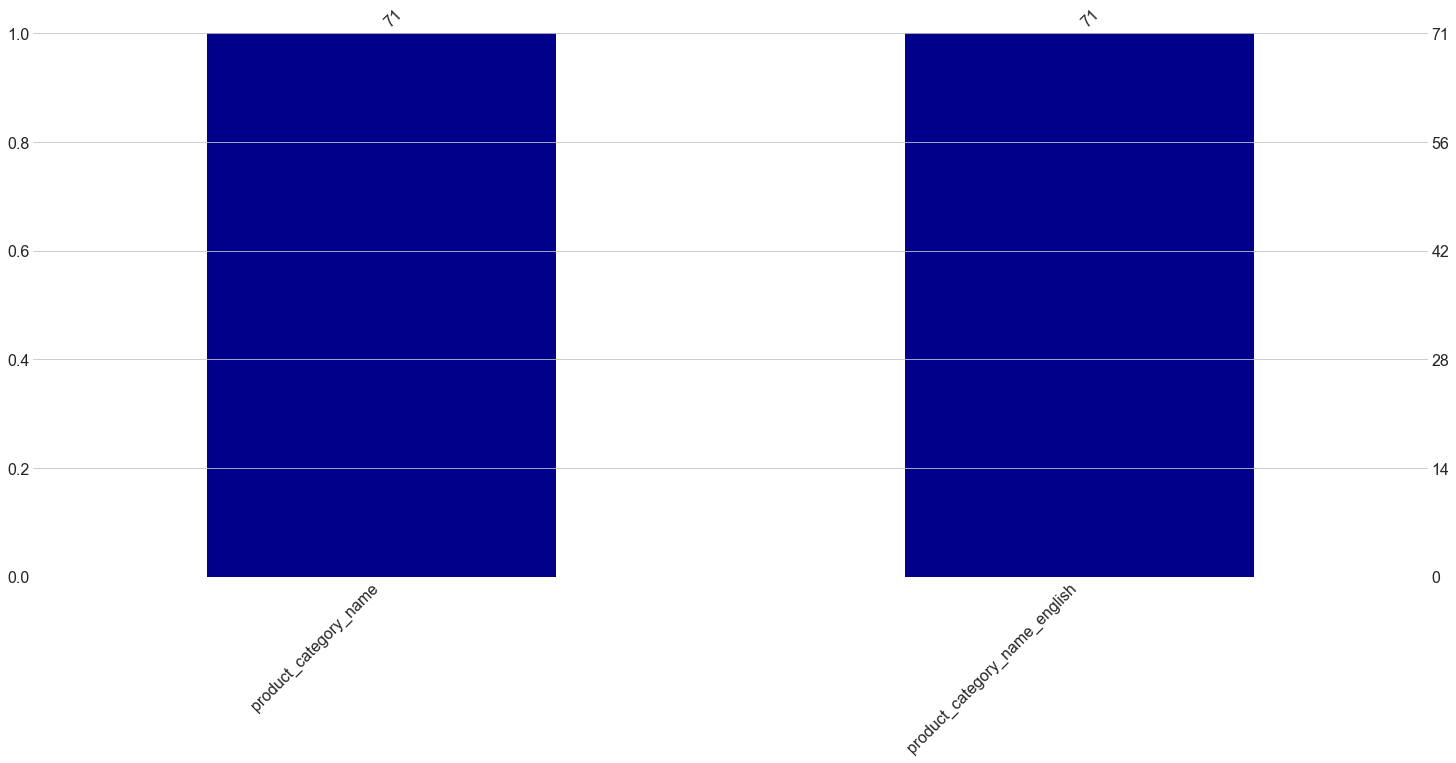

In [34]:
msno.bar(df_translation, color="darkblue")
plt.show()

In [35]:
taux_remp = 100*(1-df_translation.isnull().sum().sum()
                 / (df_translation.shape[0]*df_translation.shape[1]))
print('Le dataset présente un taux de remplissage de '
      + str(round(taux_remp)) + '%.')

Le dataset présente un taux de remplissage de 100%.


[Retour au sommaire](#Sommaire)
## Mise en forme des données <a class="anchor" id="Partie2"></a>
### Produits <a class="anchor" id="Partie2_1"></a>
Nous allons regrouper nos données en un seul jeu de données. Nous allons pour cela nous aider du diagramme donné avec les données : https://i.imgur.com/HRhd2Y0.png.

In [36]:
df_Produits = pd.merge(df_products, df_translation, on='product_category_name')
df_Produits.drop(['product_category_name', 'product_name_lenght',
                  'product_description_lenght', 'product_photos_qty',
                  'product_weight_g', 'product_length_cm', 'product_height_cm',
                  'product_width_cm'], axis=1, inplace=True)
df_Produits = df_Produits.rename(
    columns={'product_category_name_english': 'Catégorie de produit'})

Regardons les catégories de produits.

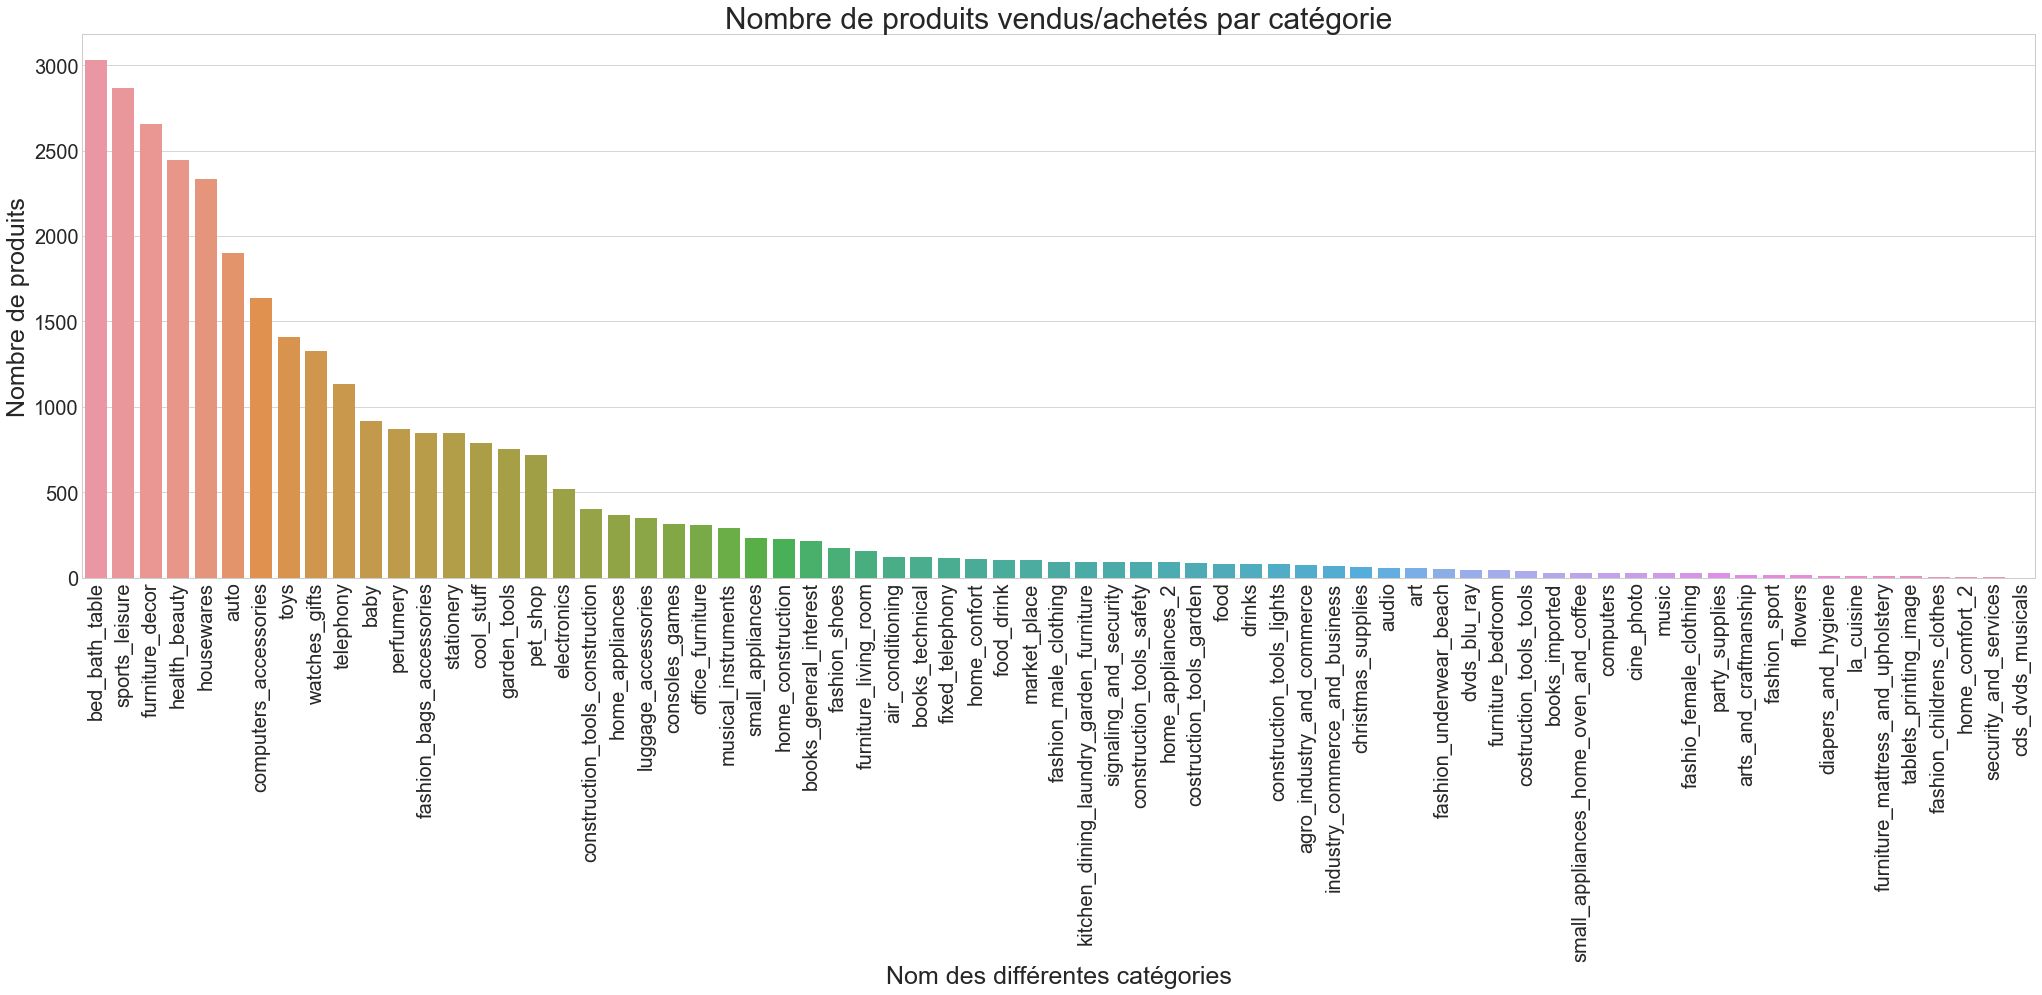

In [37]:
plt.figure(figsize=(35, 10))
plt.title('Nombre de produits vendus/achetés par catégorie', fontsize=30)
sns.barplot(
    x=df_Produits['Catégorie de produit'].value_counts().index,
    y=df_Produits['Catégorie de produit'].value_counts().values)
plt.xlabel("Nom des différentes catégories", fontsize=25)
plt.ylabel("Nombre de produits", fontsize=25)
plt.tick_params(axis='both', labelsize=20)
plt.xticks(rotation=90)
plt.show()

In [38]:
nouvelles_catégories = {'bed_bath_table': 'Maison',
                        'housewares': 'Maison',
                        'garden_tools': 'Maison',
                        'home_appliances': 'Maison',
                        'small_appliances': 'Maison',
                        'home_construction': 'Maison',
                        'home_confort': 'Maison',
                        'home_appliances_2': 'Maison',
                        'costruction_tools_garden': 'Maison',
                        'small_appliances_home_oven_and_coffee': 'Maison',
                        'home_comfort_2': 'Maison',
                        'la_cuisine': 'Maison',

                        'furniture_decor': 'Mobilier',
                        'office_furniture': 'Mobilier',
                        'furniture_living_room': 'Mobilier',
                        'air_conditioning': 'Mobilier',
                        'kitchen_dining_laundry_garden_furniture': 'Mobilier',
                        'furniture_bedroom': 'Mobilier',
                        'furniture_mattress_and_upholstery': 'Mobilier',
                        'furnitures': 'Mobilier',

                        'sports_leisure': 'Loisirs',
                        'toys': 'Loisirs',
                        'musical_instruments': 'Loisirs',
                        'books_general_interest': 'Loisirs',
                        'books_technical': 'Loisirs',
                        'art': 'Loisirs',
                        'cine_photo': 'Loisirs',
                        'dvds_blu_ray': 'Loisirs',
                        'books_imported': 'Loisirs',
                        'party_supplies': 'Loisirs',
                        'music': 'Loisirs',
                        'arts_and_craftmanship': 'Loisirs',
                        'cds_dvds_musicals': 'Loisirs',

                        'computers_accessories': 'Technologies',
                        'telephony': 'Technologies',
                        'electronics': 'Technologies',
                        'consoles_games': 'Technologies',
                        'audio': 'Technologies',
                        'fixed_telephony': 'Technologies',
                        'computers': 'Technologies',
                        'tablets_printing_image': 'Technologies',

                        'watches_gifts': 'Mode',
                        'fashion_bags_accessories': 'Mode',
                        'luggage_accessories': 'Mode',
                        'fashion_shoes': 'Mode',
                        'fashion_male_clothing': 'Mode',
                        'fashion_underwear_beach': 'Mode',
                        'fashio_female_clothing': 'Mode',
                        'fashion_sport': 'Mode',
                        'fashion_childrens_clothes': 'Mode',

                        'health_beauty': 'Beauté_Santé',
                        'perfumery': 'Beauté_Santé',
                        'baby': 'Beauté_Santé',
                        'diapers_and_hygiene': 'Beauté_Santé',

                        'food': 'Nourriture_Boissons',
                        'drinks': 'Nourriture_Boissons',
                        'food_drink': 'Nourriture_Boissons',

                        'auto': 'Autres',
                        'cool_stuff': 'Autres',
                        'stationery': 'Autres',
                        'pet_shop': 'Autres',
                        'construction_tools_construction': 'Autres',
                        'market_place': 'Autres',
                        'construction_tools_lights': 'Autres',
                        'industry_commerce_and_business': 'Autres',
                        'agro_industry_and_commerce': 'Autres',
                        'signaling_and_security': 'Autres',
                        'construction_tools_safety': 'Autres',
                        'christmas_supplies': 'Autres',
                        'costruction_tools_tools': 'Autres',
                        'flowers': 'Autres',
                        'security_and_services': 'Autres'}

In [39]:
df_Produits['Catégorie de produit'] = df_Produits[
    'Catégorie de produit'].map(nouvelles_catégories)
df_Produits['Catégorie de produit'] = df_Produits[
    'Catégorie de produit'].astype('category')

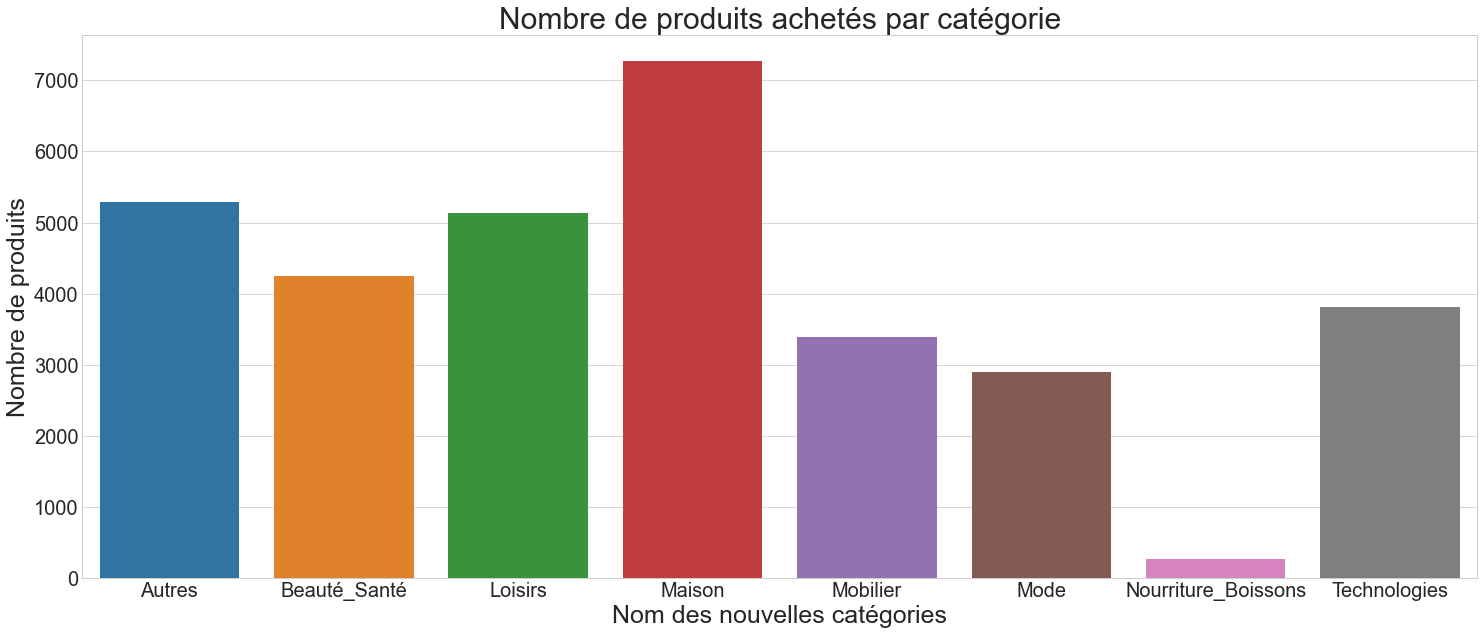

In [40]:
plt.figure(figsize=(25, 10))
plt.title('Nombre de produits achetés par catégorie', fontsize=30)
sns.barplot(
    x=df_Produits['Catégorie de produit'].value_counts().index,
    y=df_Produits['Catégorie de produit'].value_counts().values)
plt.xlabel("Nom des nouvelles catégories", fontsize=25)
plt.ylabel("Nombre de produits", fontsize=25)
plt.tick_params(axis='both', labelsize=20)
plt.show()

In [41]:
df_Produits.head()

product_id Catégorie de produit
0  1e9e8ef04dbcff4541ed26657ea517e5         Beauté_Santé
1  6a2fb4dd53d2cdb88e0432f1284a004c         Beauté_Santé
2  0d009643171aee696f4733340bc2fdd0         Beauté_Santé
3  b1eae565a61935e0011ee7682fef9dc9         Beauté_Santé
4  8da90b37f0fb171b4877c124f965b1f6         Beauté_Santé

In [42]:
df_Produits.shape

(32328, 2)

In [43]:
df_Produits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32328 entries, 0 to 32327
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   product_id            32328 non-null  object  
 1   Catégorie de produit  32328 non-null  category
dtypes: category(1), object(1)
memory usage: 537.1+ KB


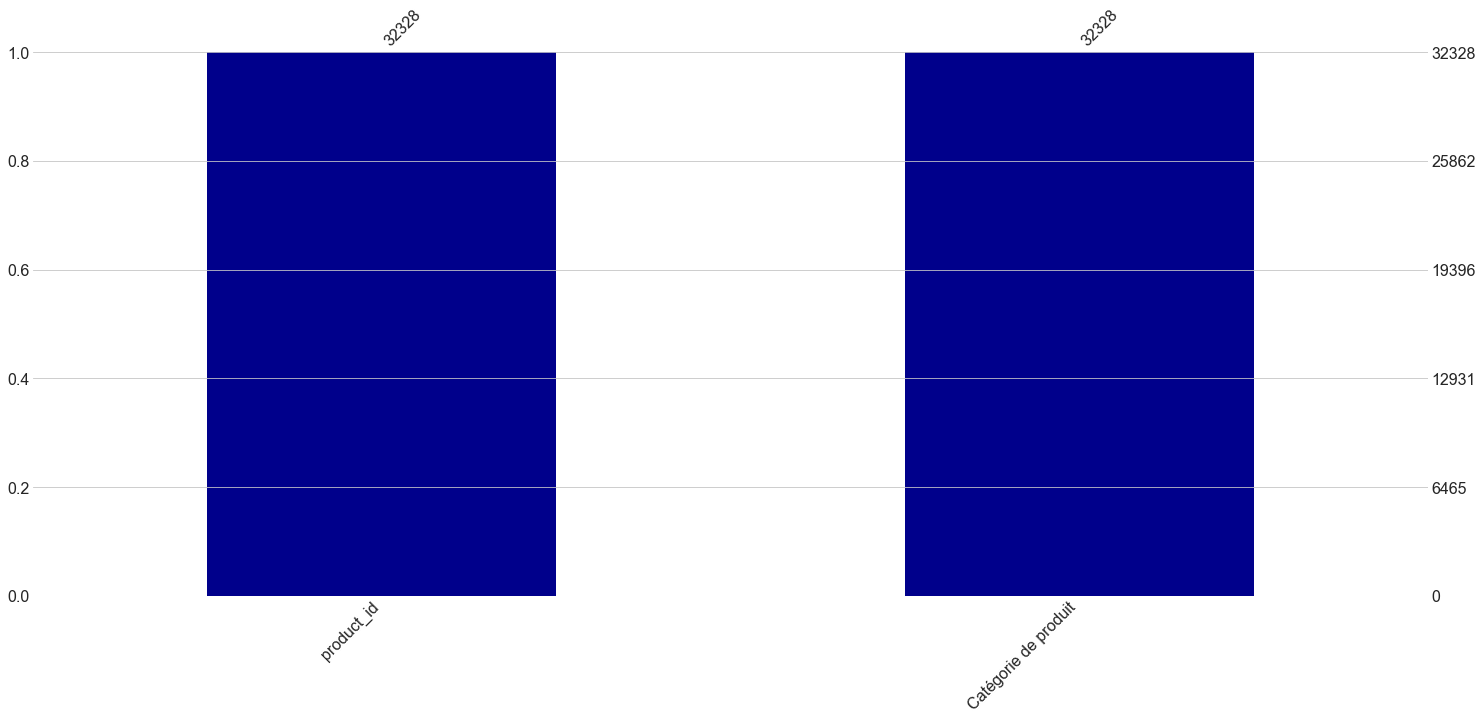

In [44]:
msno.bar(df_Produits, color="darkblue")
plt.show()

In [45]:
taux_remp = 100*(1-df_Produits.isnull().sum().sum()
                 / (df_Produits.shape[0]*df_Produits.shape[1]))
print('Le dataset présente un taux de remplissage de '
      + str(round(taux_remp)) + '%.')

Le dataset présente un taux de remplissage de 100%.


[Retour au sommaire](#Sommaire)

### Commandes <a class="anchor" id="Partie2_2"></a>

In [46]:
df_Commandes = pd.merge(df_orders, df_items, on='order_id')
df_Commandes.drop(['order_approved_at', 'order_delivered_carrier_date',
                  'order_delivered_customer_date',
                   'order_estimated_delivery_date', 'seller_id',
                   'shipping_limit_date'], axis=1, inplace=True)

In [47]:
df_Commandes = pd.merge(df_Commandes, df_reviews, on='order_id')
df_Commandes.drop(['review_id', 'review_creation_date',
                   'review_answer_timestamp'], axis=1, inplace=True)

In [48]:
df_Commandes = pd.merge(df_Commandes, df_payments, on='order_id')
df_Commandes = pd.merge(df_Commandes, df_customers, on='customer_id')
df_Commandes.drop(['customer_city', 'customer_state',
                   'customer_zip_code_prefix'], axis=1, inplace=True)

In [49]:
df_Commandes = pd.merge(df_Commandes, df_Produits, on='product_id')

In [50]:
df_Commandes.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
4  0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   

  order_status order_purchase_timestamp  order_item_id  \
0    delivered      2017-10-02 10:56:33              1   
1    delivered      2017-10-02 10:56:33              1   
2    delivered      2017-10-02 10:56:33              1   
3    delivered      2017-08-15 18:29:31              1   
4    delivered      2017-08-02 18:24:47              1   

                         product_id  price  freight_value  review_score  \
0  87285b34884572647811a353c7ac498a  29.99           8.72             4   
1  87285b34884572647811a353c7ac498a  29.99           8.72             4   
2  87285b34884572647811a353c7ac498a  29.99           8.72             4   
3  87285b34884572647811a353c7ac498a  29.99           7.78             4   
4  87285b34884572647811a353c7ac498a  29.99           7.78             5   

  review_comment_title                             review_comment_message  \
0                  NaN  Não testei o produto ainda, mas ele veio corre...   
1                  NaN  Não testei o produto ainda, mas ele veio corre...   
2                  NaN  Não testei o produto ainda, mas ele veio corre...   
3                  NaN  Deveriam embalar melhor o produto. A caixa vei...   
4                  NaN  Só achei ela pequena pra seis xícaras ,mais é ...   

   payment_sequential payment_type  payment_installments  payment_value  \
0                   1  credit_card                     1          18.12   
1                   3      voucher                     1           2.00   
2                   2      voucher                     1          18.59   
3                   1  credit_card                     3          37.77   
4                   1  credit_card                     1          37.77   

                 customer_unique_id Catégorie de produit  
0  7c396fd4830fd04220f754e42b4e5bff               Maison  
1  7c396fd4830fd04220f754e42b4e5bff               Maison  
2  7c396fd4830fd04220f754e42b4e5bff               Maison  
3  3a51803cc0d012c3b5dc8b7528cb05f7               Maison  
4  ef0996a1a279c26e7ecbd737be23d235               Maison

In [51]:
nbAchatsParCatégorie = df_Commandes.groupby(['customer_unique_id',
                                             'Catégorie de produit']).agg(
    {"customer_unique_id": "nunique"}).unstack()
nbAchatsParCatégorie.columns = nbAchatsParCatégorie.columns.droplevel(0)
df_Commandes = pd.merge(df_Commandes, nbAchatsParCatégorie,
                        on='customer_unique_id')

In [52]:
df_Commandes = pd.merge(df_Commandes,
                        df_Commandes.groupby(['customer_id']).agg(
                            {'payment_installments': 'max'}),
                        on='customer_id').rename(
    columns={'payment_installments_x': 'Nombre de paiements',
             'payment_installments_y': 'Nombre de paiements Max'})


df_Commandes = pd.merge(df_Commandes,
                        df_Commandes.groupby(['customer_id']).agg(
                            {'payment_sequential': 'max'}),
                        on='customer_id').rename(
    columns={'payment_sequential_x': 'Nombre de moyens de paiement',
             'payment_sequential_y': 'Nombre de moyens de paiement Max'})

In [53]:
df_Commandes['Paiement en une fois'] = np.where(
    df_Commandes['Nombre de paiements Max'] == 1, 1, 0)
df_Commandes['Paiement en plusieurs fois'] = np.where(
    df_Commandes['Nombre de paiements Max'] > 1, 1, 0)

df_Commandes['Un moyen de paiement'] = np.where(
    df_Commandes['Nombre de moyens de paiement Max'] == 1, 1, 0)
df_Commandes['Plusieurs moyens de paiement'] = np.where(
    df_Commandes['Nombre de moyens de paiement Max'] > 1, 1, 0)

In [54]:
df_Clients = df_Commandes.copy()

In [55]:
df_Commandes.describe()

order_item_id          price  freight_value   review_score  \
count  115609.000000  115609.000000  115609.000000  115609.000000   
mean        1.194535     120.619850      20.056880       4.034409   
std         0.685926     182.653476      15.836184       1.385584   
min         1.000000       0.850000       0.000000       1.000000   
25%         1.000000      39.900000      13.080000       4.000000   
50%         1.000000      74.900000      16.320000       5.000000   
75%         1.000000     134.900000      21.210000       5.000000   
max        21.000000    6735.000000     409.680000       5.000000   

       Nombre de moyens de paiement  Nombre de paiements  payment_value  \
count                 115609.000000        115609.000000  115609.000000   
mean                       1.093747             2.946233     172.387379   
std                        0.729849             2.781087     265.873969   
min                        1.000000             0.000000       0.000000   
25%                        1.000000             1.000000      60.870000   
50%                        1.000000             2.000000     108.050000   
75%                        1.000000             4.000000     189.480000   
max                       29.000000            24.000000   13664.080000   

              Autres   Beauté_Santé        Loisirs  ...       Mobilier  \
count  115609.000000  115609.000000  115609.000000  ...  115609.000000   
mean        0.143311       0.151199       0.138034  ...       0.110009   
std         0.350391       0.358245       0.344937  ...       0.312902   
min         0.000000       0.000000       0.000000  ...       0.000000   
25%         0.000000       0.000000       0.000000  ...       0.000000   
50%         0.000000       0.000000       0.000000  ...       0.000000   
75%         0.000000       0.000000       0.000000  ...       0.000000   
max         1.000000       1.000000       1.000000  ...       1.000000   

                Mode  Nourriture_Boissons   Technologies  \
count  115609.000000        115609.000000  115609.000000   
mean        0.092060             0.011158       0.158647   
std         0.289112             0.105042       0.365348   
min         0.000000             0.000000       0.000000   
25%         0.000000             0.000000       0.000000   
50%         0.000000             0.000000       0.000000   
75%         0.000000             0.000000       0.000000   
max         1.000000             1.000000       1.000000   

       Nombre de paiements Max  Nombre de moyens de paiement Max  \
count            115609.000000                     115609.000000   
mean                  2.982752                          1.186750   
std                   2.796790                          1.222709   
min                   0.000000                          1.000000   
25%                   1.000000                          1.000000   
50%                   2.000000                          1.000000   
75%                   4.000000                          1.000000   
max                  24.000000                         29.000000   

       Paiement en une fois  Paiement en plusieurs fois  Un moyen de paiement  \
count         115609.000000               115609.000000         115609.000000   
mean               0.488760                    0.511215              0.929417   
std                0.499876                    0.499876              0.256128   
min                0.000000                    0.000000              0.000000   
25%                0.000000                    0.000000              1.000000   
50%                0.000000                    1.000000              1.000000   
75%                1.000000                    1.000000              1.000000   
max                1.000000                    1.000000              1.000000   

       Plusieurs moyens de paiement  
count                 115609.000000  
mean                       0.070583  
std                        0.256128  
min   

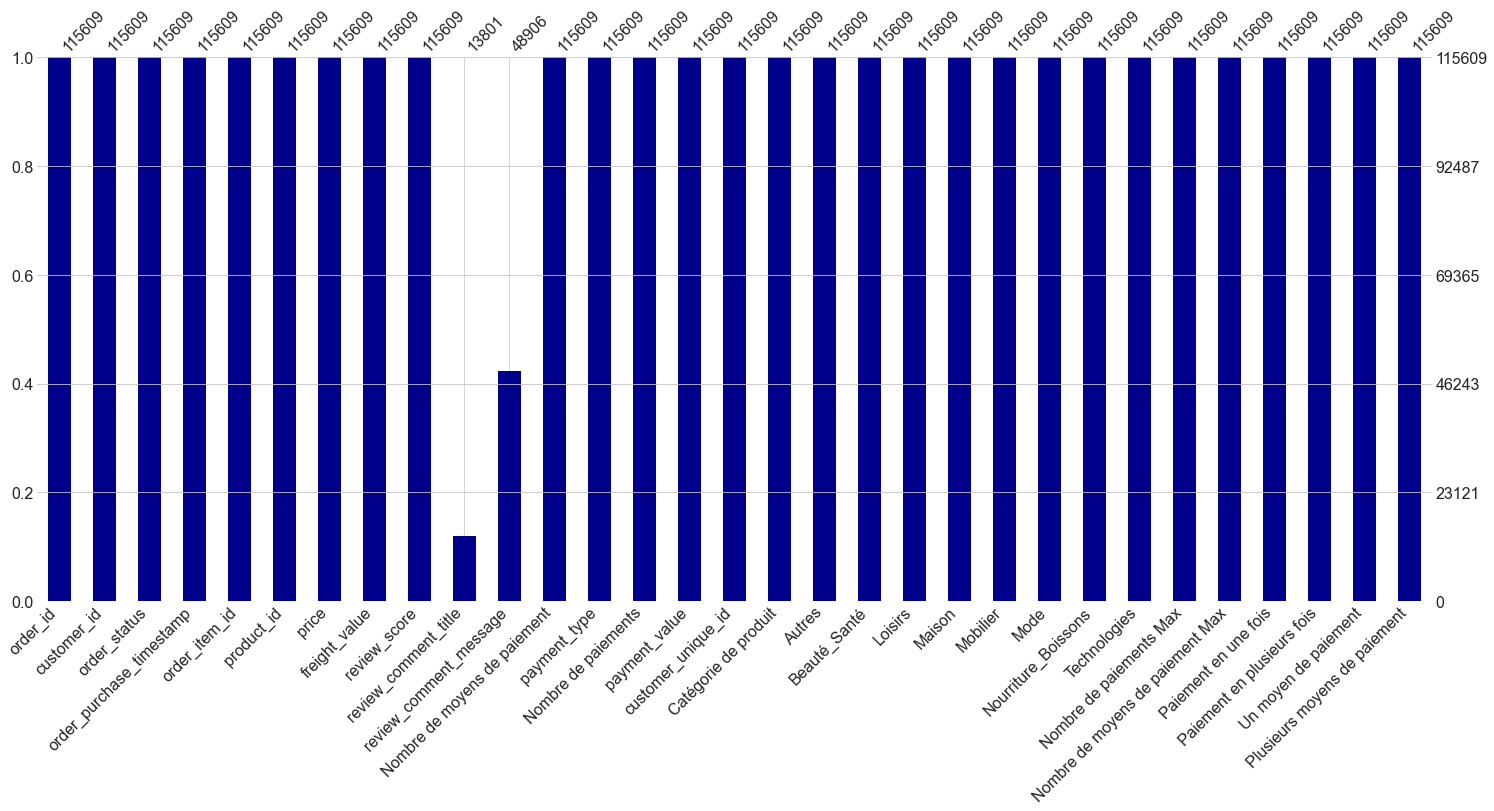

In [56]:
msno.bar(df_Commandes, color="darkblue")
plt.show()

In [57]:
taux_remp = 100*(1-df_Commandes.isnull().sum().sum()
                 / (df_Commandes.shape[0]*df_Commandes.shape[1]))
print('Le dataset présente un taux de remplissage de '
      + str(round(taux_remp)) + '%.')

Le dataset présente un taux de remplissage de 95%.


[Retour au sommaire](#Sommaire)

### Clients <a class="anchor" id="Partie2_3"></a>

In [58]:
df_Clients.drop(['order_status', 'customer_id',
                 'Catégorie de produit'], axis=1, inplace=True)

In [59]:
df_Clients = pd.merge(df_Clients,
                      df_Commandes.groupby(['customer_unique_id']).agg(
                          {'price': 'min'}), on='customer_unique_id').rename(
    columns={'price_x': 'price', 'price_y': 'Montant Min'})

df_Clients = pd.merge(df_Clients,
                      df_Commandes.groupby(['customer_unique_id']).agg(
                          {'price': 'max'}), on='customer_unique_id').rename(
    columns={'price_x': 'price', 'price_y': 'Montant Max'})

In [60]:
df_Clients = pd.merge(df_Clients,
                      df_Clients.groupby('customer_unique_id').agg(
                          {'order_purchase_timestamp': 'nunique'}),
                      on='customer_unique_id').rename(
    columns={'order_purchase_timestamp_x': 'Date de la commande',
             'order_purchase_timestamp_y': 'Nombre de commandes'})

In [61]:
df_Clients.head()

order_id  Date de la commande  order_item_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  2017-10-02 10:56:33              1   
1  e481f51cbdc54678b7cc49136f2d6af7  2017-10-02 10:56:33              1   
2  e481f51cbdc54678b7cc49136f2d6af7  2017-10-02 10:56:33              1   
3  69923a4e07ce446644394df37a710286  2017-09-04 11:26:38              1   
4  128e10d95713541c87cd1a2e48201934  2017-08-15 18:29:31              1   

                         product_id  price  freight_value  review_score  \
0  87285b34884572647811a353c7ac498a  29.99           8.72             4   
1  87285b34884572647811a353c7ac498a  29.99           8.72             4   
2  87285b34884572647811a353c7ac498a  29.99           8.72             4   
3  9abb00920aae319ef9eba674b7d2e6ff  35.39           8.72             5   
4  87285b34884572647811a353c7ac498a  29.99           7.78             4   

  review_comment_title                             review_comment_message  \
0                  NaN  Não testei o produto ainda, mas ele veio corre...   
1                  NaN  Não testei o produto ainda, mas ele veio corre...   
2                  NaN  Não testei o produto ainda, mas ele veio corre...   
3                  NaN  O produto está ok e foi entregue bem antes do ...   
4                  NaN  Deveriam embalar melhor o produto. A caixa vei...   

   Nombre de moyens de paiement  ... Technologies  Nombre de paiements Max  \
0                             1  ...            0                        1   
1                             3  ...            0                        1   
2                             2  ...            0                        1   
3                             1  ...            0                        1   
4                             1  ...            0                        3   

   Nombre de moyens de paiement Max Paiement en une fois  \
0                                 3                    1   
1                                 3                    1   
2                                 3                    1   
3                                 1                    1   
4                                 1                    0   

   Paiement en plusieurs fois  Un moyen de paiement  \
0                           0                     0   
1                           0                     0   
2                           0                     0   
3                           0                     1   
4                           1                     1   

   Plusieurs moyens de paiement  Montant Min  Montant Max  Nombre de commandes  
0                             1        29.99        35.39                    2  
1                             1        29.99        35.39                    2  
2                             1        29.99        35.39                    2  
3                             0        29.99        35.39                    2  
4                             0        29.99        29.99                    1  

[5 rows x 31 columns]

In [62]:
df_Clients = pd.merge(df_Clients,
                      df_Clients.groupby(['customer_unique_id']).agg(
                          {'review_score': 'mean'}),
                      on='customer_unique_id').rename(
    columns={'review_score_x': 'review_score',
             'review_score_y': 'Note Moyenne'})

In [63]:
df_Clients = pd.merge(df_Clients,
                      df_Clients.groupby(['customer_unique_id']).agg(
                          {'order_item_id': 'nunique'}),
                      on='customer_unique_id').rename(
    columns={'order_item_id_x': 'order_item_id',
             'order_item_id_y': 'Nombre d\'objets Max'})

In [64]:
a = df_Clients[['customer_unique_id', 'price', 'Nombre d\'objets Max']]

In [65]:
a = a.drop_duplicates()

In [66]:
a = pd.merge(a, a.groupby(['customer_unique_id']).agg(
    {'Nombre d\'objets Max': 'sum'}), on='customer_unique_id').rename(
    columns={'Nombre d\'objets Max_x': 'Nombre d\'objets Max',
             'Nombre d\'objets Max_y': 'Nombre d\'objets Total'})

In [67]:
a = a[['customer_unique_id', 'Nombre d\'objets Total']]

In [68]:
df_Clients = pd.merge(df_Clients, a, on='customer_unique_id')
df_Clients = df_Clients.drop_duplicates()

In [69]:
df_Clients.head()

order_id  Date de la commande  order_item_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  2017-10-02 10:56:33              1   
2  e481f51cbdc54678b7cc49136f2d6af7  2017-10-02 10:56:33              1   
4  e481f51cbdc54678b7cc49136f2d6af7  2017-10-02 10:56:33              1   
6  69923a4e07ce446644394df37a710286  2017-09-04 11:26:38              1   
8  128e10d95713541c87cd1a2e48201934  2017-08-15 18:29:31              1   

                         product_id  price  freight_value  review_score  \
0  87285b34884572647811a353c7ac498a  29.99           8.72             4   
2  87285b34884572647811a353c7ac498a  29.99           8.72             4   
4  87285b34884572647811a353c7ac498a  29.99           8.72             4   
6  9abb00920aae319ef9eba674b7d2e6ff  35.39           8.72             5   
8  87285b34884572647811a353c7ac498a  29.99           7.78             4   

  review_comment_title                             review_comment_message  \
0                  NaN  Não testei o produto ainda, mas ele veio corre...   
2                  NaN  Não testei o produto ainda, mas ele veio corre...   
4                  NaN  Não testei o produto ainda, mas ele veio corre...   
6                  NaN  O produto está ok e foi entregue bem antes do ...   
8                  NaN  Deveriam embalar melhor o produto. A caixa vei...   

   Nombre de moyens de paiement  ... Paiement en une fois  \
0                             1  ...                    1   
2                             3  ...                    1   
4                             2  ...                    1   
6                             1  ...                    1   
8                             1  ...                    0   

   Paiement en plusieurs fois  Un moyen de paiement  \
0                           0                     0   
2                           0                     0   
4                           0                     0   
6                           0                     1   
8                           1                     1   

  Plusieurs moyens de paiement  Montant Min  Montant Max  Nombre de commandes  \
0                            1        29.99        35.39                    2   
2                            1        29.99        35.39                    2   
4                            1        29.99        35.39                    2   
6                            0        29.99        35.39                    2   
8                            0        29.99        29.99                    1   

   Note Moyenne  Nombre d'objets Max  Nombre d'objets Total  
0          4.25                    1                      2  
2          4.25                    1                      2  
4          4.25                    1                      2  
6          4.25                    1                      2  
8          4.00                    1                      1  

[5 rows x 34 columns]

In [70]:
df_Clients.shape

(115341, 34)

In [71]:
df_Clients['Date de la commande'] = df_Clients[
    'Date de la commande'].astype('datetime64')

In [72]:
df_Clients['Récence'] = (df_Clients['Date de la commande'].max()
                         - df_Clients['Date de la commande'])
df_Clients['Récence'] = df_Clients['Récence'].astype('timedelta64[D]')

In [73]:
df_Clients = pd.merge(df_Clients,
                      df_Clients.groupby(['customer_unique_id']).agg(
                          {'Date de la commande': 'min'}),
                      on='customer_unique_id').rename(
    columns={'Date de la commande_x': 'Date de la commande',
             'Date de la commande_y': 'Première commande'})

df_Clients = pd.merge(df_Clients,
                      df_Clients.groupby(['customer_unique_id']).agg(
                          {'Date de la commande': 'max'}),
                      on='customer_unique_id').rename(
    columns={'Date de la commande_x': 'Date de la commande',
             'Date de la commande_y': 'Dernière commande'})

In [74]:
df_Clients['Fréquence'] = ((df_Clients['Dernière commande']
                            - df_Clients['Première commande'])
                           / df_Clients['Nombre de commandes'])
df_Clients['Fréquence'] = df_Clients['Fréquence'].astype('timedelta64[D]')

In [75]:
print(df_Clients.shape)
df_Clients.head()

(115341, 38)


order_id Date de la commande  order_item_id  \
0  e481f51cbdc54678b7cc49136f2d6af7 2017-10-02 10:56:33              1   
1  e481f51cbdc54678b7cc49136f2d6af7 2017-10-02 10:56:33              1   
2  e481f51cbdc54678b7cc49136f2d6af7 2017-10-02 10:56:33              1   
3  69923a4e07ce446644394df37a710286 2017-09-04 11:26:38              1   
4  128e10d95713541c87cd1a2e48201934 2017-08-15 18:29:31              1   

                         product_id  price  freight_value  review_score  \
0  87285b34884572647811a353c7ac498a  29.99           8.72             4   
1  87285b34884572647811a353c7ac498a  29.99           8.72             4   
2  87285b34884572647811a353c7ac498a  29.99           8.72             4   
3  9abb00920aae319ef9eba674b7d2e6ff  35.39           8.72             5   
4  87285b34884572647811a353c7ac498a  29.99           7.78             4   

  review_comment_title                             review_comment_message  \
0                  NaN  Não testei o produto ainda, mas ele veio corre...   
1                  NaN  Não testei o produto ainda, mas ele veio corre...   
2                  NaN  Não testei o produto ainda, mas ele veio corre...   
3                  NaN  O produto está ok e foi entregue bem antes do ...   
4                  NaN  Deveriam embalar melhor o produto. A caixa vei...   

   Nombre de moyens de paiement  ... Montant Min  Montant Max  \
0                             1  ...       29.99        35.39   
1                             3  ...       29.99        35.39   
2                             2  ...       29.99        35.39   
3                             1  ...       29.99        35.39   
4                             1  ...       29.99        29.99   

   Nombre de commandes Note Moyenne  Nombre d'objets Max  \
0                    2         4.25                    1   
1                    2         4.25                    1   
2                    2         4.25                    1   
3                    2         4.25                    1   
4                    1         4.00                    1   

   Nombre d'objets Total  Récence   Première commande   Dernière commande  \
0                      2    335.0 2017-09-04 11:26:38 2017-10-02 10:56:33   
1                      2    335.0 2017-09-04 11:26:38 2017-10-02 10:56:33   
2                      2    335.0 2017-09-04 11:26:38 2017-10-02 10:56:33   
3                      2    363.0 2017-09-04 11:26:38 2017-10-02 10:56:33   
4                      1    383.0 2017-08-15 18:29:31 2017-08-15 18:29:31   

   Fréquence  
0       13.0  
1       13.0  
2       13.0  
3       13.0  
4        0.0  

[5 rows x 38 columns]

In [76]:
df_Clients.drop(['order_id', 'order_item_id', 'product_id', 'freight_value',
                 'review_score', 'review_comment_title',
                 'review_comment_message', 'Nombre de paiements',
                 'Nombre de moyens de paiement', 'payment_value',
                 'Dernière commande', 'Première commande'],
                axis=1, inplace=True)

In [77]:
df_Clients = pd.merge(df_Clients,
                      df_Clients.groupby(['customer_unique_id']).agg(
                          {'Récence': 'min'}),
                      on='customer_unique_id').rename(
    columns={'Récence_y': 'Récence'})

df_Clients.drop('Récence_x', axis=1, inplace=True)

In [78]:
print(df_Clients.shape)
df_Clients = df_Clients.drop_duplicates()
print(df_Clients.shape)

(115341, 26)
(101233, 26)


In [79]:
df_Clients = pd.merge(df_Clients,
                      df_Clients.groupby(['customer_unique_id']).agg(
                          {'price': 'mean'}), on='customer_unique_id').rename(
    columns={'price_x': 'price', 'price_y': 'Montant Moyen'})

print(df_Clients['price'].max())
print(df_Clients['price'].mean())
print(df_Clients.shape)
print(len(df_Clients['customer_unique_id'].unique()))

df_Clients = pd.merge(df_Clients,
                      df_Clients.groupby(['customer_unique_id']).agg(
                          {'price': 'sum'}), on='customer_unique_id').rename(
    columns={'price_x': 'price', 'price_y': 'Montant'})

6735.0
124.84632076507349
(101233, 27)
93396


In [80]:
print(df_Clients['Montant'].max())
print(df_Clients['Montant'].mean())

7388.0
144.0357782542438


In [81]:
print(df_Clients.shape)
df_Clients.head()

(101233, 28)


Date de la commande  price payment_type                customer_unique_id  \
0 2017-10-02 10:56:33  29.99  credit_card  7c396fd4830fd04220f754e42b4e5bff   
1 2017-10-02 10:56:33  29.99      voucher  7c396fd4830fd04220f754e42b4e5bff   
2 2017-09-04 11:26:38  35.39  credit_card  7c396fd4830fd04220f754e42b4e5bff   
3 2017-08-15 18:29:31  29.99  credit_card  3a51803cc0d012c3b5dc8b7528cb05f7   
4 2017-08-02 18:24:47  29.99  credit_card  ef0996a1a279c26e7ecbd737be23d235   

   Autres  Beauté_Santé  Loisirs  Maison  Mobilier  Mode  ...  Montant Min  \
0       0             1        0       1         0     0  ...        29.99   
1       0             1        0       1         0     0  ...        29.99   
2       0             1        0       1         0     0  ...        29.99   
3       0             0        0       1         0     0  ...        29.99   
4       0             0        0       1         0     0  ...        29.99   

   Montant Max  Nombre de commandes  Note Moyenne  Nombre d'objets Max  \
0        35.39                    2          4.25                    1   
1        35.39                    2          4.25                    1   
2        35.39                    2          4.25                    1   
3        29.99                    1          4.00                    1   
4        29.99                    1          5.00                    1   

   Nombre d'objets Total  Fréquence  Récence  Montant Moyen  Montant  
0                      2       13.0    335.0          31.79    95.37  
1                      2       13.0    335.0          31.79    95.37  
2                      2       13.0    335.0          31.79    95.37  
3                      1        0.0    383.0          29.99    29.99  
4                      1        0.0    396.0          29.99    29.99  

[5 rows x 28 columns]

In [82]:
df_Clients.describe()

price         Autres   Beauté_Santé        Loisirs  \
count  101233.000000  101233.000000  101233.000000  101233.000000   
mean      124.846321       0.147403       0.156856       0.142424   
std       187.850015       0.354508       0.363667       0.349486   
min         0.850000       0.000000       0.000000       0.000000   
25%        41.310000       0.000000       0.000000       0.000000   
50%        79.000000       0.000000       0.000000       0.000000   
75%       139.500000       0.000000       0.000000       0.000000   
max      6735.000000       1.000000       1.000000       1.000000   

              Maison       Mobilier           Mode  Nourriture_Boissons  \
count  101233.000000  101233.000000  101233.000000        101233.000000   
mean        0.232730       0.096915       0.097745             0.010639   
std         0.422574       0.295844       0.296971             0.102595   
min         0.000000       0.000000       0.000000             0.000000   
25%         0.000000       0.000000       0.000000             0.000000   
50%         0.000000       0.000000       0.000000             0.000000   
75%         0.000000       0.000000       0.000000             0.000000   
max         1.000000       1.000000       1.000000             1.000000   

        Technologies  Nombre de paiements Max  ...    Montant Min  \
count  101233.000000            101233.000000  ...  101233.000000   
mean        0.160580                 2.951498  ...     121.217327   
std         0.367145                 2.743993  ...     185.336378   
min         0.000000                 0.000000  ...       0.850000   
25%         0.000000                 1.000000  ...      39.900000   
50%         0.000000                 2.000000  ...      74.900000   
75%         0.000000                 4.000000  ...     134.900000   
max         1.000000                24.000000  ...    6735.000000   

         Montant Max  Nombre de commandes   Note Moyenne  Nombre d'objets Max  \
count  101233.000000        101233.000000  101233.000000        101233.000000   
mean      128.797448             1.071261       4.084282             1.187962   
std       190.609199             0.362846       1.334799             0.627080   
min         0.850000             1.000000       1.000000             1.000000   
25%        44.900000             1.000000       4.000000             1.000000   
50%        79.990000             1.000000       5.000000             1.000000   
75%       144.000000             1.000000       5.000000             1.000000   
max      6735.000000            15.000000       5.000000            21.000000   

       Nombre d'objets Total      Fréquence        Récence  Montant Moyen  \
count          101233.000000  101233.000000  101233.000000  101233.000000   
mean                1.455553       2.611935     241.249000     124.846321   
std                 1.879348      16.949248     152.987922     186.341591   
min                 1.000000       0.000000       0.000000       0.850000   
25%                 1.000000       0.000000     117.000000      43.200000   
50%                 1.000000       0.000000     222.000000      79.000000   
75%                 1.000000       0.000000     350.000000     139.000000   
max                77.000000     304.000000     728.000000    6735.000000   

             Montant  
count  101233.000000  
mean      144.035778  
std       214.066245  
min         0.850000  
25%        47.880000  
50%        89.900000  
75%       159.850000  
max      7388.000000  

[8 rows x 25 columns]

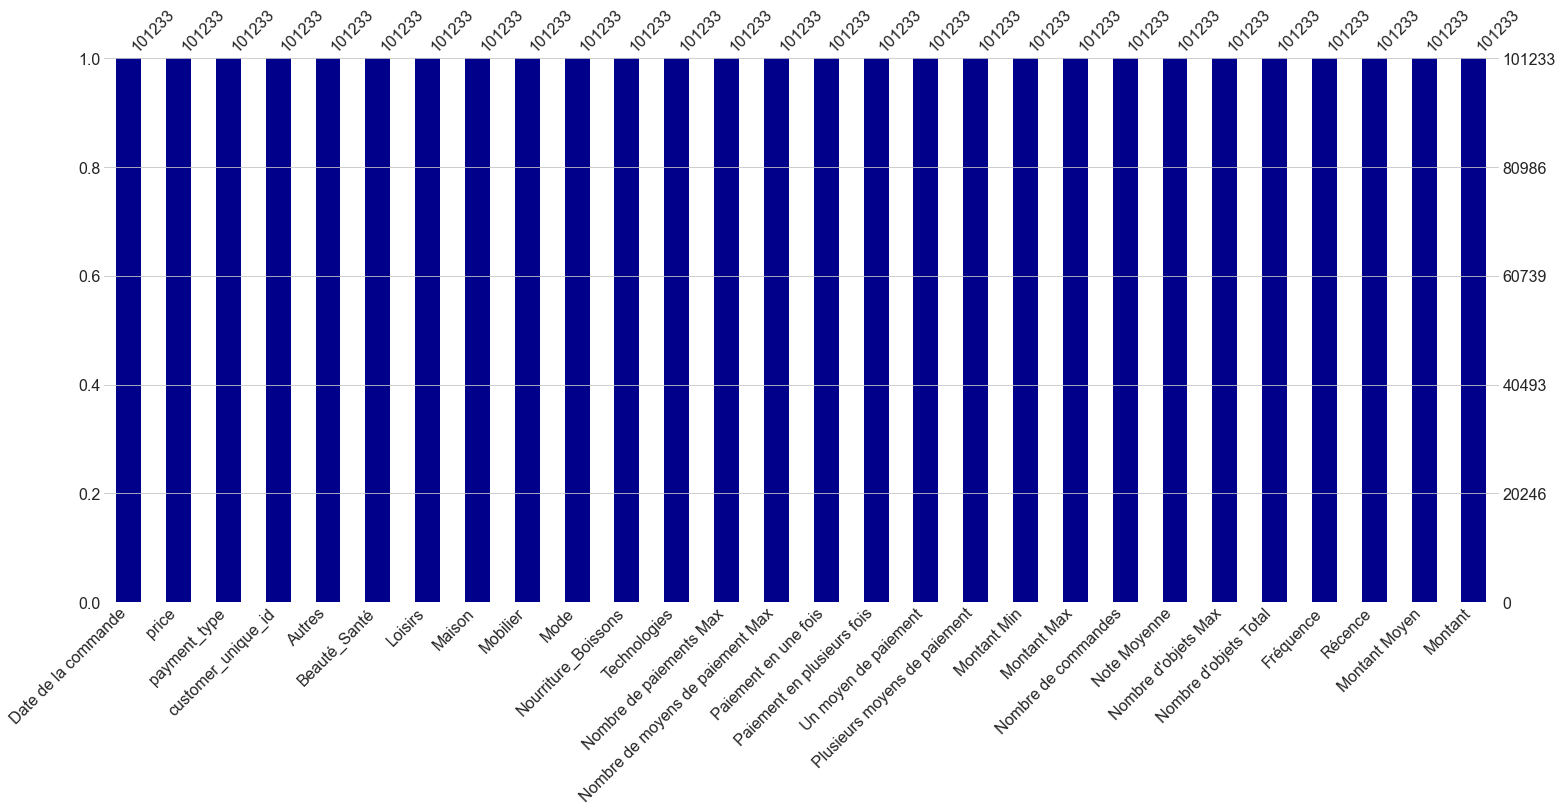

In [83]:
msno.bar(df_Clients, color="darkblue")
plt.show()

In [84]:
taux_remp = 100*(1-df_Clients.isnull().sum().sum()
                 / (df_Clients.shape[0]*df_Clients.shape[1]))
print('Le dataset présente un taux de remplissage de '
      + str(round(taux_remp)) + '%.')

Le dataset présente un taux de remplissage de 100%.


[Retour au sommaire](#Sommaire)

## Analyse exploratoire <a class="anchor" id="Partie3"></a>
### Jeu de données des produits <a class="anchor" id="Partie3_1"></a>

In [85]:
df_Produits.head()

product_id Catégorie de produit
0  1e9e8ef04dbcff4541ed26657ea517e5         Beauté_Santé
1  6a2fb4dd53d2cdb88e0432f1284a004c         Beauté_Santé
2  0d009643171aee696f4733340bc2fdd0         Beauté_Santé
3  b1eae565a61935e0011ee7682fef9dc9         Beauté_Santé
4  8da90b37f0fb171b4877c124f965b1f6         Beauté_Santé

In [86]:
df_Produits.shape

(32328, 2)

In [87]:
df_Produits.describe()

product_id Catégorie de produit
count                              32328                32328
unique                             32328                    8
top     1e9e8ef04dbcff4541ed26657ea517e5               Maison
freq                                   1                 7278

In [88]:
def decrit_variable(df, colonne):
    df = df.dropna(subset=[colonne])
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))

    # Boxplot
    sns.boxplot(df[colonne], ax=axes[0])
    plt.sca(axes[0])
    plt.title(colonne, fontsize=20)
    plt.xlabel('Valeurs de la variable', fontsize=15)
    plt.tick_params(axis='x', which='major', labelsize=15)
    plt.tick_params(axis='y', which='major', labelsize=15)

    # Histogramme
    sns.distplot(df[colonne], ax=axes[1])
    plt.sca(axes[1])
    plt.title(colonne, fontsize=20)
    plt.xlabel('Valeurs de la variable', fontsize=15)
    plt.ylabel('Densité', fontsize=15)
    plt.tick_params(axis='x', which='major', labelsize=15)
    plt.tick_params(axis='y', which='major', labelsize=15)

    plt.show()

In [89]:
for col in df_Produits.select_dtypes(include=['float64', 'int64']):
    decrit_variable(df_Produits, col)

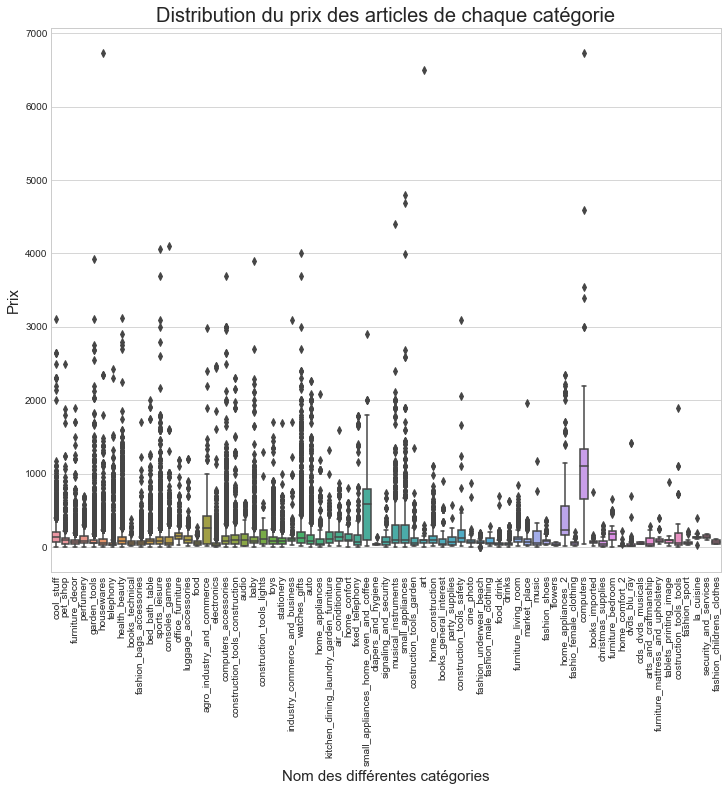

In [90]:
df_prix_par_cat = df_items.merge(df_products, on='product_id')
df_prix_par_cat = df_prix_par_cat.drop(columns=['order_id', 'product_id'])
df_prix_par_cat = df_prix_par_cat.merge(
    df_translation, on='product_category_name')
df_prix_par_cat = df_prix_par_cat.drop(columns=['product_category_name'])
df_prix_par_cat = df_prix_par_cat.rename(
    columns={'product_category_name_english': 'product_category_name'})

plt.figure(figsize=(12, 10))
sns.boxplot(x=df_prix_par_cat['product_category_name'],
            y=df_prix_par_cat['price'])
plt.title("Distribution du prix des articles de chaque catégorie",
          fontsize=20)
plt.xlabel("Nom des différentes catégories", fontsize=15)
plt.ylabel("Prix", fontsize=15)
plt.tick_params(axis='both', labelsize=10)
plt.xticks(rotation=90)
plt.show()

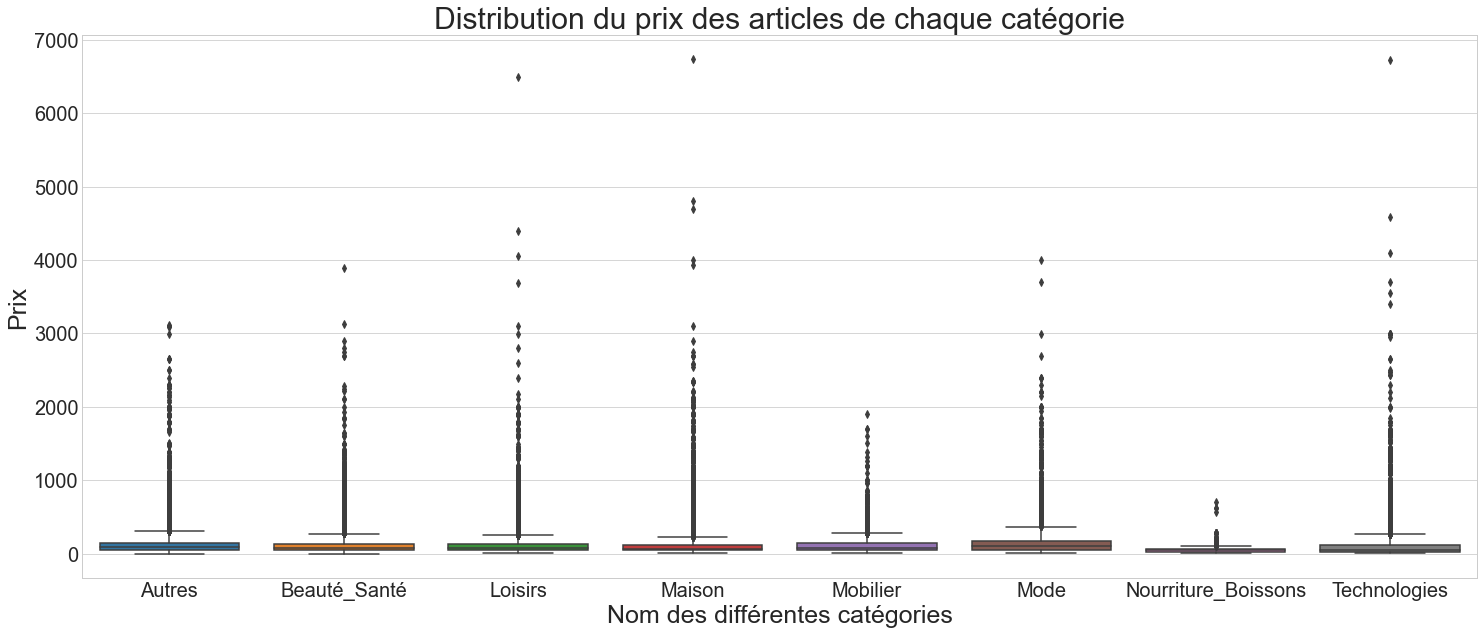

In [91]:
df_prix_par_cat2 = df_prix_par_cat.copy()
df_prix_par_cat2['Catégorie de produit'] = df_prix_par_cat2[
    'product_category_name'].map(nouvelles_catégories)
df_prix_par_cat2['Catégorie de produit'] = df_prix_par_cat2[
    'Catégorie de produit'].astype('category')

plt.figure(figsize=(25, 10))
sns.boxplot(x=df_prix_par_cat2['Catégorie de produit'],
            y=df_prix_par_cat2['price'])
plt.title("Distribution du prix des articles de chaque catégorie",
          fontsize=30)
plt.xlabel("Nom des différentes catégories", fontsize=25)
plt.ylabel("Prix", fontsize=25)
plt.tick_params(axis='both', labelsize=20)
# plt.xticks(rotation=90)
plt.show()

[Retour au sommaire](#Sommaire)

### Jeu de données des commandes <a class="anchor" id="Partie3_2"></a>

In [92]:
df_Commandes.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  69923a4e07ce446644394df37a710286  31f31efcb333fcbad2b1371c8cf0fa84   
4  128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   

  order_status order_purchase_timestamp  order_item_id  \
0    delivered      2017-10-02 10:56:33              1   
1    delivered      2017-10-02 10:56:33              1   
2    delivered      2017-10-02 10:56:33              1   
3    delivered      2017-09-04 11:26:38              1   
4    delivered      2017-08-15 18:29:31              1   

                         product_id  price  freight_value  review_score  \
0  87285b34884572647811a353c7ac498a  29.99           8.72             4   
1  87285b34884572647811a353c7ac498a  29.99           8.72             4   
2  87285b34884572647811a353c7ac498a  29.99           8.72             4   
3  9abb00920aae319ef9eba674b7d2e6ff  35.39           8.72             5   
4  87285b34884572647811a353c7ac498a  29.99           7.78             4   

  review_comment_title  ... Mobilier  Mode Nourriture_Boissons  Technologies  \
0                  NaN  ...        0     0                   0             0   
1                  NaN  ...        0     0                   0             0   
2                  NaN  ...        0     0                   0             0   
3                  NaN  ...        0     0                   0             0   
4                  NaN  ...        0     0                   0             0   

   Nombre de paiements Max Nombre de moyens de paiement Max  \
0                        1                                3   
1                        1                                3   
2                        1                                3   
3                        1                                1   
4                        3                                1   

  Paiement en une fois  Paiement en plusieurs fois  Un moyen de paiement  \
0                    1                           0                     0   
1                    1                           0                     0   
2                    1                           0                     0   
3                    1                           0                     1   
4                    0                           1                     1   

   Plusieurs moyens de paiement  
0                             1  
1                             1  
2                             1  
3                             0  
4                             0  

[5 rows x 31 columns]

In [93]:
df_Commandes.shape

(115609, 31)

In [94]:
df_Commandes.describe()

order_item_id          price  freight_value   review_score  \
count  115609.000000  115609.000000  115609.000000  115609.000000   
mean        1.194535     120.619850      20.056880       4.034409   
std         0.685926     182.653476      15.836184       1.385584   
min         1.000000       0.850000       0.000000       1.000000   
25%         1.000000      39.900000      13.080000       4.000000   
50%         1.000000      74.900000      16.320000       5.000000   
75%         1.000000     134.900000      21.210000       5.000000   
max        21.000000    6735.000000     409.680000       5.000000   

       Nombre de moyens de paiement  Nombre de paiements  payment_value  \
count                 115609.000000        115609.000000  115609.000000   
mean                       1.093747             2.946233     172.387379   
std                        0.729849             2.781087     265.873969   
min                        1.000000             0.000000       0.000000   
25%                        1.000000             1.000000      60.870000   
50%                        1.000000             2.000000     108.050000   
75%                        1.000000             4.000000     189.480000   
max                       29.000000            24.000000   13664.080000   

              Autres   Beauté_Santé        Loisirs  ...       Mobilier  \
count  115609.000000  115609.000000  115609.000000  ...  115609.000000   
mean        0.143311       0.151199       0.138034  ...       0.110009   
std         0.350391       0.358245       0.344937  ...       0.312902   
min         0.000000       0.000000       0.000000  ...       0.000000   
25%         0.000000       0.000000       0.000000  ...       0.000000   
50%         0.000000       0.000000       0.000000  ...       0.000000   
75%         0.000000       0.000000       0.000000  ...       0.000000   
max         1.000000       1.000000       1.000000  ...       1.000000   

                Mode  Nourriture_Boissons   Technologies  \
count  115609.000000        115609.000000  115609.000000   
mean        0.092060             0.011158       0.158647   
std         0.289112             0.105042       0.365348   
min         0.000000             0.000000       0.000000   
25%         0.000000             0.000000       0.000000   
50%         0.000000             0.000000       0.000000   
75%         0.000000             0.000000       0.000000   
max         1.000000             1.000000       1.000000   

       Nombre de paiements Max  Nombre de moyens de paiement Max  \
count            115609.000000                     115609.000000   
mean                  2.982752                          1.186750   
std                   2.796790                          1.222709   
min                   0.000000                          1.000000   
25%                   1.000000                          1.000000   
50%                   2.000000                          1.000000   
75%                   4.000000                          1.000000   
max                  24.000000                         29.000000   

       Paiement en une fois  Paiement en plusieurs fois  Un moyen de paiement  \
count         115609.000000               115609.000000         115609.000000   
mean               0.488760                    0.511215              0.929417   
std                0.499876                    0.499876              0.256128   
min                0.000000                    0.000000              0.000000   
25%                0.000000                    0.000000              1.000000   
50%                0.000000                    1.000000              1.000000   
75%                1.000000                    1.000000              1.000000   
max                1.000000                    1.000000              1.000000   

       Plusieurs moyens de paiement  
count                 115609.000000  
mean                       0.070583  
std                        0.256128  
min   

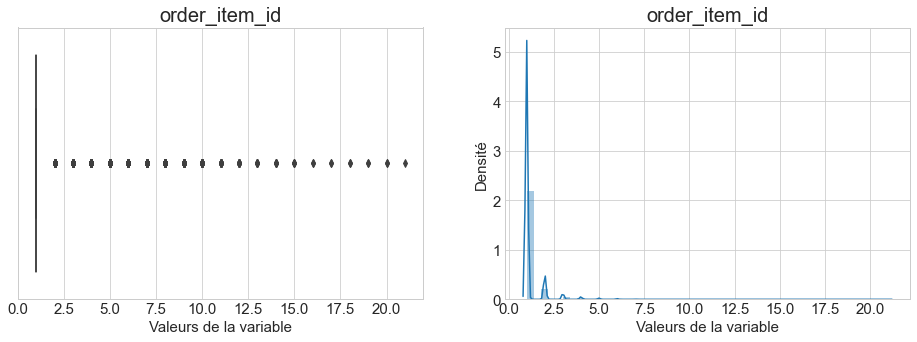

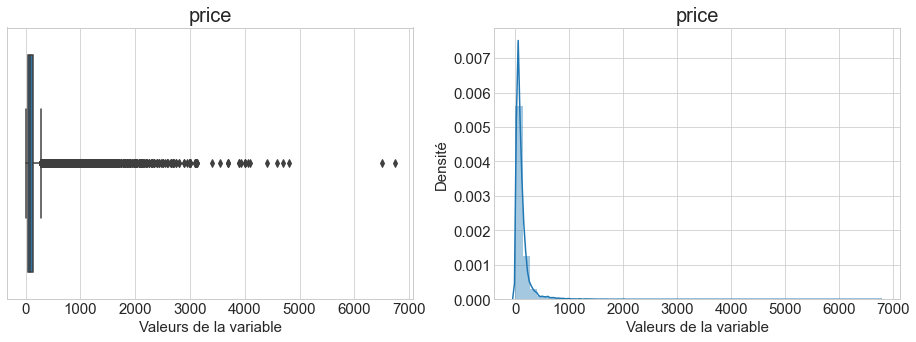

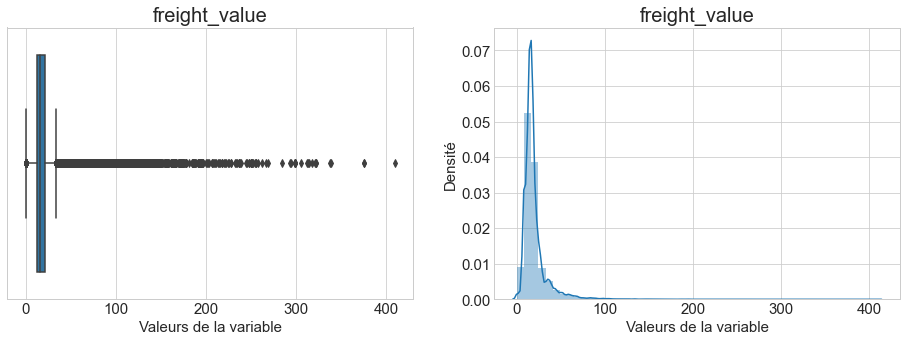

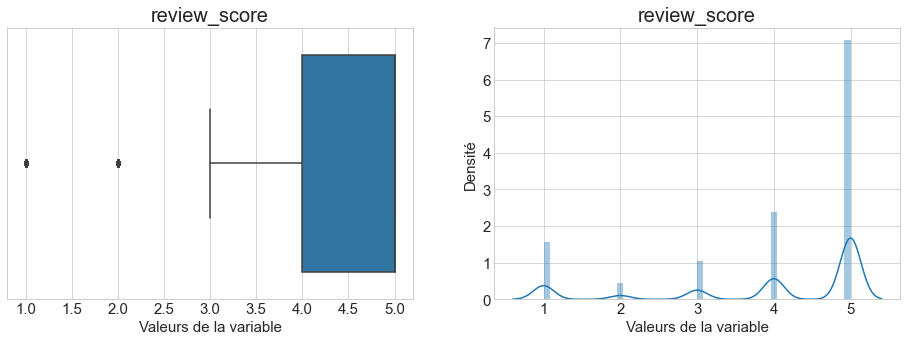

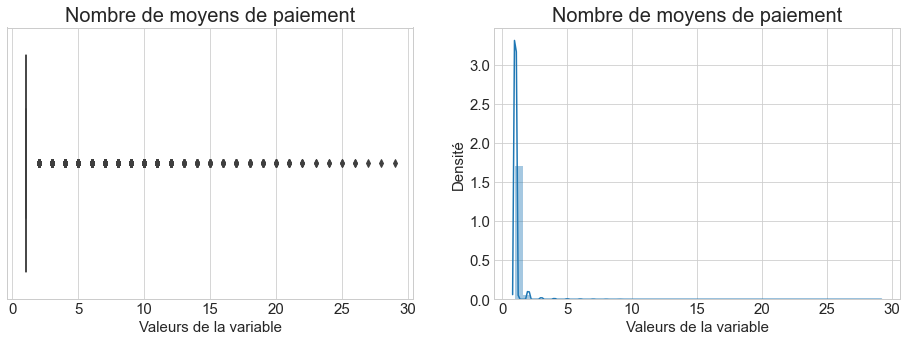

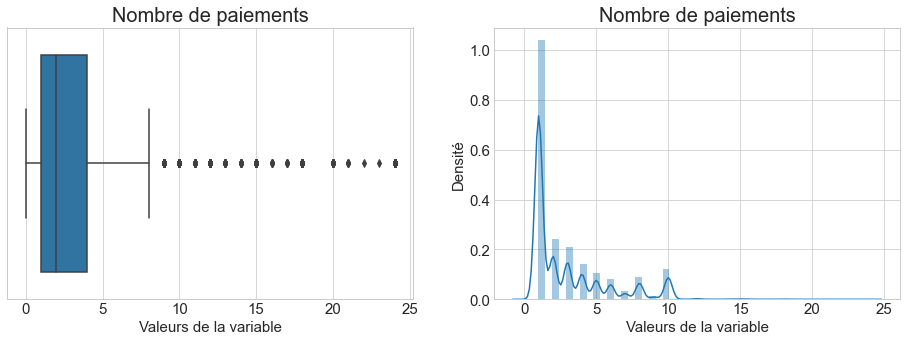

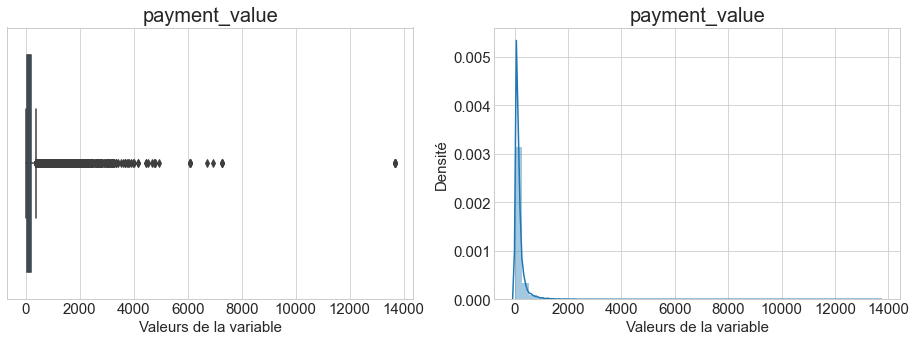

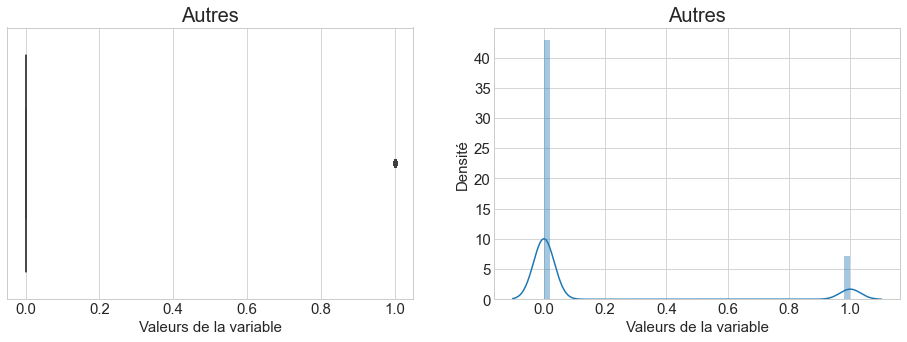

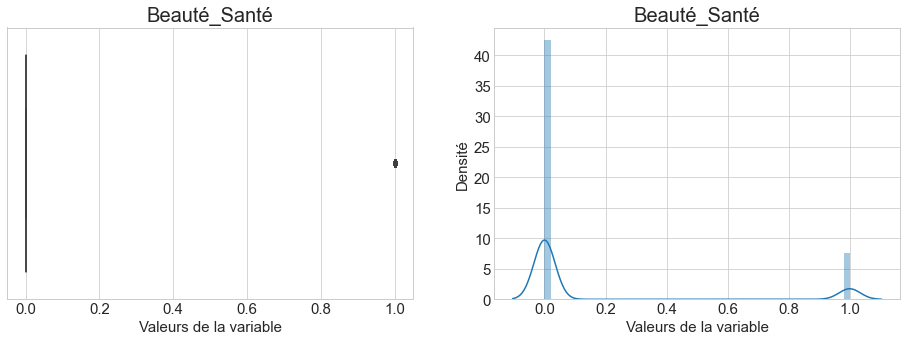

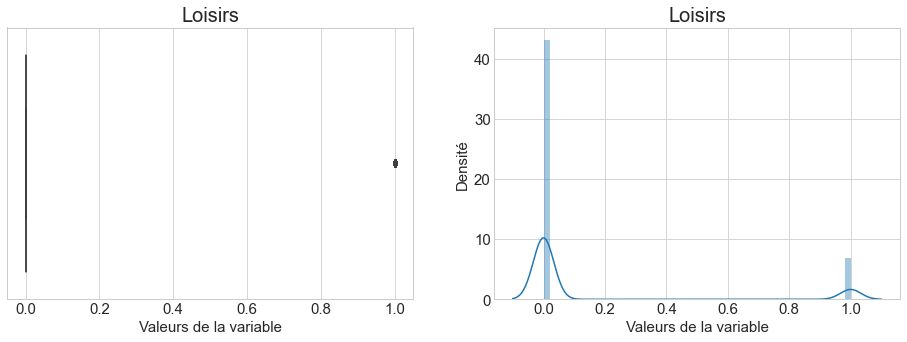

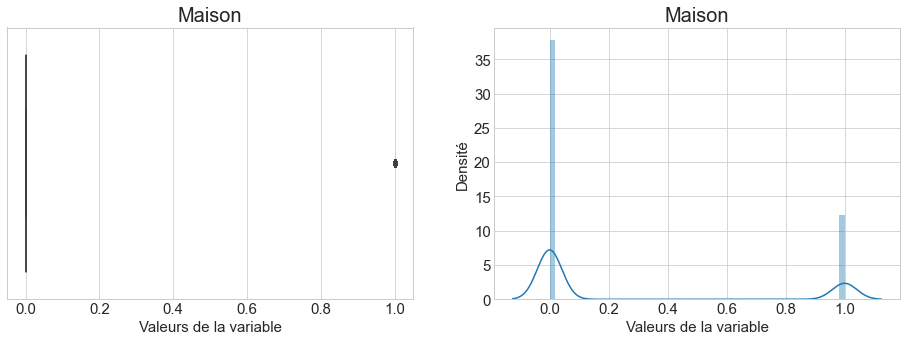

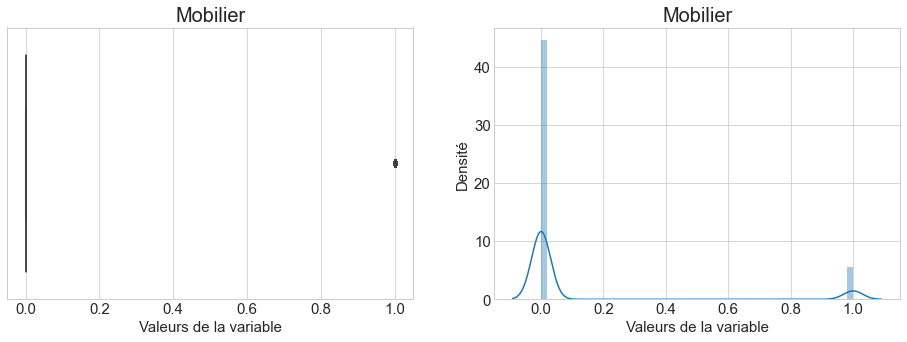

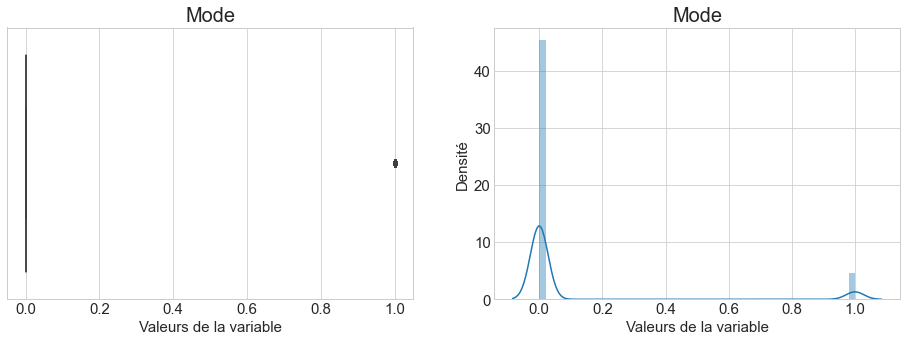

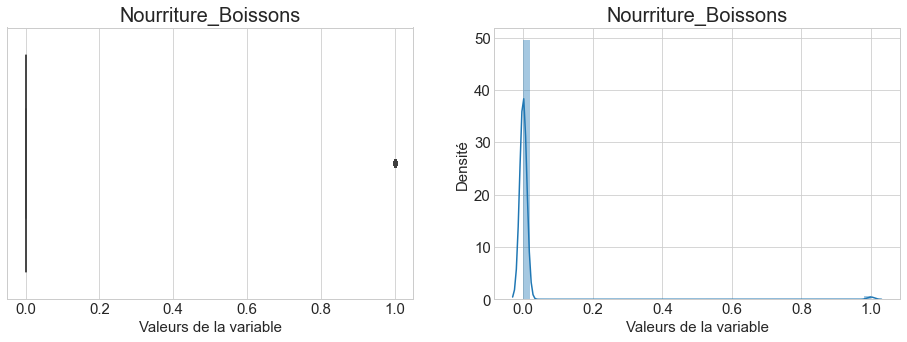

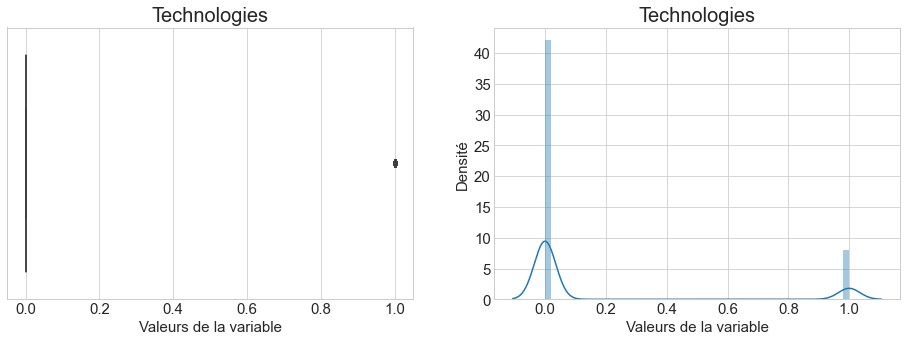

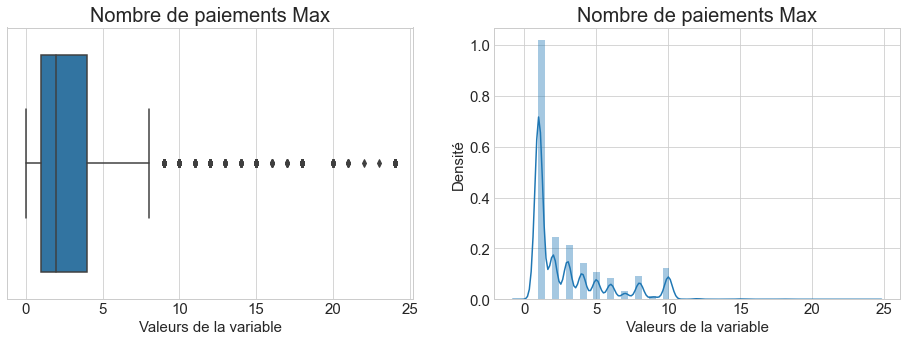

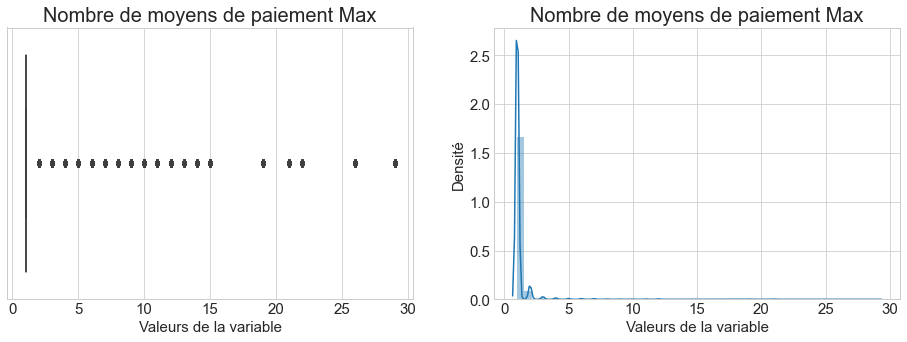

In [95]:
for col in df_Commandes.select_dtypes(include=['float64', 'int64']):
    decrit_variable(df_Commandes, col)

In [96]:
Dates_Commmande = pd.DataFrame()
Dates_Commmande['date'] = df_Commandes['order_purchase_timestamp'].copy()
Dates_Commmande['date'] = Dates_Commmande['date'].astype('datetime64')
Dates_Commmande['date'] = Dates_Commmande['date'].dt.date

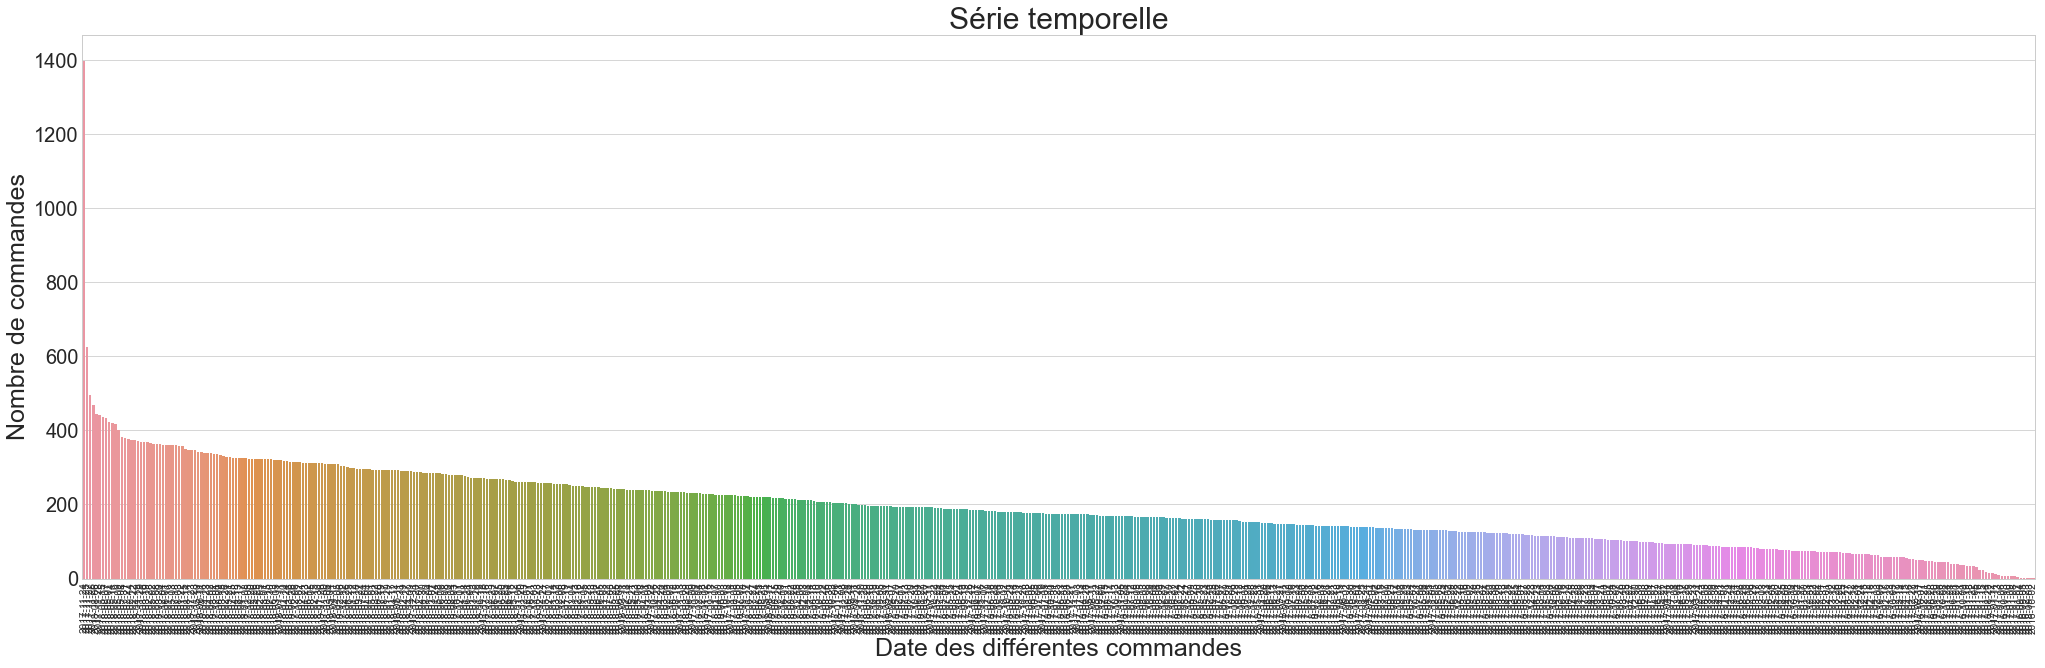

In [97]:
plt.figure(figsize=(35, 10))
plt.title('Série temporelle', fontsize=30)
sns.barplot(x=Dates_Commmande['date'].value_counts().index,
            y=Dates_Commmande['date'].value_counts().values)
plt.xlabel("Date des différentes commandes", fontsize=25)
plt.ylabel("Nombre de commandes", fontsize=25)
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=10)
plt.xticks(rotation=90)
plt.show()

In [98]:
print("Premier jour de la série temporelle: ", Dates_Commmande['date'].min())
print("Dernier jour de la série temporelle: ", Dates_Commmande['date'].max())

Premier jour de la série temporelle:  2016-09-04
Dernier jour de la série temporelle:  2018-09-03


In [99]:
Dates_Commmande['Mois'] = pd.DatetimeIndex(Dates_Commmande['date']).month
Dates_Commmande['Année'] = pd.DatetimeIndex(Dates_Commmande['date']).year
Dates_Commmande.head()

date  Mois  Année
0  2017-10-02    10   2017
1  2017-10-02    10   2017
2  2017-10-02    10   2017
3  2017-09-04     9   2017
4  2017-08-15     8   2017

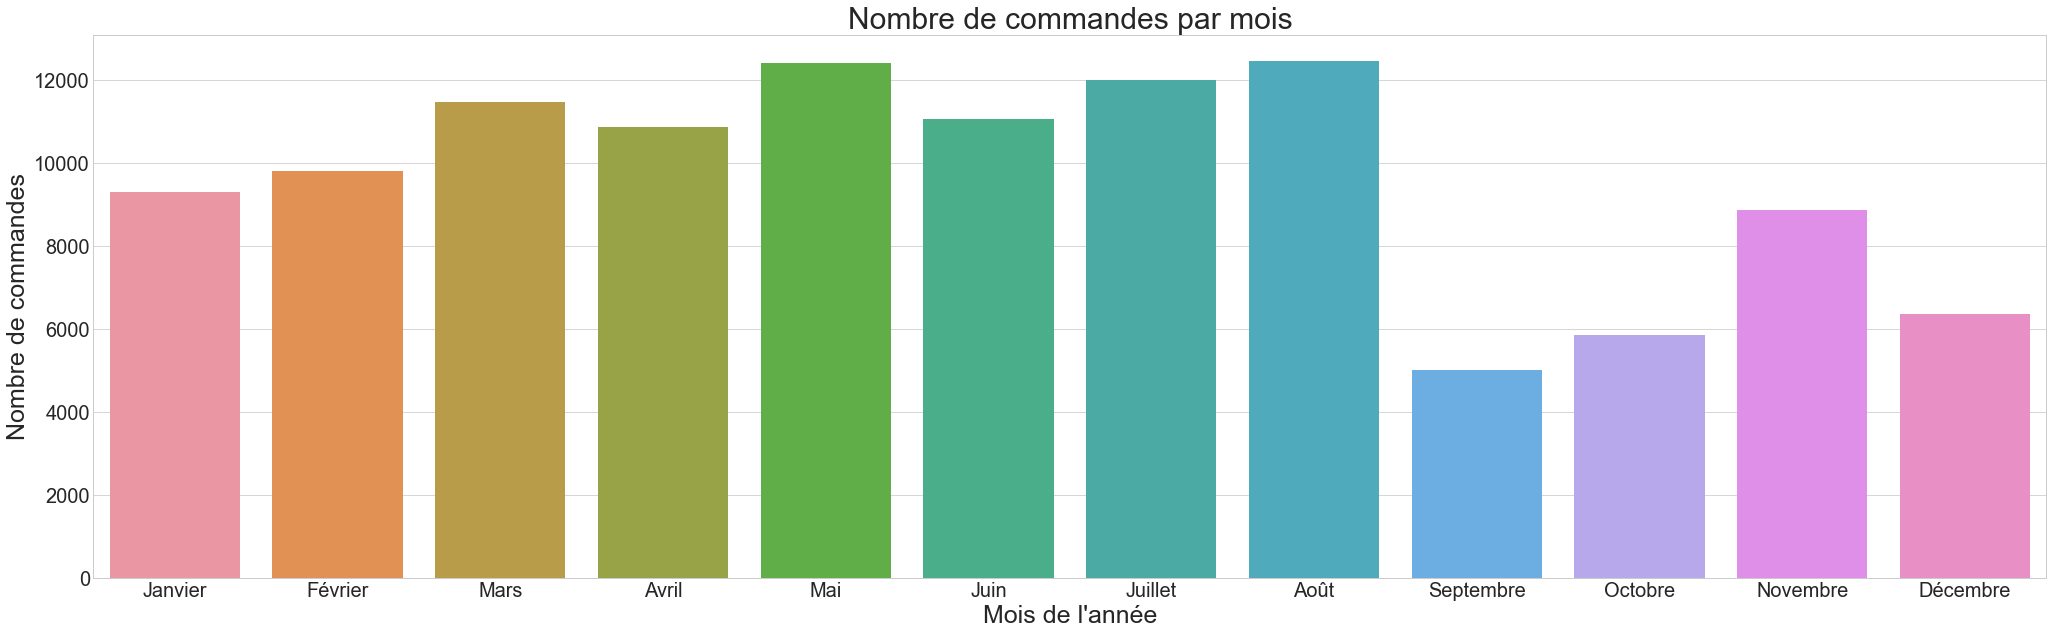

In [100]:
fig, ax = plt.subplots(figsize=(35, 10))
plt.title('Nombre de commandes par mois', fontsize=30)
sns.barplot(x=Dates_Commmande['Mois'].value_counts().index,
            y=Dates_Commmande['Mois'].value_counts().values)
plt.xlabel("Mois de l'année", fontsize=25)
plt.ylabel("Nombre de commandes", fontsize=25)
ax.set_xticklabels(['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin',
                    'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre',
                    'Décembre'])
plt.tick_params(axis='both', labelsize=20)
plt.show()

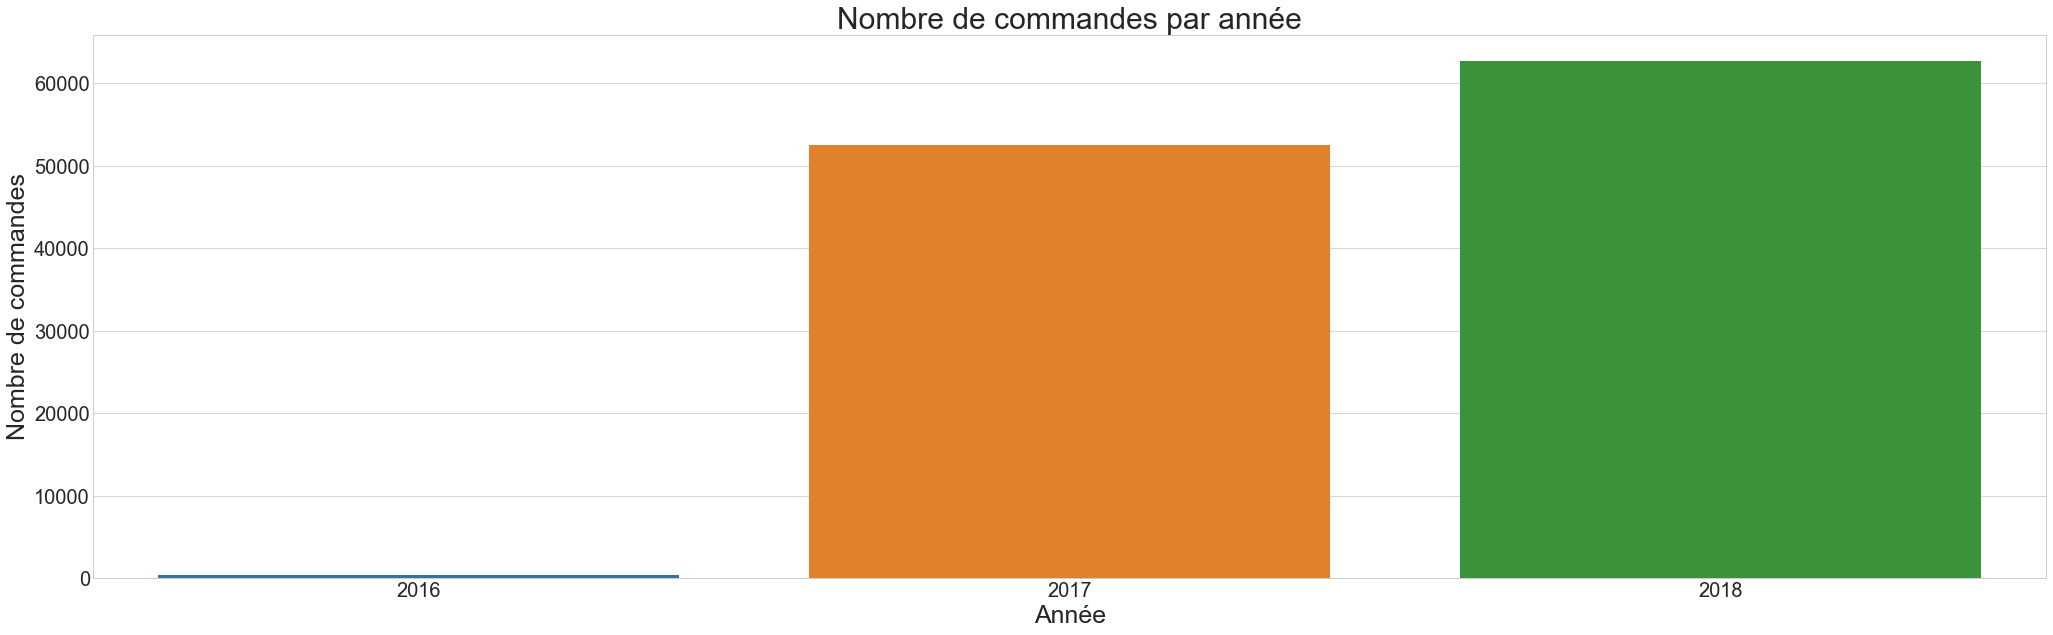

In [101]:
plt.figure(figsize=(35, 10))
plt.title('Nombre de commandes par année', fontsize=30)
sns.barplot(x=Dates_Commmande['Année'].value_counts().index,
            y=Dates_Commmande['Année'].value_counts().values)
plt.xlabel("Année", fontsize=25)
plt.ylabel("Nombre de commandes", fontsize=25)
plt.tick_params(axis='both', labelsize=20)
plt.show()

In [102]:
df_Commandes['order_purchase_timestamp'] = df_Commandes[
    'order_purchase_timestamp'].astype('datetime64')
df_Commandes['order_purchase_timestamp'] = df_Commandes[
    'order_purchase_timestamp'].dt.date
df_groupby_Prix = df_Commandes.groupby(by='order_purchase_timestamp')
df_Chiffre_Affaire = df_groupby_Prix.sum().reset_index()
df_Chiffre_Affaire = df_Chiffre_Affaire[[
    'order_purchase_timestamp', 'price']]
df_Chiffre_Affaire.columns = ['Date', 'Prix cumulé']

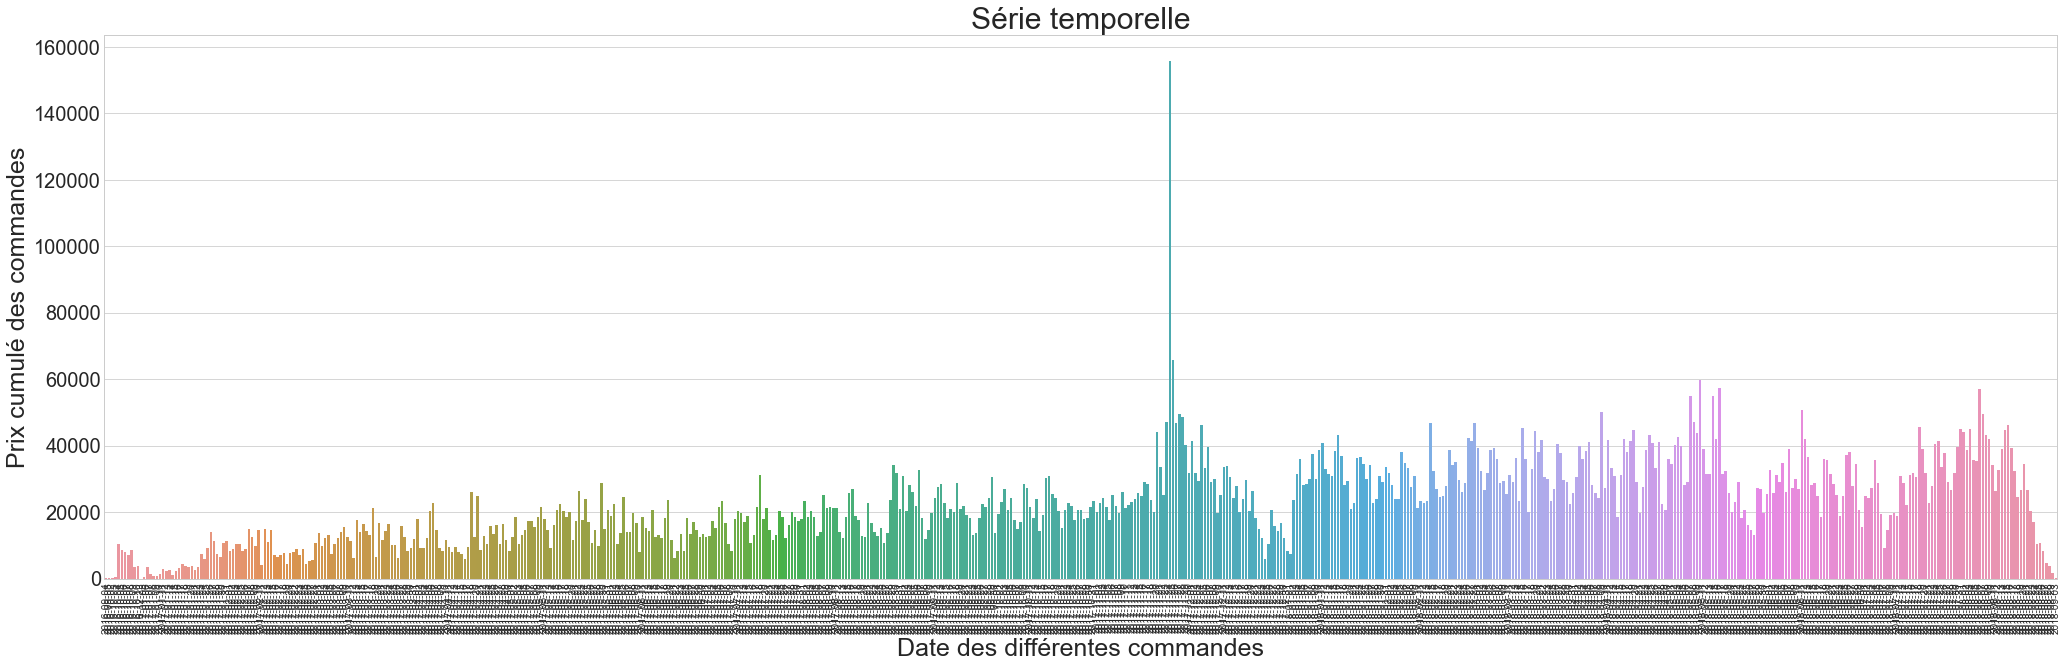

In [103]:
plt.figure(figsize=(35, 10))
plt.title('Série temporelle', fontsize=30)
sns.barplot(x=df_Chiffre_Affaire['Date'],
            y=df_Chiffre_Affaire['Prix cumulé'])
plt.xlabel("Date des différentes commandes", fontsize=25)
plt.ylabel("Prix cumulé des commandes", fontsize=25)
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=10)
plt.xticks(rotation=90)
plt.show()

In [104]:
df_Chiffre_Affaire.sort_values(by='Prix cumulé', ascending=False).head()

Date  Prix cumulé
335  2017-11-24    155811.65
336  2017-11-25     65885.44
502  2018-05-10     59785.86
508  2018-05-16     57468.51
590  2018-08-06     57146.21

In [105]:
df_Chiffre_Affaire['Mois'] = pd.DatetimeIndex(
    df_Chiffre_Affaire['Date']).month
df_Chiffre_Affaire_Mois = df_Chiffre_Affaire.groupby(
    by='Mois').sum().reset_index()

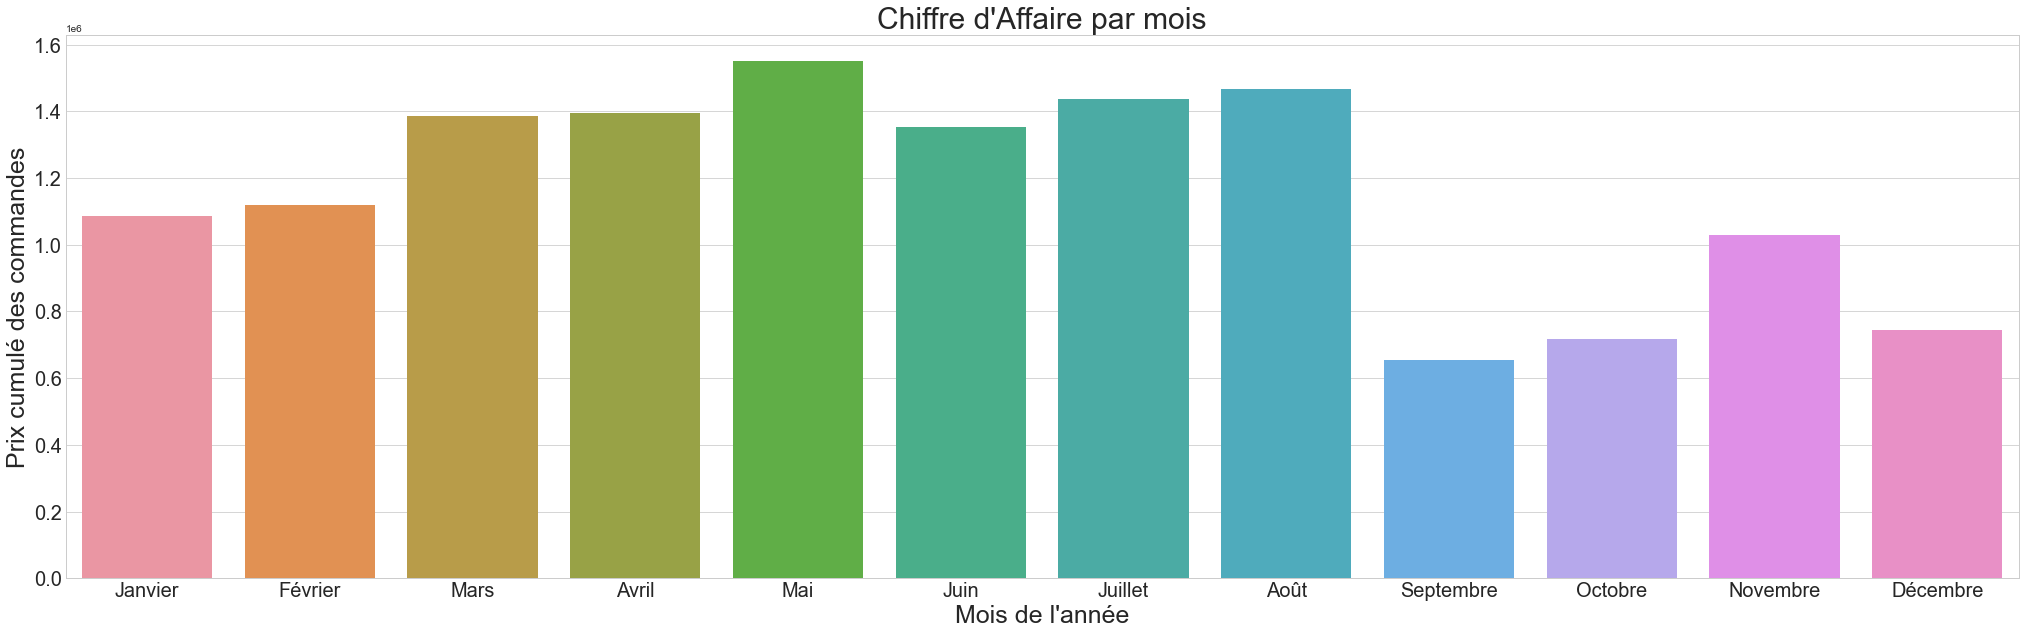

In [106]:
fig, ax = plt.subplots(figsize=(35, 10))
plt.title('Chiffre d\'Affaire par mois', fontsize=30)
sns.barplot(x=df_Chiffre_Affaire_Mois['Mois'],
            y=df_Chiffre_Affaire_Mois['Prix cumulé'])
plt.xlabel("Mois de l'année", fontsize=25)
plt.ylabel("Prix cumulé des commandes", fontsize=25)
ax.set_xticklabels(['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin',
                    'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre',
                    'Décembre'])
plt.tick_params(axis='both', labelsize=20)
plt.show()

In [107]:
df_Chiffre_Affaire['Année'] = pd.DatetimeIndex(
    df_Chiffre_Affaire['Date']).year
df_Chiffre_Affaire_Année = df_Chiffre_Affaire.groupby(
    by='Année').sum().reset_index()

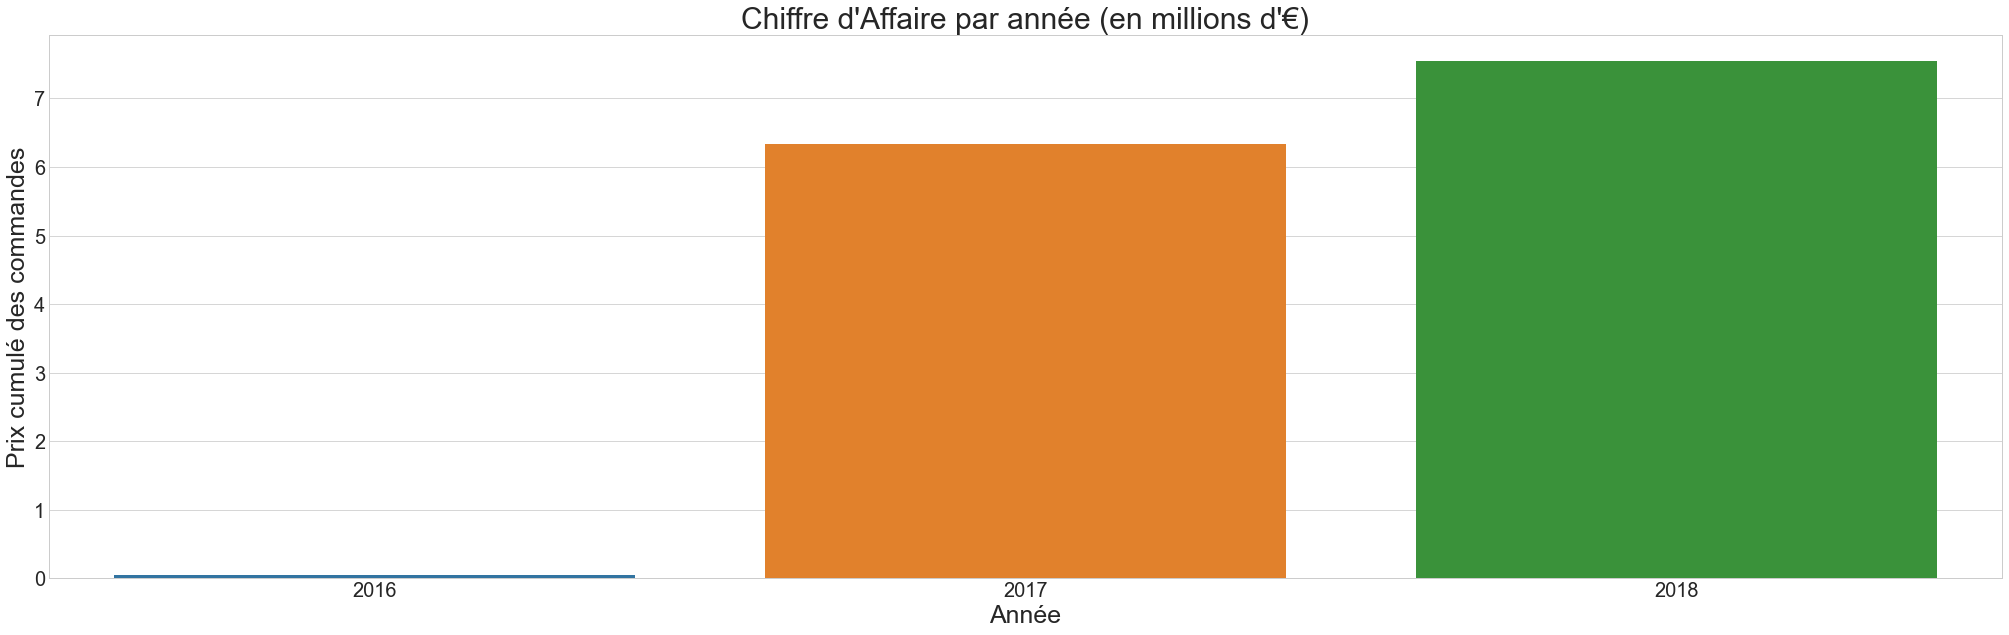

In [108]:
fig, ax = plt.subplots(figsize=(35, 10))
plt.title('Chiffre d\'Affaire par année (en millions d\'€)', fontsize=30)
sns.barplot(x=df_Chiffre_Affaire_Année['Année'],
            y=df_Chiffre_Affaire_Année['Prix cumulé']/1e6)
plt.xlabel("Année", fontsize=25)
plt.ylabel("Prix cumulé des commandes", fontsize=25)
plt.tick_params(axis='both', labelsize=20)
plt.show()

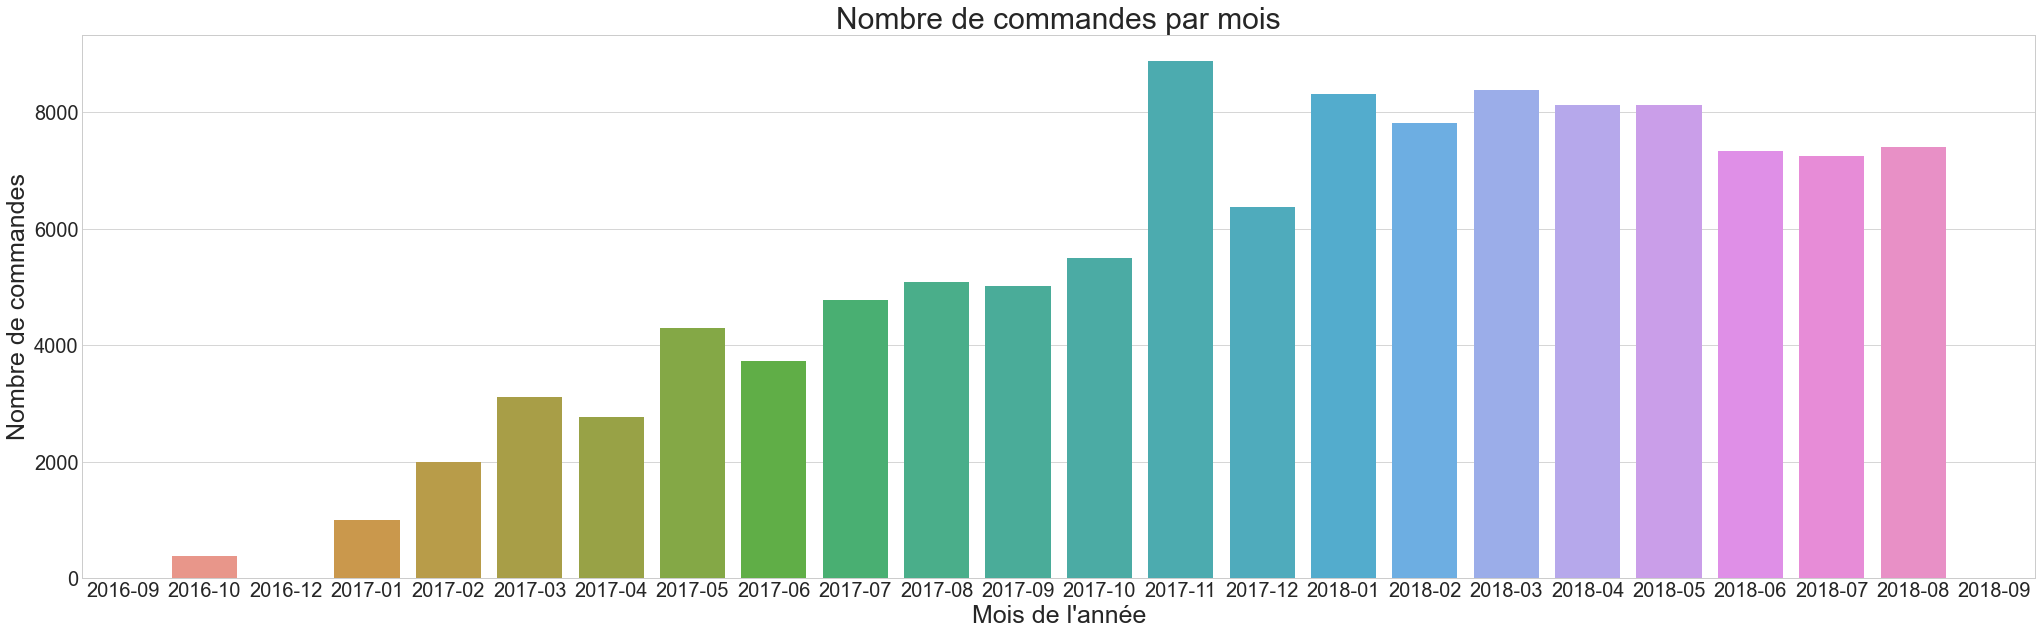

In [109]:
Dates_Commmande['Mois + Année'] = pd.DatetimeIndex(
    Dates_Commmande['date']).to_period('M')
Dates_Commmande = Dates_Commmande[['date', 'Mois + Année']]

df_groupby_Date = Dates_Commmande.groupby(by='Mois + Année')
df_sum_Date = df_groupby_Date.count().reset_index()
df_sum_Date.columns = ['Date', 'Nombre de commandes']

fig, ax = plt.subplots(figsize=(35, 10))
plt.title('Nombre de commandes par mois', fontsize=30)
sns.barplot(x=df_sum_Date['Date'],
            y=df_sum_Date['Nombre de commandes'],
            order=df_sum_Date['Date'])
plt.xlabel("Mois de l'année", fontsize=25)
plt.ylabel("Nombre de commandes", fontsize=25)
plt.tick_params(axis='both', labelsize=20)
plt.show()

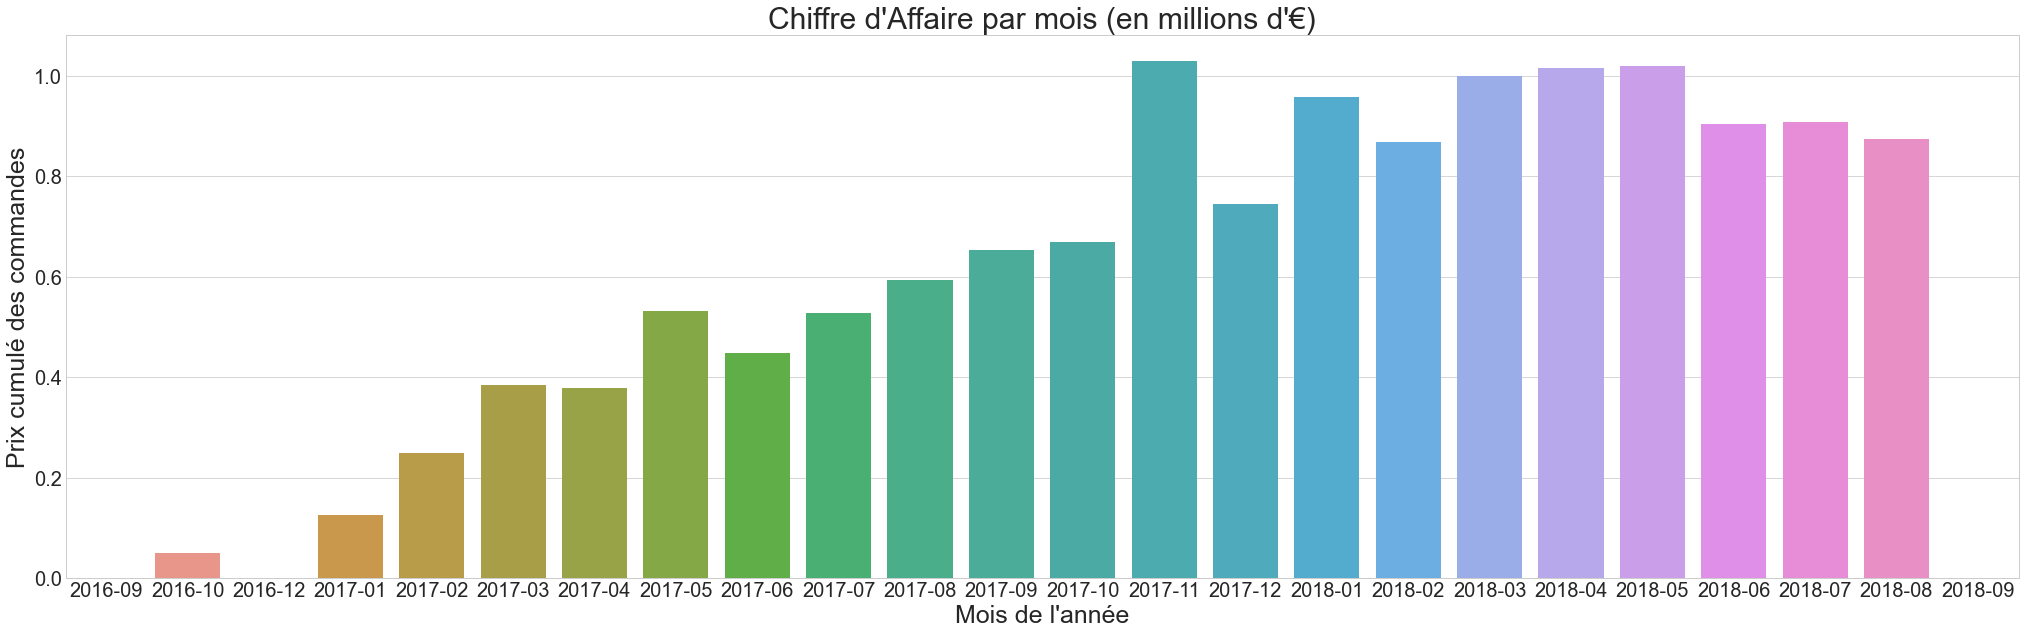

In [110]:
df_Chiffre_Affaire['Mois + Année'] = pd.DatetimeIndex(
    df_Chiffre_Affaire['Date']).to_period('M')
df_Chiffre_Affaire = df_Chiffre_Affaire[['Prix cumulé', 'Mois + Année']]

df_groupby_ = df_Chiffre_Affaire.groupby(by='Mois + Année')
df_sum_ = df_groupby_.sum().reset_index()

fig, ax = plt.subplots(figsize=(35, 10))
plt.title('Chiffre d\'Affaire par mois (en millions d\'€)', fontsize=30)
sns.barplot(x=df_sum_['Mois + Année'],
            y=df_sum_['Prix cumulé']/1e6)
plt.xlabel("Mois de l'année", fontsize=25)
plt.ylabel("Prix cumulé des commandes", fontsize=25)
plt.tick_params(axis='both', labelsize=20)
plt.show()

In [111]:
df_Objets = df_Commandes.groupby(['order_id']).agg({'order_item_id': 'count'})
df_Objets.describe()

order_item_id
count   96516.000000
mean        1.197822
std         0.748938
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        63.000000

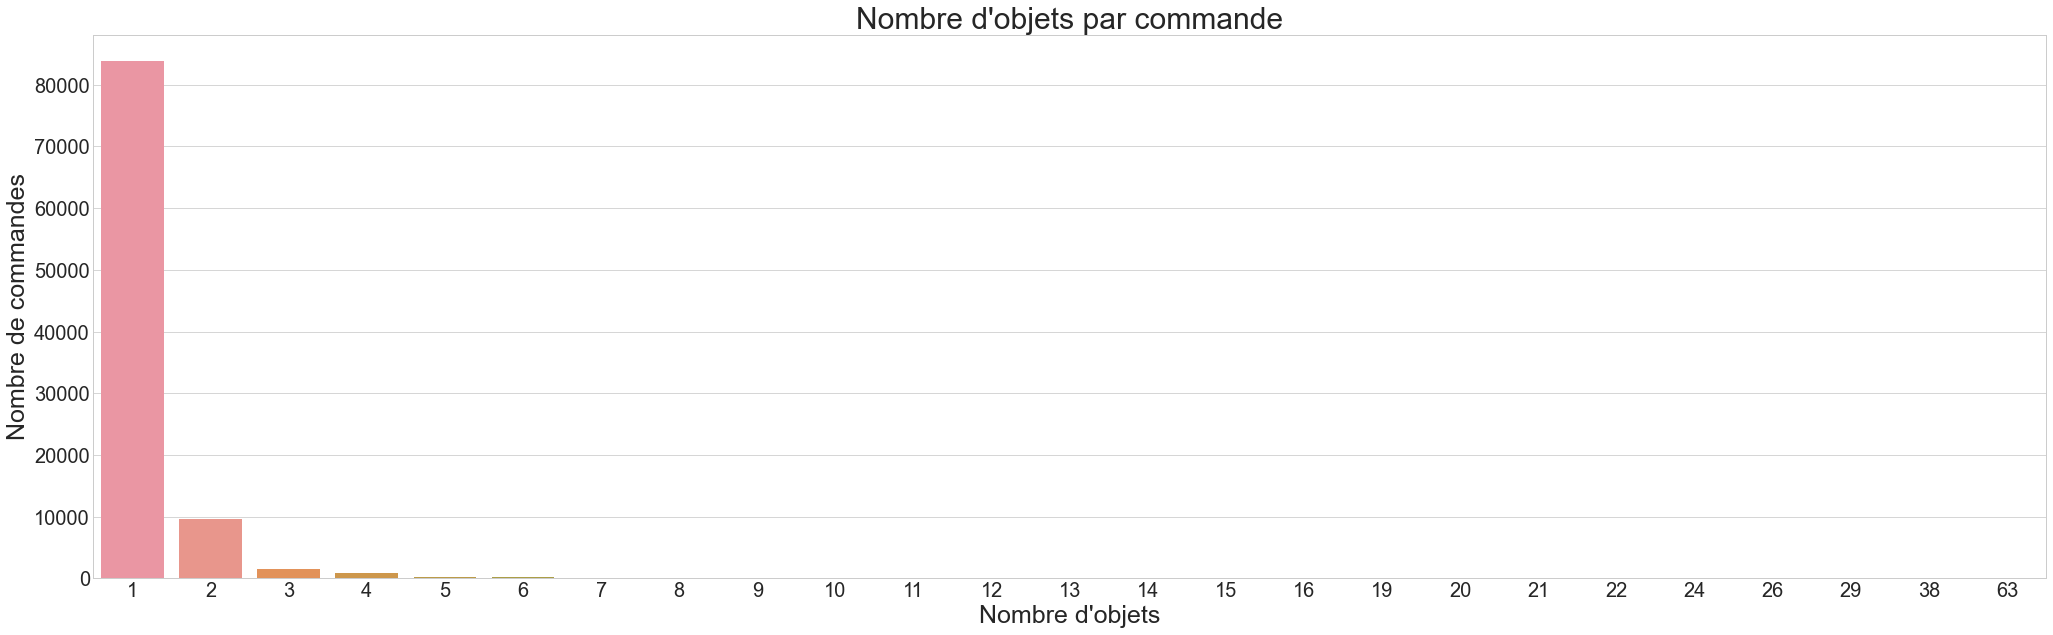

In [112]:
plt.figure(figsize=(35, 10))
plt.title('Nombre d\'objets par commande', fontsize=30)
sns.barplot(x=df_Objets['order_item_id'].value_counts().index,
            y=df_Objets['order_item_id'].value_counts().values)
plt.xlabel('Nombre d\'objets', fontsize=25)
plt.ylabel('Nombre de commandes', fontsize=25)
plt.tick_params(axis='both', labelsize=20)
plt.show()

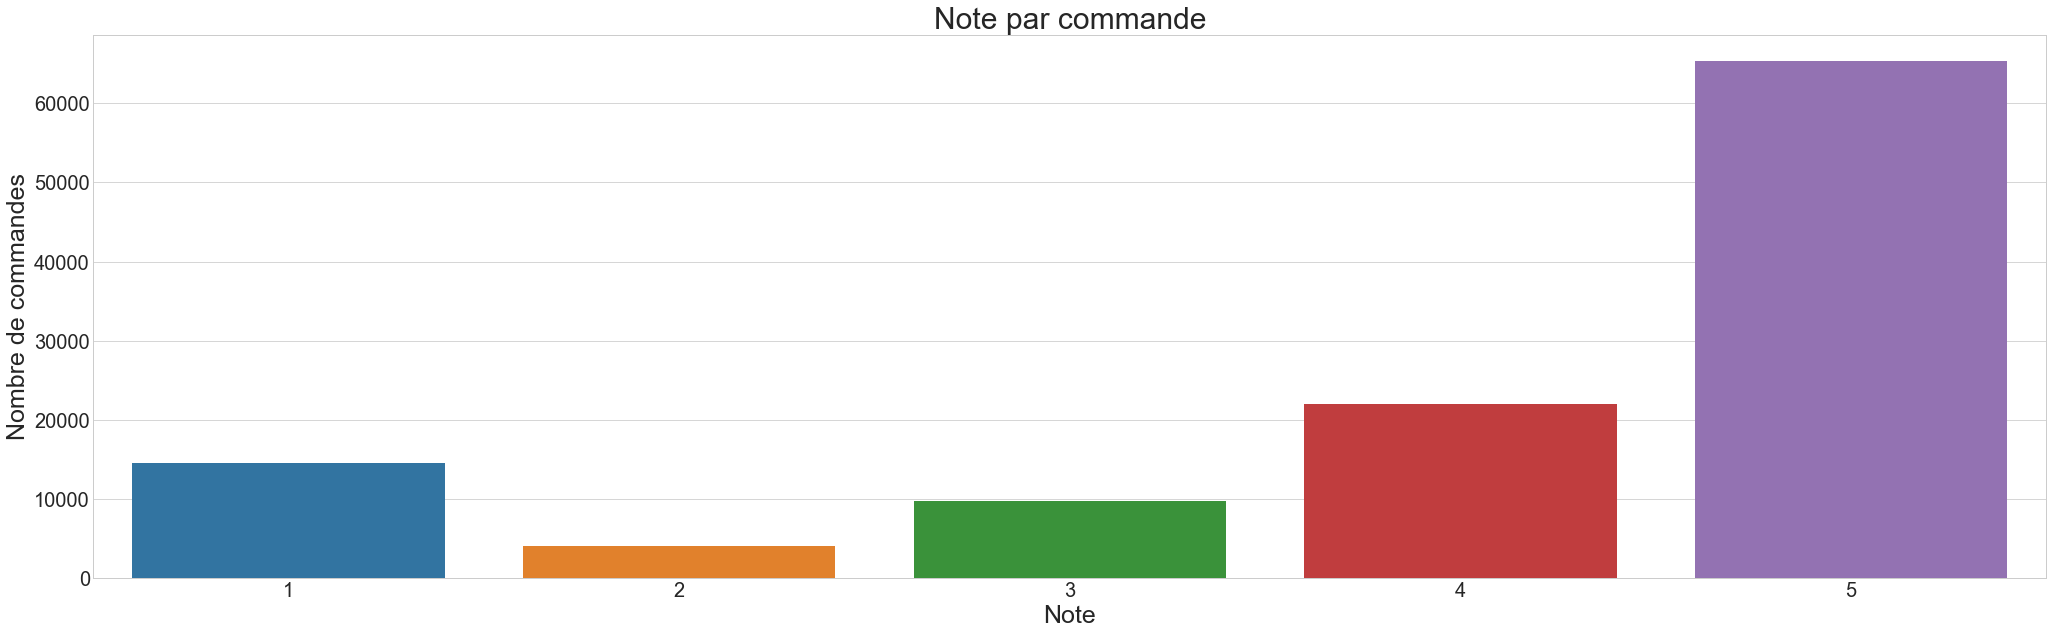

In [113]:
plt.figure(figsize=(35, 10))
plt.title('Note par commande', fontsize=30)
sns.barplot(x=df_Commandes['review_score'].value_counts().index,
            y=df_Commandes['review_score'].value_counts().values)
plt.xlabel('Note', fontsize=25)
plt.ylabel('Nombre de commandes', fontsize=25)
plt.tick_params(axis='both', labelsize=20)
plt.show()

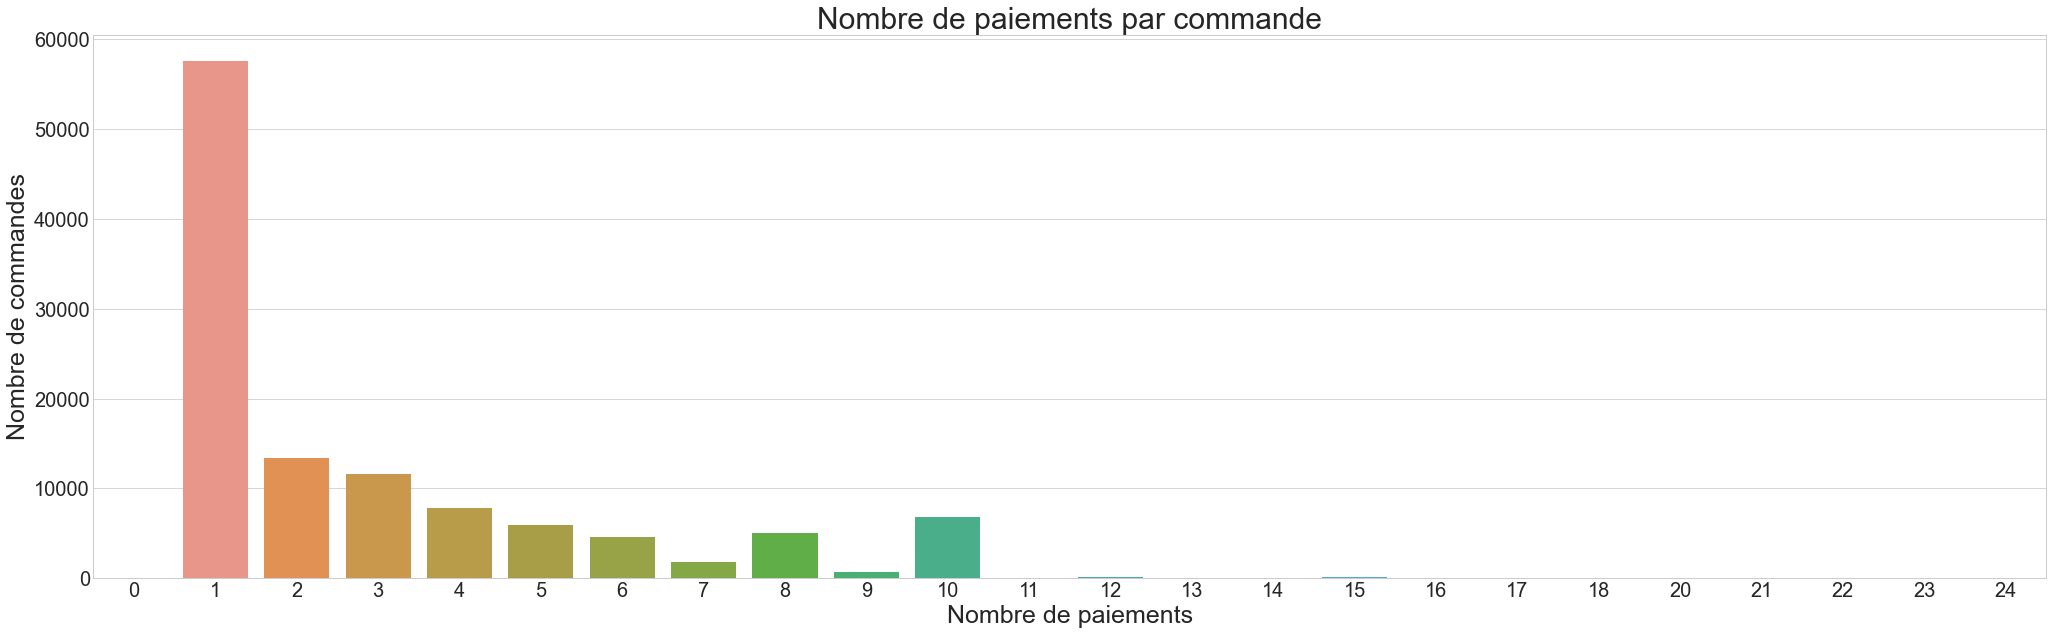

In [114]:
plt.figure(figsize=(35, 10))
plt.title('Nombre de paiements par commande', fontsize=30)
sns.barplot(x=df_Commandes['Nombre de paiements'].value_counts().index,
            y=df_Commandes['Nombre de paiements'].value_counts().values)
plt.xlabel('Nombre de paiements', fontsize=25)
plt.ylabel('Nombre de commandes', fontsize=25)
plt.tick_params(axis='both', labelsize=20)
plt.show()

Regardons le nombre de commandes effectuées par moyen de paiement. Regardons pour cela le jeu de données ```df_payments```.

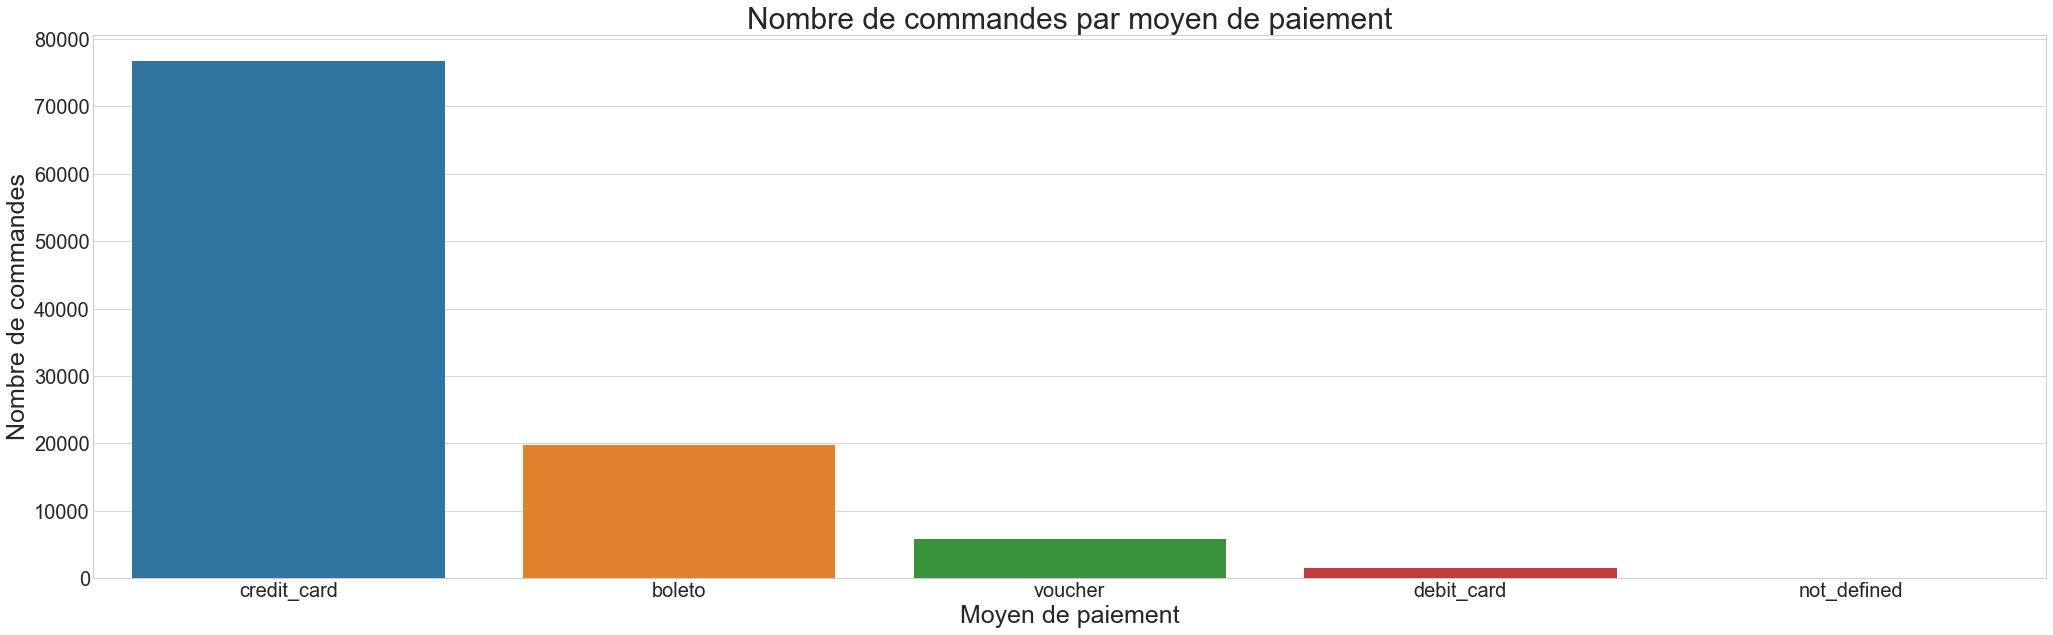

In [115]:
plt.figure(figsize=(35, 10))
plt.title('Nombre de commandes par moyen de paiement', fontsize=30)
sns.barplot(x=df_payments['payment_type'].value_counts().index,
            y=df_payments['payment_type'].value_counts().values)
plt.xlabel("Moyen de paiement", fontsize=25)
plt.ylabel("Nombre de commandes", fontsize=25)
plt.tick_params(axis='both', labelsize=20)
plt.show()

[Retour au sommaire](#Sommaire)

### Jeu de données des clients <a class="anchor" id="Partie3_3"></a>

In [116]:
df_Clients.head()

Date de la commande  price payment_type                customer_unique_id  \
0 2017-10-02 10:56:33  29.99  credit_card  7c396fd4830fd04220f754e42b4e5bff   
1 2017-10-02 10:56:33  29.99      voucher  7c396fd4830fd04220f754e42b4e5bff   
2 2017-09-04 11:26:38  35.39  credit_card  7c396fd4830fd04220f754e42b4e5bff   
3 2017-08-15 18:29:31  29.99  credit_card  3a51803cc0d012c3b5dc8b7528cb05f7   
4 2017-08-02 18:24:47  29.99  credit_card  ef0996a1a279c26e7ecbd737be23d235   

   Autres  Beauté_Santé  Loisirs  Maison  Mobilier  Mode  ...  Montant Min  \
0       0             1        0       1         0     0  ...        29.99   
1       0             1        0       1         0     0  ...        29.99   
2       0             1        0       1         0     0  ...        29.99   
3       0             0        0       1         0     0  ...        29.99   
4       0             0        0       1         0     0  ...        29.99   

   Montant Max  Nombre de commandes  Note Moyenne  Nombre d'objets Max  \
0        35.39                    2          4.25                    1   
1        35.39                    2          4.25                    1   
2        35.39                    2          4.25                    1   
3        29.99                    1          4.00                    1   
4        29.99                    1          5.00                    1   

   Nombre d'objets Total  Fréquence  Récence  Montant Moyen  Montant  
0                      2       13.0    335.0          31.79    95.37  
1                      2       13.0    335.0          31.79    95.37  
2                      2       13.0    335.0          31.79    95.37  
3                      1        0.0    383.0          29.99    29.99  
4                      1        0.0    396.0          29.99    29.99  

[5 rows x 28 columns]

In [117]:
df_Clients.shape

(101233, 28)

In [118]:
df_Clients.describe()

price         Autres   Beauté_Santé        Loisirs  \
count  101233.000000  101233.000000  101233.000000  101233.000000   
mean      124.846321       0.147403       0.156856       0.142424   
std       187.850015       0.354508       0.363667       0.349486   
min         0.850000       0.000000       0.000000       0.000000   
25%        41.310000       0.000000       0.000000       0.000000   
50%        79.000000       0.000000       0.000000       0.000000   
75%       139.500000       0.000000       0.000000       0.000000   
max      6735.000000       1.000000       1.000000       1.000000   

              Maison       Mobilier           Mode  Nourriture_Boissons  \
count  101233.000000  101233.000000  101233.000000        101233.000000   
mean        0.232730       0.096915       0.097745             0.010639   
std         0.422574       0.295844       0.296971             0.102595   
min         0.000000       0.000000       0.000000             0.000000   
25%         0.000000       0.000000       0.000000             0.000000   
50%         0.000000       0.000000       0.000000             0.000000   
75%         0.000000       0.000000       0.000000             0.000000   
max         1.000000       1.000000       1.000000             1.000000   

        Technologies  Nombre de paiements Max  ...    Montant Min  \
count  101233.000000            101233.000000  ...  101233.000000   
mean        0.160580                 2.951498  ...     121.217327   
std         0.367145                 2.743993  ...     185.336378   
min         0.000000                 0.000000  ...       0.850000   
25%         0.000000                 1.000000  ...      39.900000   
50%         0.000000                 2.000000  ...      74.900000   
75%         0.000000                 4.000000  ...     134.900000   
max         1.000000                24.000000  ...    6735.000000   

         Montant Max  Nombre de commandes   Note Moyenne  Nombre d'objets Max  \
count  101233.000000        101233.000000  101233.000000        101233.000000   
mean      128.797448             1.071261       4.084282             1.187962   
std       190.609199             0.362846       1.334799             0.627080   
min         0.850000             1.000000       1.000000             1.000000   
25%        44.900000             1.000000       4.000000             1.000000   
50%        79.990000             1.000000       5.000000             1.000000   
75%       144.000000             1.000000       5.000000             1.000000   
max      6735.000000            15.000000       5.000000            21.000000   

       Nombre d'objets Total      Fréquence        Récence  Montant Moyen  \
count          101233.000000  101233.000000  101233.000000  101233.000000   
mean                1.455553       2.611935     241.249000     124.846321   
std                 1.879348      16.949248     152.987922     186.341591   
min                 1.000000       0.000000       0.000000       0.850000   
25%                 1.000000       0.000000     117.000000      43.200000   
50%                 1.000000       0.000000     222.000000      79.000000   
75%                 1.000000       0.000000     350.000000     139.000000   
max                77.000000     304.000000     728.000000    6735.000000   

             Montant  
count  101233.000000  
mean      144.035778  
std       214.066245  
min         0.850000  
25%        47.880000  
50%        89.900000  
75%       159.850000  
max      7388.000000  

[8 rows x 25 columns]

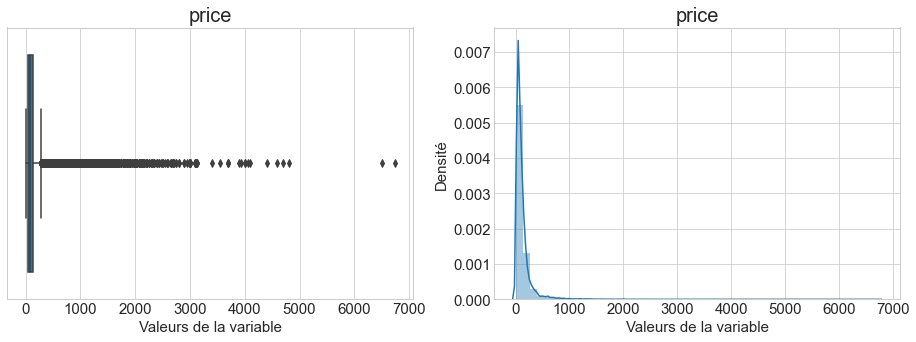

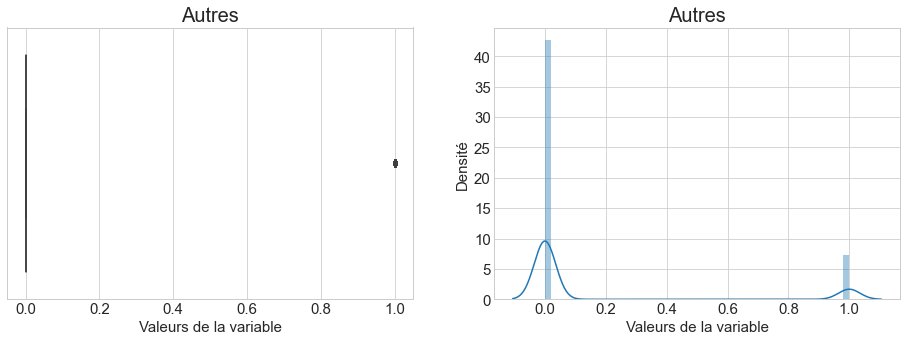

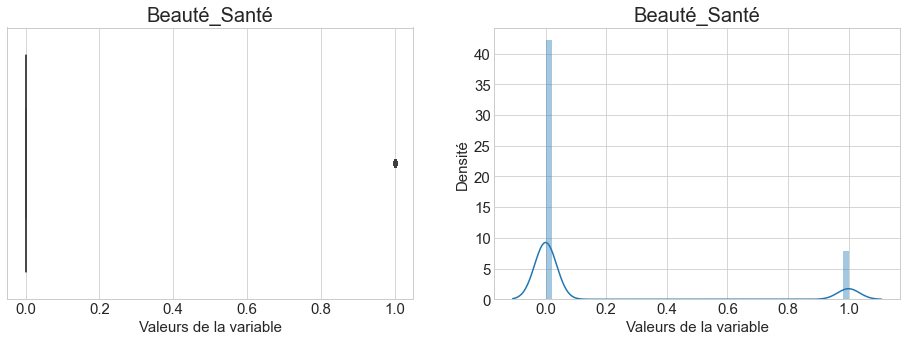

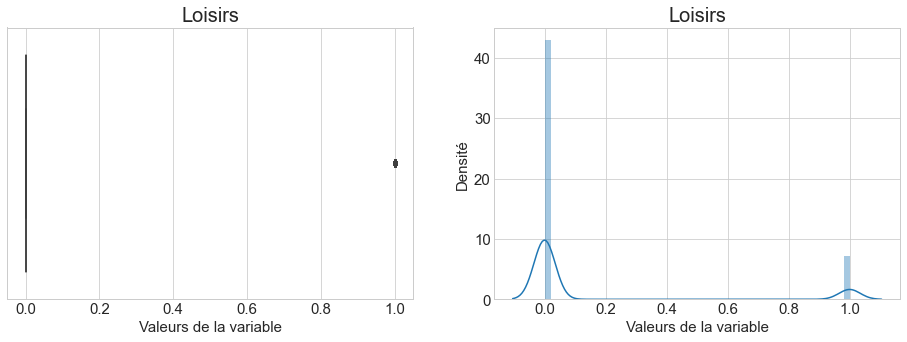

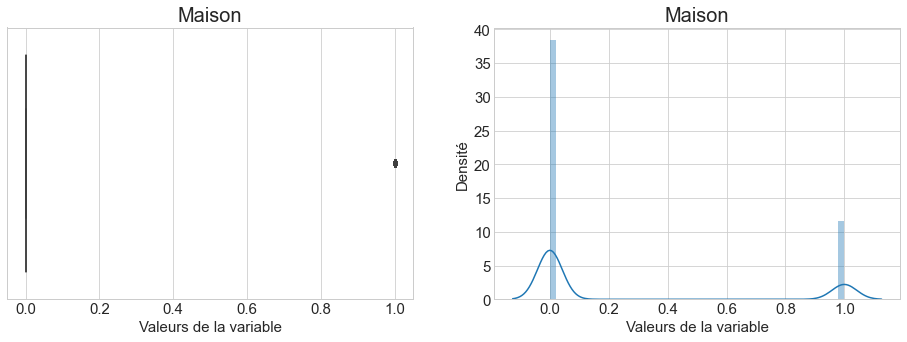

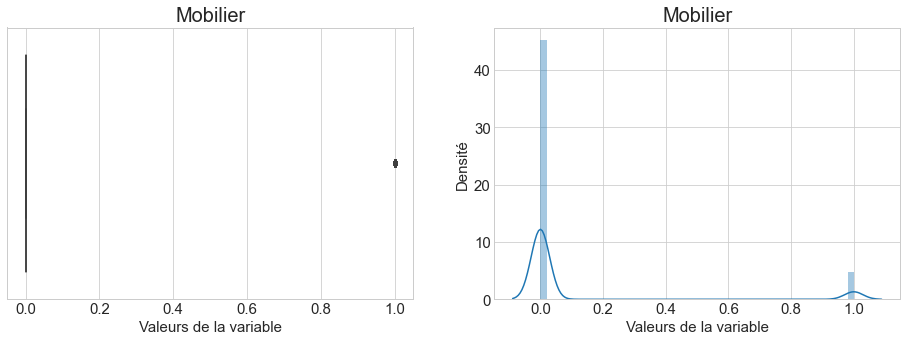

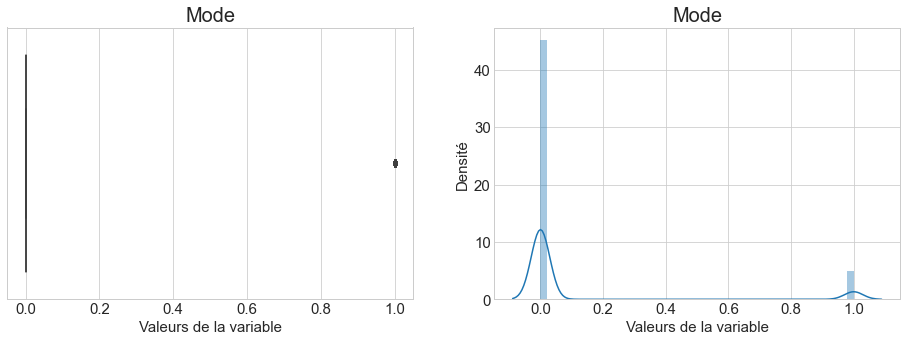

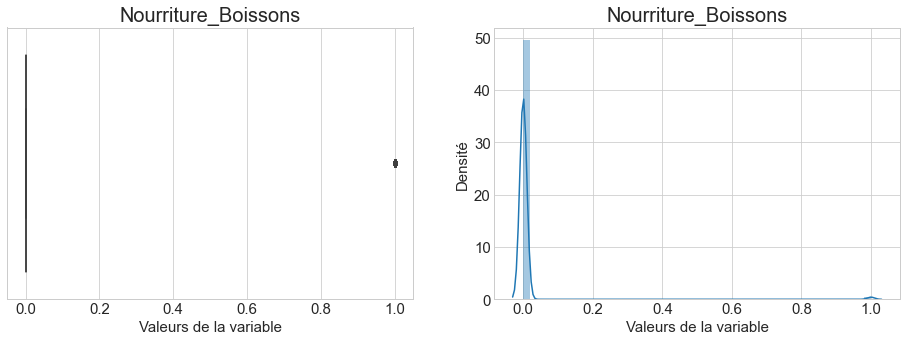

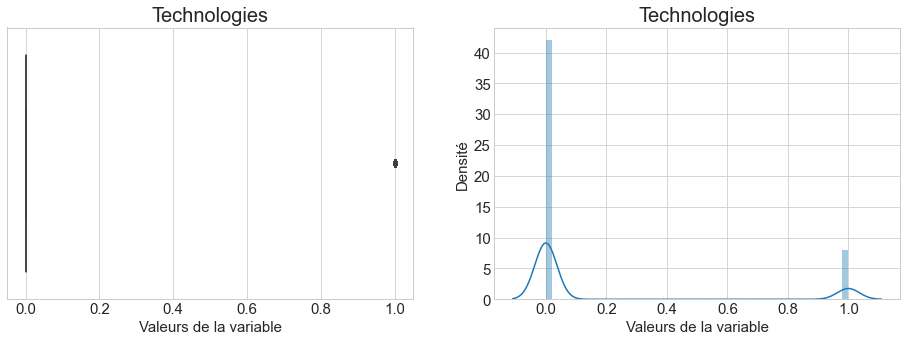

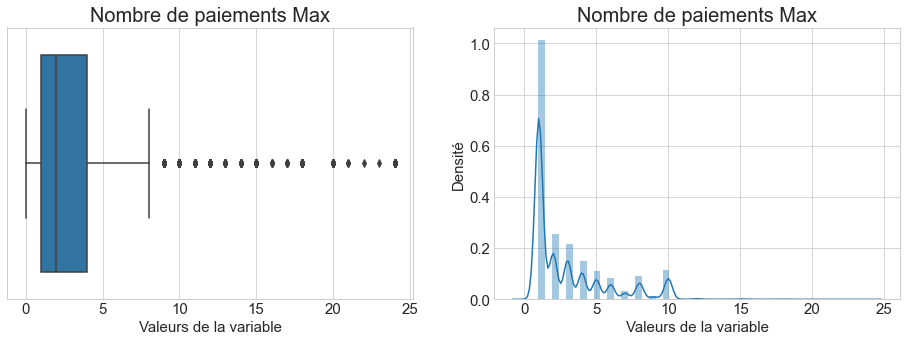

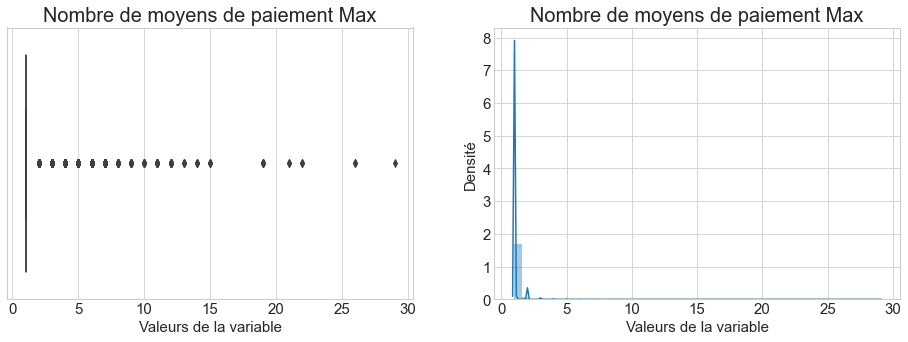

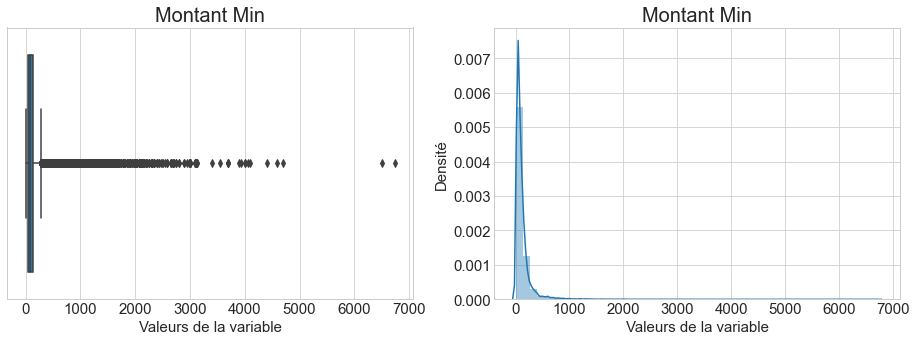

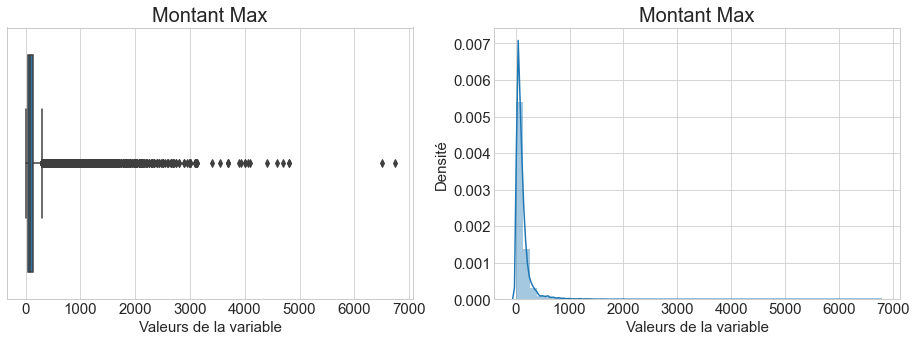

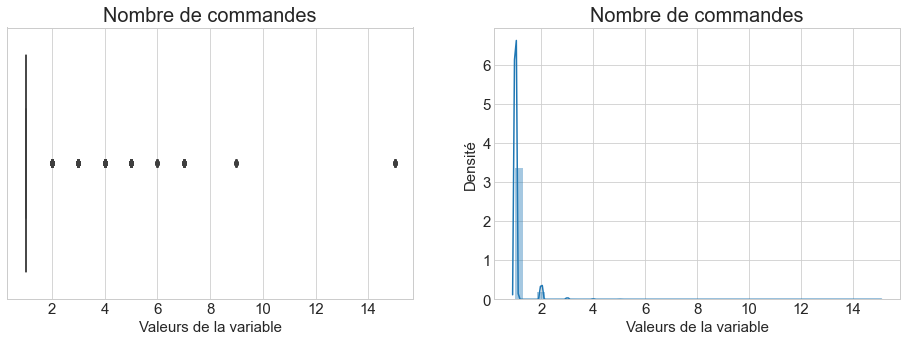

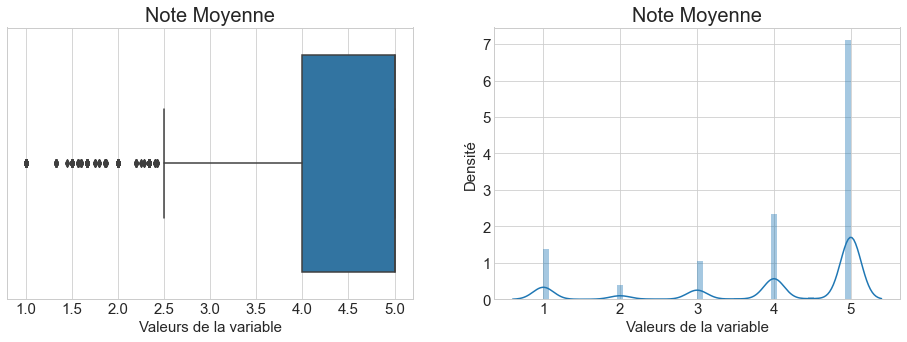

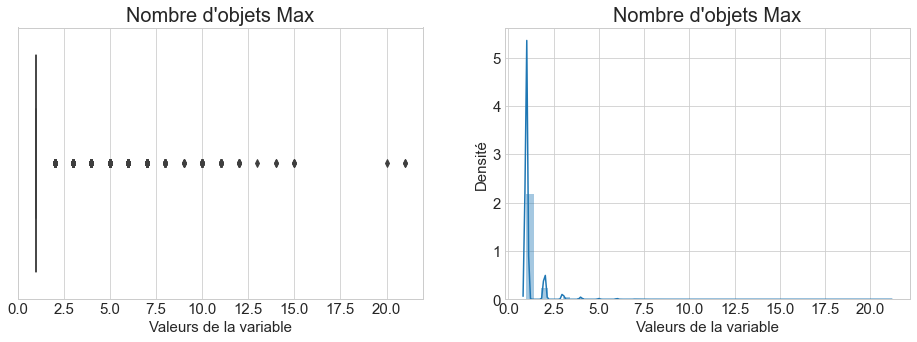

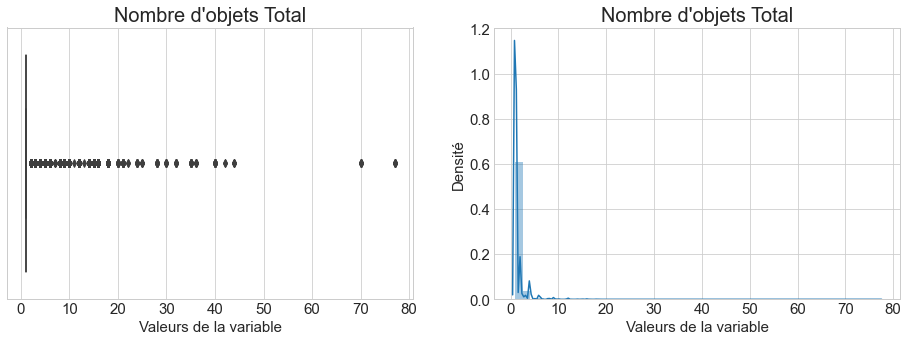

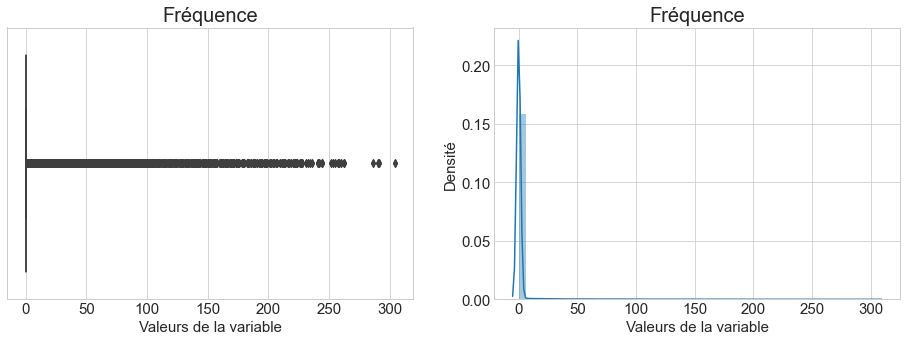

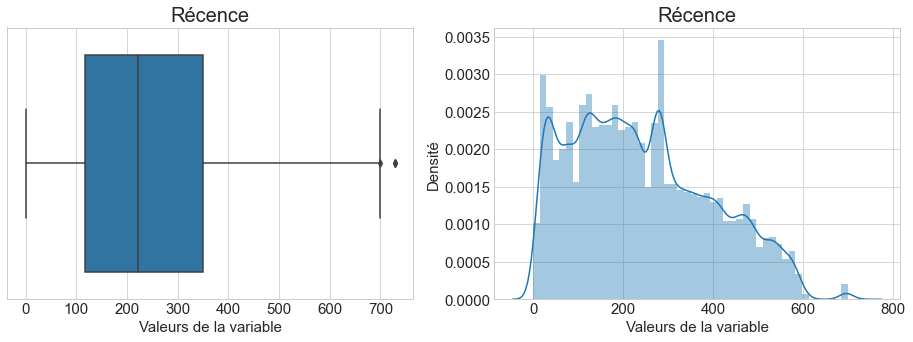

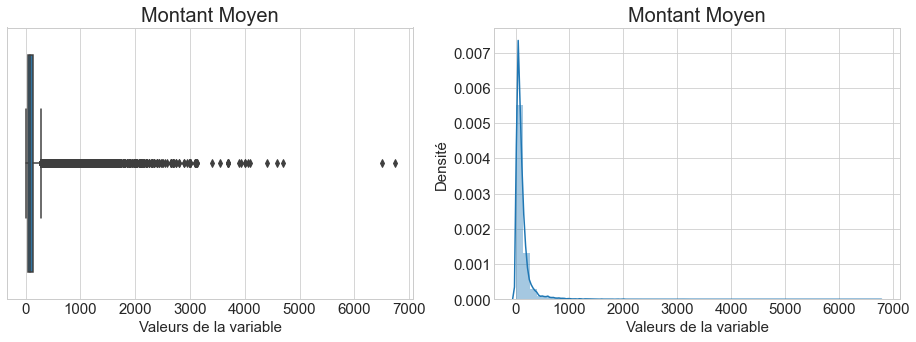

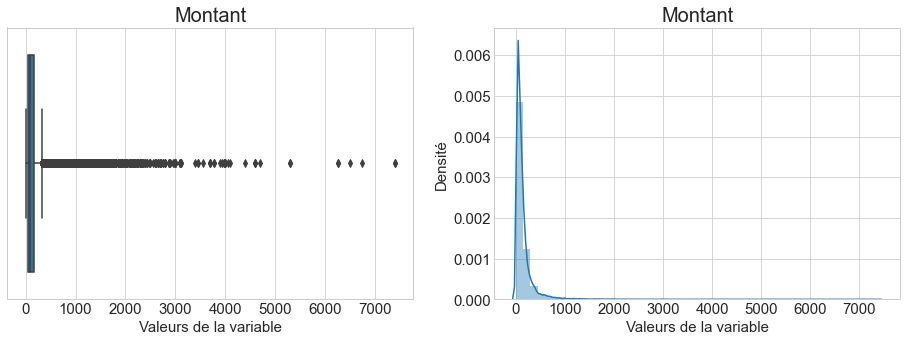

In [119]:
for col in df_Clients.select_dtypes(include=['float64', 'int64']):
    decrit_variable(df_Clients, col)

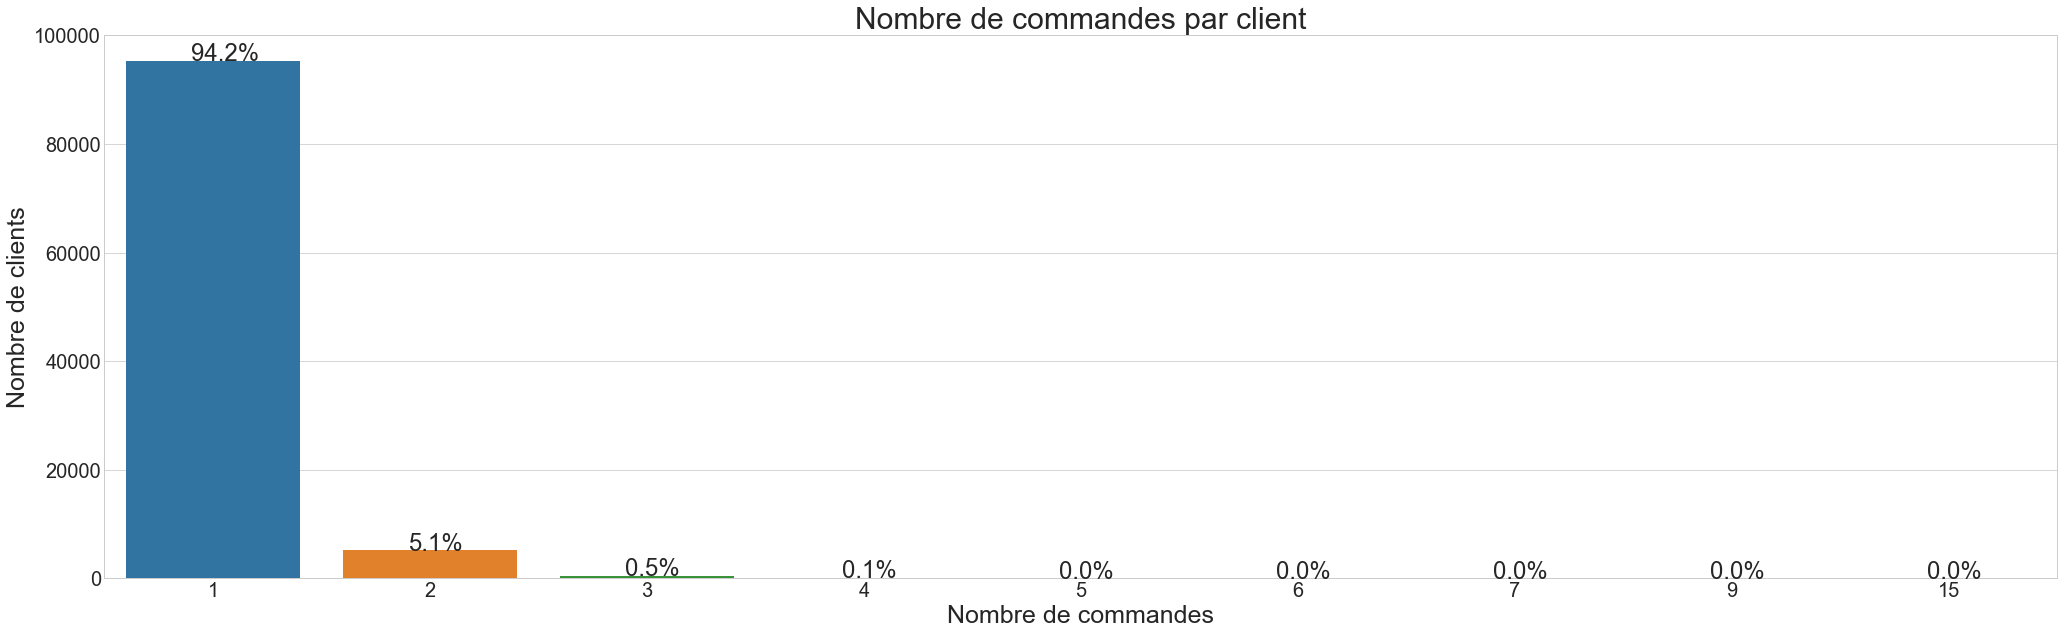

In [120]:
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.1
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size=24)
    plt.show()


plt.figure(figsize=(35, 10))
plt.title('Nombre de commandes par client', fontsize=30)
ax = sns.barplot(x=df_Clients['Nombre de commandes'].value_counts().index,
                 y=df_Clients['Nombre de commandes'].value_counts().values)
plt.xlabel("Nombre de commandes", fontsize=25)
plt.ylabel("Nombre de clients", fontsize=25)
plt.tick_params(axis='both', labelsize=20)

without_hue(ax, df_Clients['Nombre de commandes'])

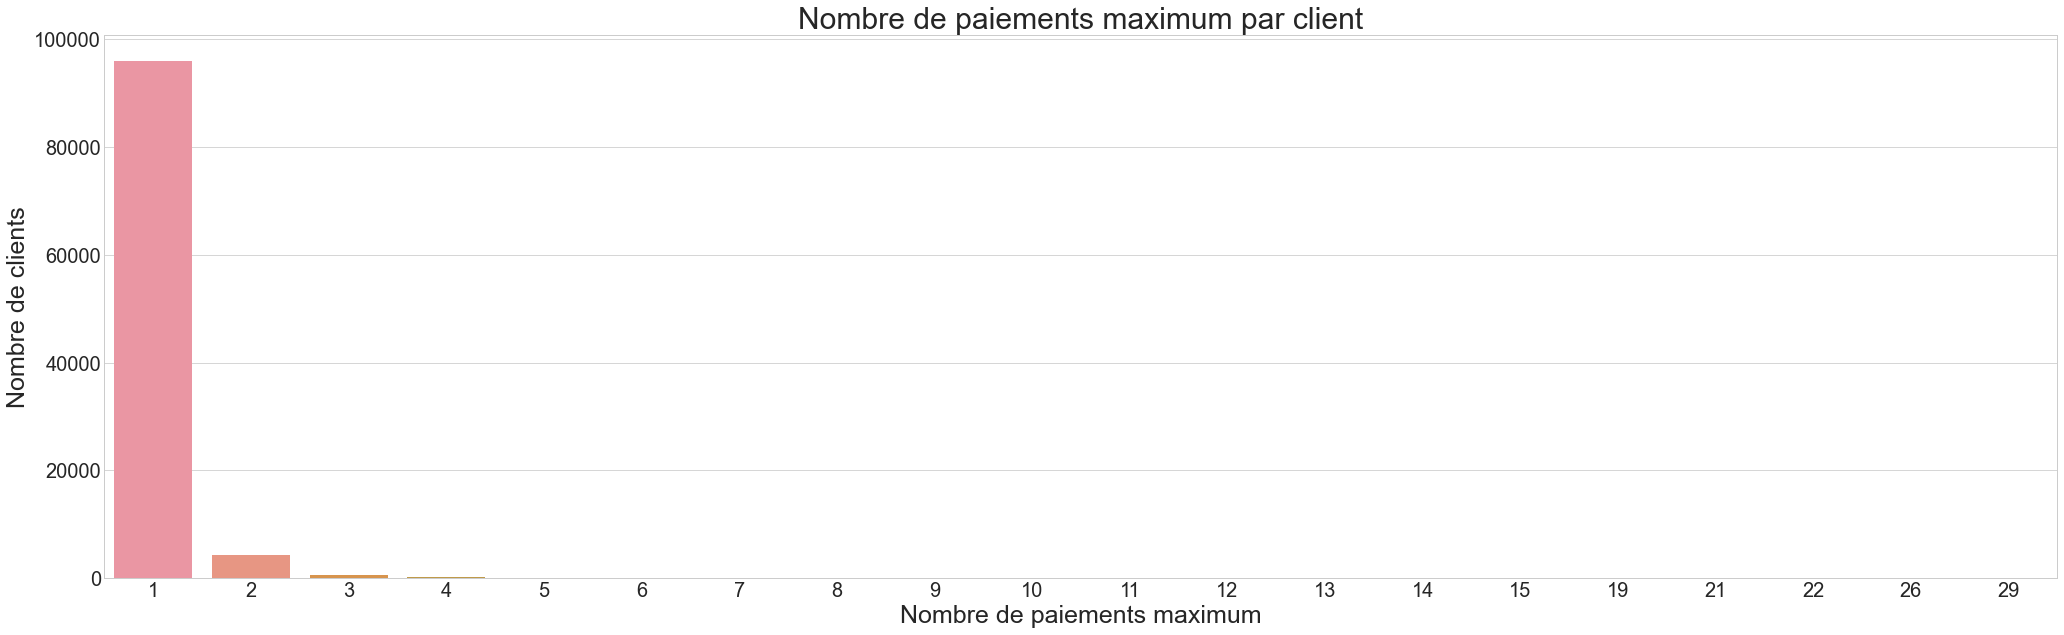

In [121]:
plt.figure(figsize=(35, 10))
plt.title('Nombre de paiements maximum par client', fontsize=30)
sns.barplot(x=df_Clients[
    'Nombre de moyens de paiement Max'].value_counts().index,
            y=df_Clients[
                'Nombre de moyens de paiement Max'].value_counts().values)
plt.xlabel('Nombre de paiements maximum', fontsize=25)
plt.ylabel('Nombre de clients', fontsize=25)
plt.tick_params(axis='both', labelsize=20)
plt.show()

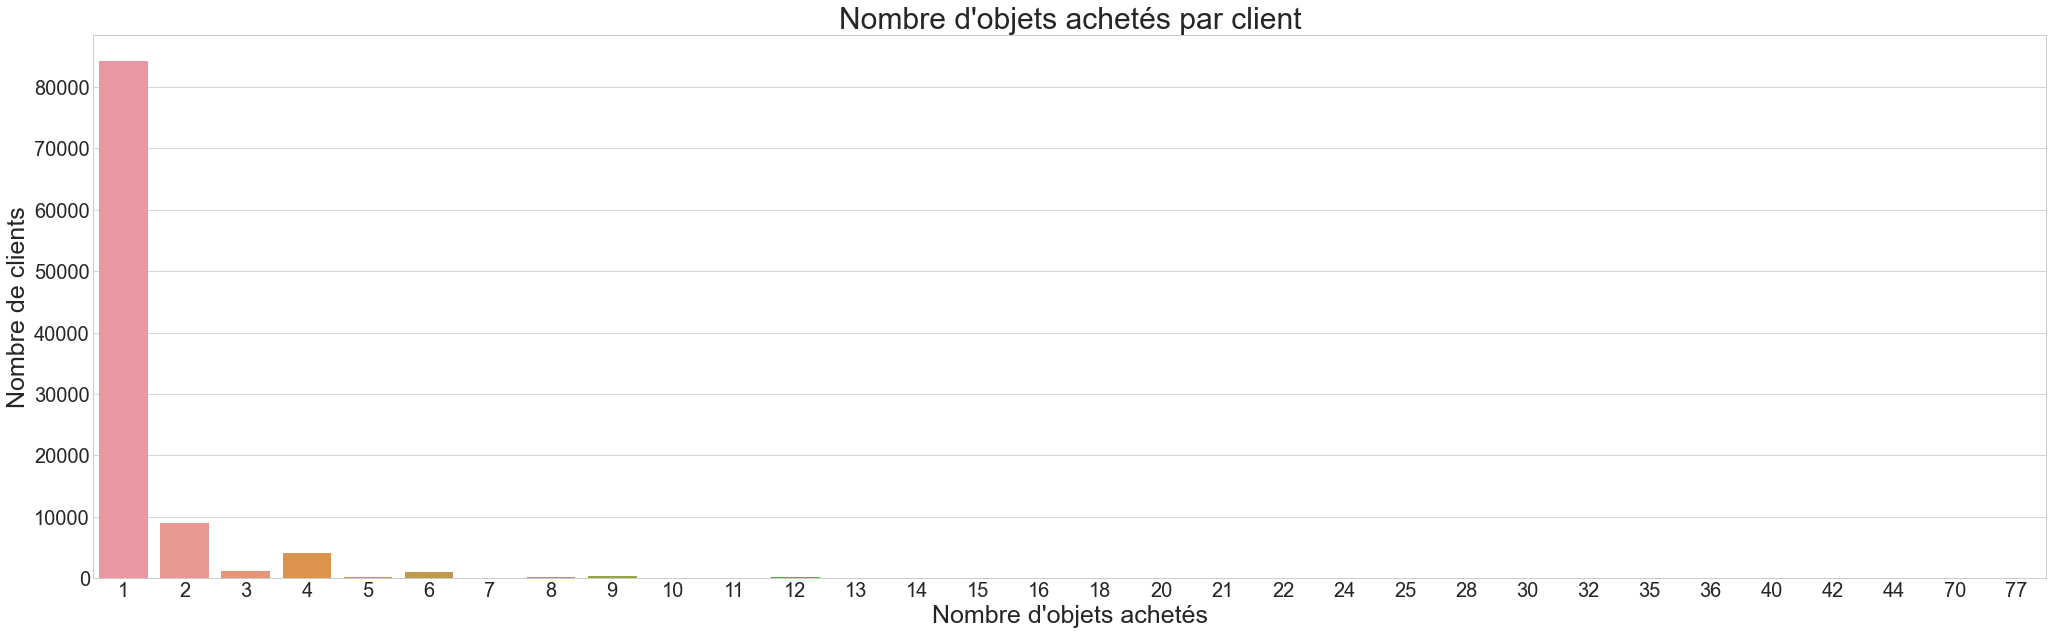

In [122]:
plt.figure(figsize=(35, 10))
plt.title('Nombre d\'objets achetés par client', fontsize=30)
sns.barplot(x=df_Clients['Nombre d\'objets Total'].value_counts().index,
            y=df_Clients['Nombre d\'objets Total'].value_counts().values)
plt.xlabel('Nombre d\'objets achetés', fontsize=25)
plt.ylabel('Nombre de clients', fontsize=25)
plt.tick_params(axis='both', labelsize=20)
plt.show()

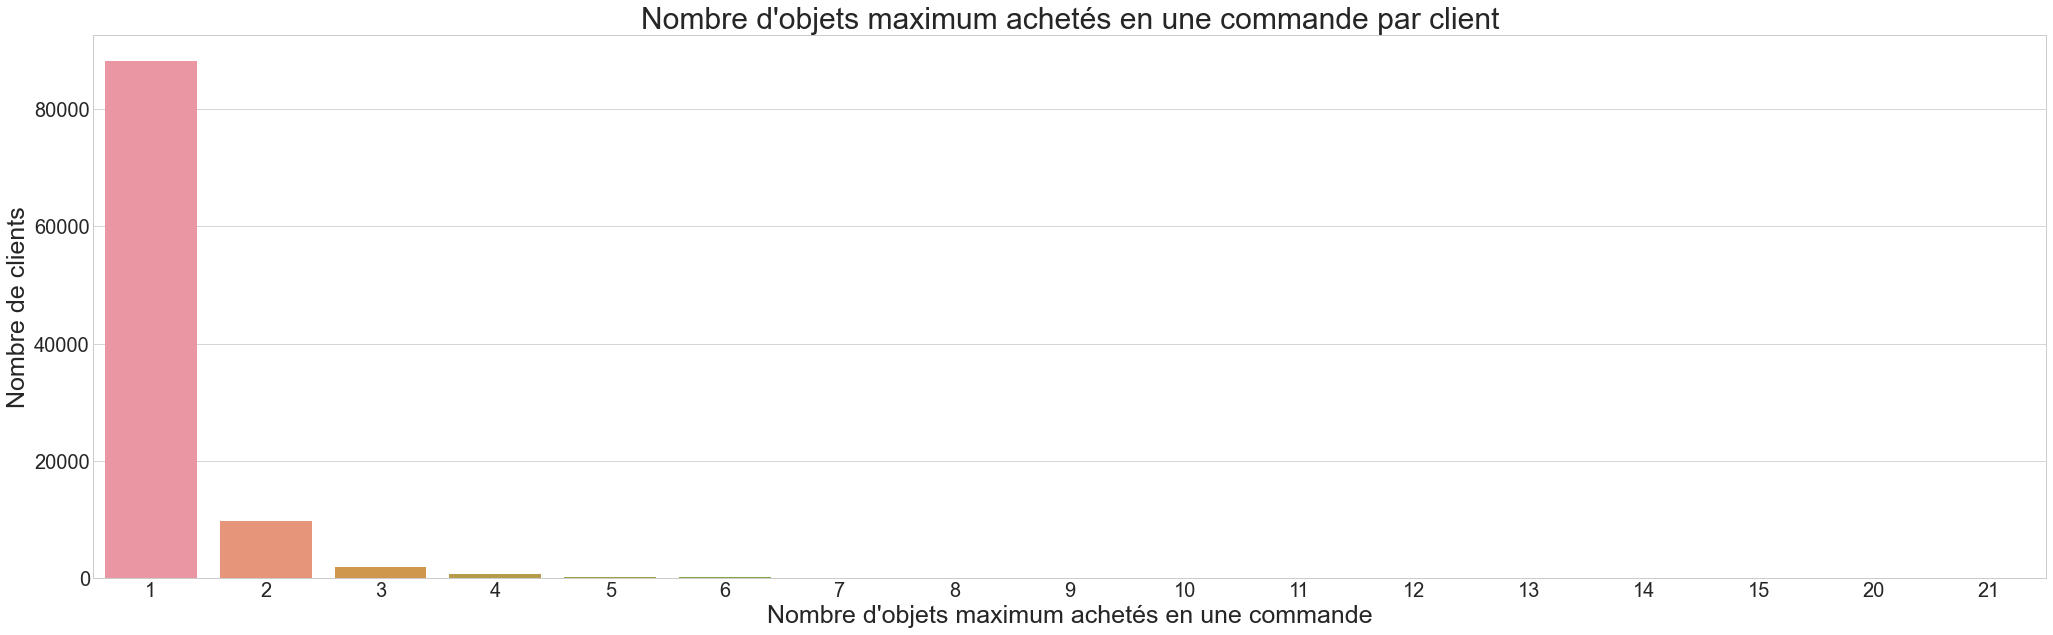

In [123]:
plt.figure(figsize=(35, 10))
plt.title('Nombre d\'objets maximum achetés en une commande par client',
          fontsize=30)
sns.barplot(x=df_Clients['Nombre d\'objets Max'].value_counts().index,
            y=df_Clients['Nombre d\'objets Max'].value_counts().values)
plt.xlabel('Nombre d\'objets maximum achetés en une commande', fontsize=25)
plt.ylabel('Nombre de clients', fontsize=25)
plt.tick_params(axis='both', labelsize=20)
plt.show()

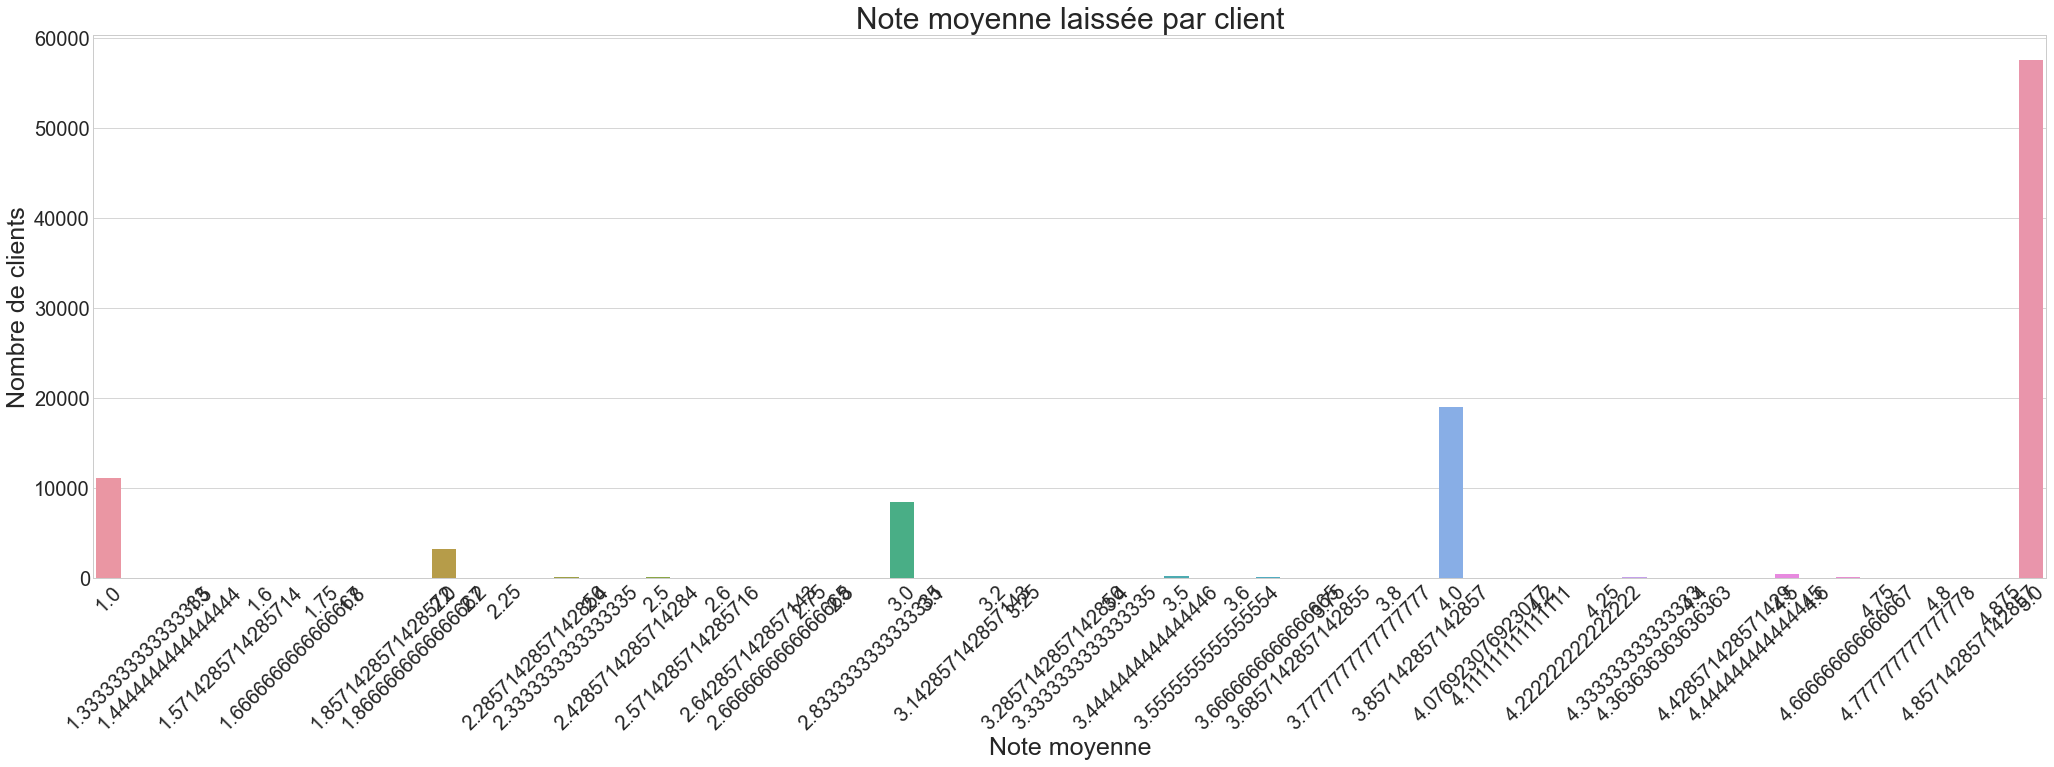

In [124]:
plt.figure(figsize=(35, 10))
plt.title('Note moyenne laissée par client', fontsize=30)
sns.barplot(x=df_Clients['Note Moyenne'].value_counts().index,
            y=df_Clients['Note Moyenne'].value_counts().values)
plt.xlabel('Note moyenne', fontsize=25)
plt.ylabel('Nombre de clients', fontsize=25)
plt.tick_params(axis='both', labelsize=20)
plt.xticks(rotation=45)
plt.show()

In [125]:
df_moyen_paiement = df_orders.merge(df_customers, on='customer_id')
df_moyen_paiement = df_moyen_paiement.merge(df_payments, on='order_id')
df_moyen_paiement = df_moyen_paiement[['customer_unique_id', 'payment_type']]
df_moyen_paiement.head()

customer_unique_id payment_type
0  7c396fd4830fd04220f754e42b4e5bff  credit_card
1  7c396fd4830fd04220f754e42b4e5bff      voucher
2  7c396fd4830fd04220f754e42b4e5bff      voucher
3  af07308b275d755c9edb36a90c618231       boleto
4  3a653a41f6f9fc3d2a113cf8398680e8  credit_card

In [126]:
Total = pd.crosstab(df_moyen_paiement['payment_type'],
                    df_moyen_paiement['customer_unique_id'].count(),
                    margins=False)
Total.columns = ['Total']
Total.head()

Total
payment_type       
boleto        19784
credit_card   76795
debit_card     1529
not_defined       3
voucher        5775

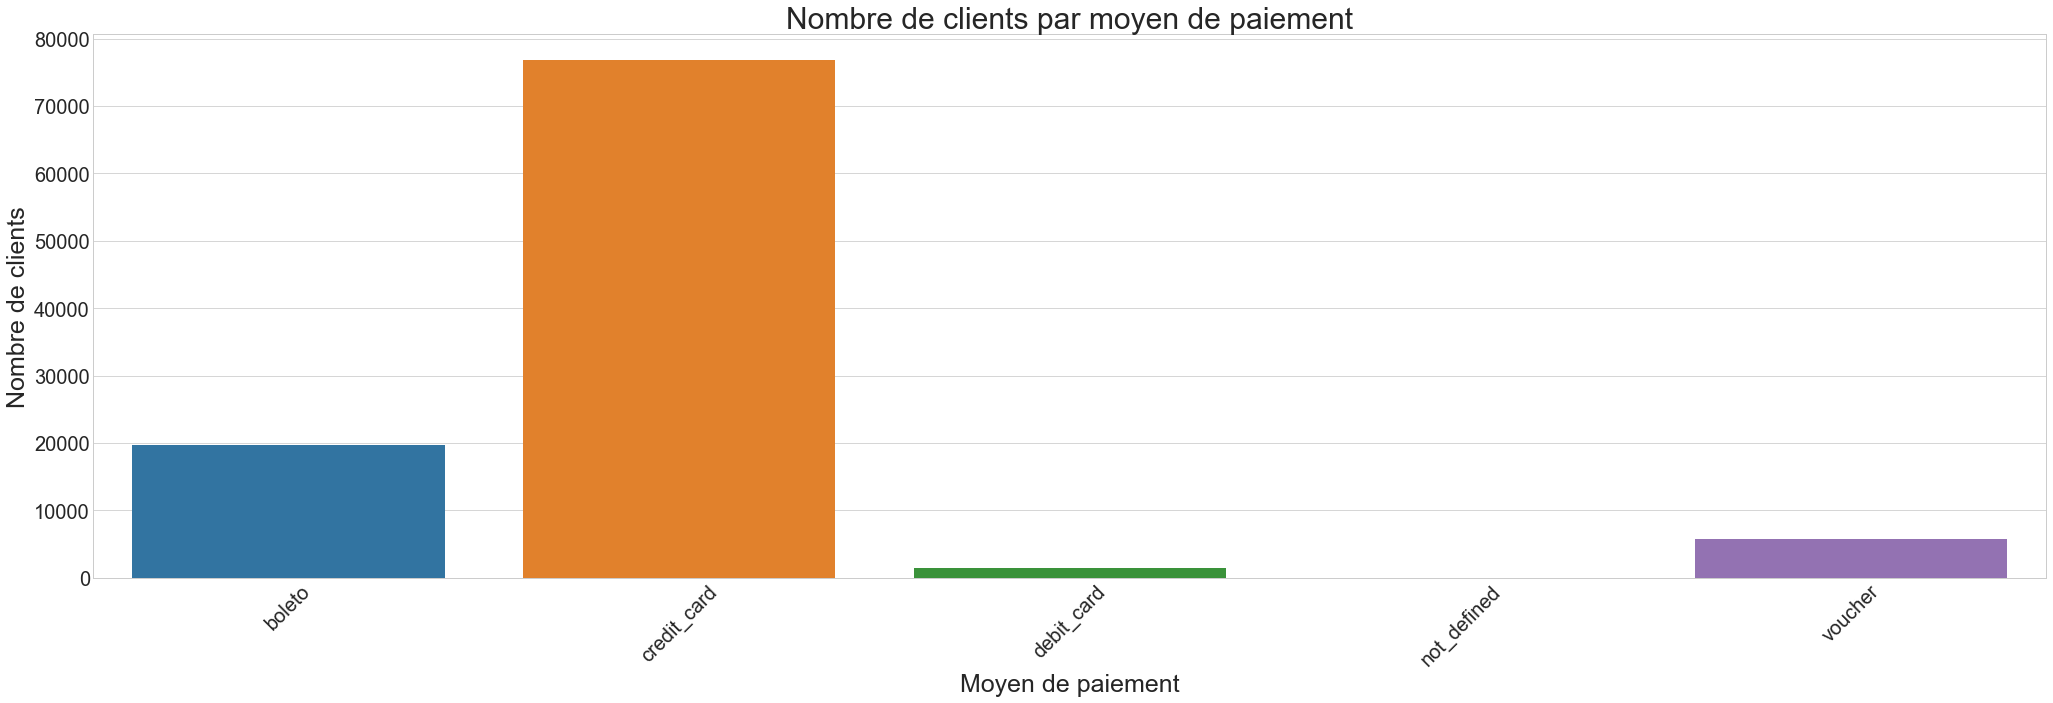

In [127]:
df = pd.DataFrame({'Moyen de paiement': Total.index.values,
                   'Nombres de clients': Total.iloc[:, 0].to_list()})

plt.figure(figsize=(35, 10))
plt.title('Nombre de clients par moyen de paiement', fontsize=30)
sns.barplot(x=df['Moyen de paiement'],
            y=df['Nombres de clients'])
plt.xlabel("Moyen de paiement", fontsize=25)
plt.ylabel("Nombre de clients", fontsize=25)
plt.tick_params(axis='both', labelsize=20)
plt.xticks(rotation=45)
plt.show()

[Retour au sommaire](#Sommaire)

## Standardisation des variables <a class="anchor" id="Partie4"></a>

In [128]:
df_Clients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101233 entries, 0 to 101232
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Date de la commande               101233 non-null  datetime64[ns]
 1   price                             101233 non-null  float64       
 2   payment_type                      101233 non-null  object        
 3   customer_unique_id                101233 non-null  object        
 4   Autres                            101233 non-null  int64         
 5   Beauté_Santé                      101233 non-null  int64         
 6   Loisirs                           101233 non-null  int64         
 7   Maison                            101233 non-null  int64         
 8   Mobilier                          101233 non-null  int64         
 9   Mode                              101233 non-null  int64         
 10  Nourriture_Boissons             

In [129]:
df_Clients.head()

Date de la commande  price payment_type                customer_unique_id  \
0 2017-10-02 10:56:33  29.99  credit_card  7c396fd4830fd04220f754e42b4e5bff   
1 2017-10-02 10:56:33  29.99      voucher  7c396fd4830fd04220f754e42b4e5bff   
2 2017-09-04 11:26:38  35.39  credit_card  7c396fd4830fd04220f754e42b4e5bff   
3 2017-08-15 18:29:31  29.99  credit_card  3a51803cc0d012c3b5dc8b7528cb05f7   
4 2017-08-02 18:24:47  29.99  credit_card  ef0996a1a279c26e7ecbd737be23d235   

   Autres  Beauté_Santé  Loisirs  Maison  Mobilier  Mode  ...  Montant Min  \
0       0             1        0       1         0     0  ...        29.99   
1       0             1        0       1         0     0  ...        29.99   
2       0             1        0       1         0     0  ...        29.99   
3       0             0        0       1         0     0  ...        29.99   
4       0             0        0       1         0     0  ...        29.99   

   Montant Max  Nombre de commandes  Note Moyenne  Nombre d'objets Max  \
0        35.39                    2          4.25                    1   
1        35.39                    2          4.25                    1   
2        35.39                    2          4.25                    1   
3        29.99                    1          4.00                    1   
4        29.99                    1          5.00                    1   

   Nombre d'objets Total  Fréquence  Récence  Montant Moyen  Montant  
0                      2       13.0    335.0          31.79    95.37  
1                      2       13.0    335.0          31.79    95.37  
2                      2       13.0    335.0          31.79    95.37  
3                      1        0.0    383.0          29.99    29.99  
4                      1        0.0    396.0          29.99    29.99  

[5 rows x 28 columns]

In [130]:
df_Clients = df_Clients[['customer_unique_id', 'Montant', 'Montant Moyen',
                         'Montant Min', 'Montant Max', 'Date de la commande',
                         'Nombre de commandes', 'Note Moyenne',
                         'Nombre d\'objets Max', 'Nombre d\'objets Total',
                         'Fréquence', 'Récence', 'Autres', 'Beauté_Santé',
                         'Loisirs', 'Maison', 'Mobilier', 'Mode',
                         'Nourriture_Boissons', 'Technologies']]

In [131]:
df_Clients = df_Clients.drop_duplicates()

In [132]:
df_Clients.head()

customer_unique_id  Montant  Montant Moyen  Montant Min  \
0  7c396fd4830fd04220f754e42b4e5bff    95.37          31.79        29.99   
2  7c396fd4830fd04220f754e42b4e5bff    95.37          31.79        29.99   
3  3a51803cc0d012c3b5dc8b7528cb05f7    29.99          29.99        29.99   
4  ef0996a1a279c26e7ecbd737be23d235    29.99          29.99        29.99   
5  e781fdcc107d13d865fc7698711cc572    29.99          29.99        29.99   

   Montant Max Date de la commande  Nombre de commandes  Note Moyenne  \
0        35.39 2017-10-02 10:56:33                    2          4.25   
2        35.39 2017-09-04 11:26:38                    2          4.25   
3        29.99 2017-08-15 18:29:31                    1          4.00   
4        29.99 2017-08-02 18:24:47                    1          5.00   
5        29.99 2017-10-23 23:26:46                    1          3.00   

   Nombre d'objets Max  Nombre d'objets Total  Fréquence  Récence  Autres  \
0                    1                      2       13.0    335.0       0   
2                    1                      2       13.0    335.0       0   
3                    1                      1        0.0    383.0       0   
4                    1                      1        0.0    396.0       0   
5                    1                      1        0.0    314.0       0   

   Beauté_Santé  Loisirs  Maison  Mobilier  Mode  Nourriture_Boissons  \
0             1        0       1         0     0                    0   
2             1        0       1         0     0                    0   
3             0        0       1         0     0                    0   
4             0        0       1         0     0                    0   
5             0        0       1         0     0                    0   

   Technologies  
0             0  
2             0  
3             0  
4             0  
5             0

In [133]:
df_Clients = df_Clients[['Récence', 'Fréquence', 'Montant', 'Note Moyenne',
                         'Montant Moyen', 'Montant Min', 'Montant Max',
                         'Nombre de commandes', 'Nombre d\'objets Max',
                         'Nombre d\'objets Total', 'Autres', 'Beauté_Santé',
                         'Loisirs', 'Maison', 'Mobilier', 'Mode',
                         'Nourriture_Boissons', 'Technologies']]

In [134]:
df_Clients.describe()

Récence     Fréquence       Montant  Note Moyenne  Montant Moyen  \
count  96243.000000  96243.000000  96243.000000  96243.000000   96243.000000   
mean     240.993329      2.541910    139.195745      4.107064     125.909921   
std      152.971768     16.744509    208.321401      1.318027     188.540356   
min        0.000000      0.000000      0.850000      1.000000       0.850000   
25%      117.000000      0.000000     45.900000      4.000000      43.000000   
50%      221.000000      0.000000     86.250000      5.000000      79.200000   
75%      349.000000      0.000000    150.000000      5.000000     139.900000   
max      728.000000    304.000000   7388.000000      5.000000    6735.000000   

        Montant Min   Montant Max  Nombre de commandes  Nombre d'objets Max  \
count  96243.000000  96243.000000         96243.000000         96243.000000   
mean     123.058301    129.000570             1.069034             1.151325   
std      187.650848    192.057748             0.359052             0.556581   
min        0.850000      0.850000             1.000000             1.000000   
25%       39.900000     44.900000             1.000000             1.000000   
50%       75.000000     79.900000             1.000000             1.000000   
75%      137.000000    143.995000             1.000000             1.000000   
max     6735.000000   6735.000000            15.000000            21.000000   

       Nombre d'objets Total        Autres  Beauté_Santé       Loisirs  \
count           96243.000000  96243.000000  96243.000000  96243.000000   
mean                1.317675      0.146546      0.157383      0.142774   
std                 1.352754      0.353654      0.364163      0.349844   
min                 1.000000      0.000000      0.000000      0.000000   
25%                 1.000000      0.000000      0.000000      0.000000   
50%                 1.000000      0.000000      0.000000      0.000000   
75%                 1.000000      0.000000      0.000000      0.000000   
max                77.000000      1.000000      1.000000      1.000000   

             Maison      Mobilier          Mode  Nourriture_Boissons  \
count  96243.000000  96243.000000  96243.000000         96243.000000   
mean       0.227985      0.094251      0.096610             0.010671   
std        0.419535      0.292179      0.295427             0.102748   
min        0.000000      0.000000      0.000000             0.000000   
25%        0.000000      0.000000      0.000000             0.000000   
50%        0.000000      0.000000      0.000000             0.000000   
75%        0.000000      0.000000      0.000000             0.000000   
max        1.000000      1.000000      1.000000             1.000000   

       Technologies  
count  96243.000000  
mean       0.161394  
std        0.367895  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

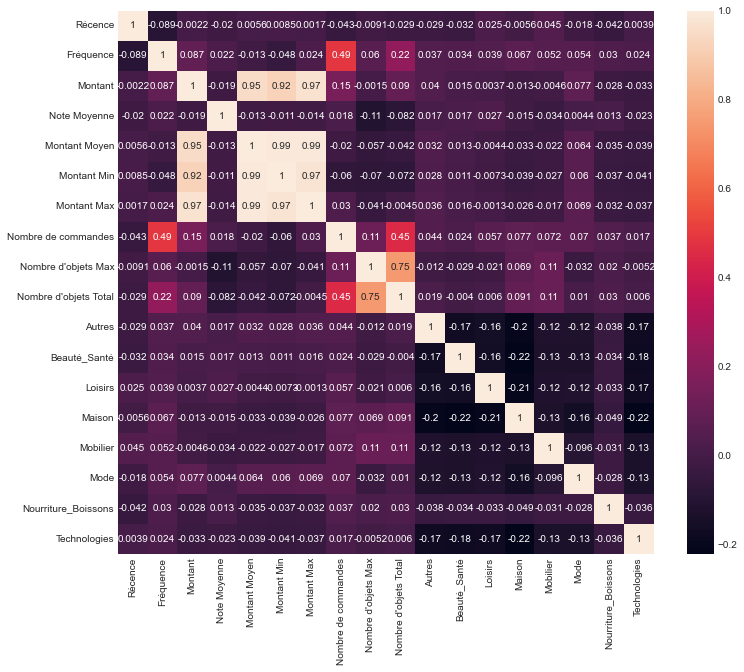

In [142]:
corr_df = df_Clients.corr(method='pearson')

plt.figure(figsize=(12, 10))
sns.heatmap(corr_df, annot=True)
plt.show()

In [136]:
std_scale = preprocessing.StandardScaler().fit(df_Clients.iloc[:, :-8])
df_Clients_std = pd.DataFrame(
    std_scale.transform(df_Clients.iloc[:, :-8])).join(
    df_Clients.iloc[:, -8:])
df_Clients_std.columns = df_Clients.columns

[Retour au sommaire](#Sommaire)

## Enregistrement des fichiers de données <a class="anchor" id="Partie5"></a>

In [137]:
df_Clients.to_csv('df_Clients.csv', index=False)
df_Clients_std.to_csv('df_Clients_std.csv', index=False)